# beijing

In [10]:
import requests
for i in range(11,31):
    for j in range(0,24):
        end   = '2018-04-'+str(i).zfill(2)+'-'+str(j)
        url = 'http://kdd.caiyunapp.com/competition/forecast/bj/'+end+'/2k0d1d8'
        respones= requests.get(url)
        with open ('/home/lifuzhen/KDD2018/Mini_train/bj_grid_meteorology_forecast_48_hours'+'_'+end+'.csv','w') as f:
            f.write(respones.text)

In [52]:
# end   = '2018-04-19-7'
# url = 'http://kdd.caiyunapp.com/competition/forecast/bj/'+end+'/2k0d1d8'
# respones= requests.get(url)
# with open ('/home/lifuzhen/KDD2018/Mini_train/bj_grid_meteorology_forecast_48_hours'+'_'+end+'.csv','w') as f:
#     f.write(respones.text)
df = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/bj_grid_meteorology_forecast_48_hours_2018-04-19-7.csv')
np.array(df)
if np.array(df).tolist() == []:
    print(1)

1


In [9]:
start = '2018-04-11-0'
end   = '2018-05-05-23'
url = 'https://biendata.com/competition/airquality/bj/'+start +'/'+end+'/2k0d1d8'
respones= requests.get(url)
with open ('/home/lifuzhen/KDD2018/Mini_train/bj_airquality_'+start +'_'+end+'.csv','w') as f:
    f.write(respones.text)
    
url = 'https://biendata.com/competition/meteorology/bj/'+start +'/'+end+'/2k0d1d8'
respones= requests.get(url)
with open ('/home/lifuzhen/KDD2018/Mini_train/bj_meteorology_'+start +'_'+end+'.csv','w') as f:
    f.write(respones.text)

url = 'https://biendata.com/competition/meteorology/bj_grid/'+start +'/'+end+'/2k0d1d8'
respones= requests.get(url)
with open ('/home/lifuzhen/KDD2018/Mini_train/bj_grid_meteorology_'+start +'_'+end+'.csv','w') as f:
    f.write(respones.text)

In [92]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from datetime import timedelta
from datetime import datetime
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy

def gen_dates(b_date, count):
    hour = timedelta(hours=1)
    for i in range(count+1):
        yield b_date + hour*i


def get_date_list(start=None, end=None):
    """
    获取日期列表
    :param start: 开始日期
    :param end: 结束日期
    :return:
    """
    if start is None:
        start = datetime.strptime("2000-01-01 00:00:00", "%Y-%m-%d %H:%M:%S")
    if end is None:
        end = datetime.now()
    data = []
    for d in gen_dates(start, int((end-start).total_seconds()/3600)):
        data.append(str(d))
    return data


Medium_PM10 = 88
Medium_PM25 = 59
Medium_O3   = 56
Medium_NO2  = 46
Medium_CO   = 1
Medium_SO2  = 9
def to_timedict_bj(start, end):
    "输入时间和表格，返回字典"
    aq = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/bj_airquality_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/bj_meteorology_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo_grid = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/bj_grid_meteorology_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    
    alt_list = get_date_list(Start , End)
    alt_dict = {}
    recons = pd.DataFrame(columns=('stationId','utc_time','PM2.5','PM10','NO2','CO','O3','SO2'))
    
    for i in alt_list:
        alt_dict[i] = []
    alt = np.array(aq[['station_id','time','PM25_Concentration','PM10_Concentration','NO2_Concentration','CO_Concentration','O3_Concentration','SO2_Concentration']]).tolist()
    for i in tqdm(['aotizhongxin', 'badaling', 'beibuxinqu', 'daxing', 'dingling', 'donggaocun', 'dongsi','dongsihuan','fangshan', 'fengtaihuayuan', 'guanyuan', 'gucheng','huairou', 'liulihe', 'mentougou', 'miyun', 'miyunshuiku', 'nansanhuan', 'nongzhanguan', 'pingchang', 'pinggu','qianmen','shunyi','tiantan','tongzhou','wanliu','wanshouxigong','xizhimenbei','yanqin','yizhuang','yongdingmennei','yongledian','yufa','yungang']):
        count = 0
        for j in aq['station_id']:
            if j.split('_')[0] == i:
                recons.loc[count] = alt[count]
            count += 1 
#     print(recons)
    recons.reset_index(drop=True,inplace=True)
#     recons.loc[recons['stationId'] == 'zhiwuyuan_aq',['PM2.5','PM10','NO2','CO','O3','SO2']] = [Medium_PM25,Medium_PM10,Medium_NO2,Medium_CO,Medium_O3,Medium_SO2]

#     print(recons.loc[recons['stationId'] == 'zhiwuyuan_aq'])
    recons.interpolate(inplace = True)
#     print(recons.loc[recons['stationId'] == 'zhiwuyuan_aq'])
    recons['PM2.5'].fillna(Medium_PM25, inplace = True)
    recons['PM10'].fillna(Medium_PM10, inplace = True)
    recons['NO2'].fillna(Medium_NO2, inplace = True)
    recons['CO'].fillna(Medium_CO, inplace = True)
    recons['O3'].fillna(Medium_O3, inplace = True)
    recons['SO2'].fillna(Medium_SO2, inplace = True)
    
    recons['lon'] = 0 ##经度
    recons['lat'] = 0  ##纬度
    recons.loc[recons['stationId']=='dongsi_aq',['lon','lat']] = [116.417,39.929]
    recons.loc[recons['stationId']=='tiantan_aq',['lon','lat']] = [116.407,39.886]
    recons.loc[recons['stationId']=='guanyuan_aq',['lon','lat']] = [116.339,39.929]
    recons.loc[recons['stationId']=='wanshouxigong_aq',['lon','lat']] = [116.352,39.878]
    recons.loc[recons['stationId']=='aotizhongxin_aq',['lon','lat']] = [116.397,39.982]
    recons.loc[recons['stationId']=='nongzhanguan_aq',['lon','lat']] = [116.461,39.937]
    recons.loc[recons['stationId']=='wanliu_aq',['lon','lat']] = [116.287,39.987]
    recons.loc[recons['stationId']=='beibuxinqu_aq',['lon','lat']] = [116.174,40.09]
    recons.loc[recons['stationId']=='zhiwuyuan_aq',['lon','lat']] = [116.207,40.002]
    recons.loc[recons['stationId']=='fengtaihuayuan_aq',['lon','lat']] = [116.279,39.863]
    recons.loc[recons['stationId']=='yungang_aq',['lon','lat']] = [116.146,39.824]
    recons.loc[recons['stationId']=='gucheng_aq',['lon','lat']] = [116.184,39.914]
    recons.loc[recons['stationId']=='fangshan_aq',['lon','lat']] = [116.136,39.742]
    recons.loc[recons['stationId']=='daxing_aq',['lon','lat']] = [116.404,39.718]
    recons.loc[recons['stationId']=='yizhuang_aq',['lon','lat']] = [116.506,39.795]
    recons.loc[recons['stationId']=='tongzhou_aq',['lon','lat']] = [116.663,39.886]
    recons.loc[recons['stationId']=='shunyi_aq',['lon','lat']] = [116.655,40.127]
    recons.loc[recons['stationId']=='pingchang_aq',['lon','lat']] = [116.23,40.217]
    recons.loc[recons['stationId']=='mentougou_aq',['lon','lat']] = [116.106,39.937]
    recons.loc[recons['stationId']=='pinggu_aq',['lon','lat']] = [117.1,40.143]
    recons.loc[recons['stationId']=='hureconsou_aq',['lon','lat']] = [116.628,40.328]
    recons.loc[recons['stationId']=='miyun_aq',['lon','lat']] = [116.832,40.37]
    recons.loc[recons['stationId']=='yanqin_aq',['lon','lat']] = [115.972,40.453]
    recons.loc[recons['stationId']=='dingling_aq',['lon','lat']] = [116.22,40.292]
    recons.loc[recons['stationId']=='badaling_aq',['lon','lat']] = [115.988,40.365]
    recons.loc[recons['stationId']=='miyunshuiku_aq',['lon','lat']] = [116.911,40.499]
    recons.loc[recons['stationId']=='donggaocun_aq',['lon','lat']] = [117.12,40.1]
    recons.loc[recons['stationId']=='yongledian_aq',['lon','lat']] = [116.783,39.712]
    recons.loc[recons['stationId']=='yufa_aq',['lon','lat']] = [116.3,39.52]
    recons.loc[recons['stationId']=='liulihe_aq',['lon','lat']] = [116,39.58]
    recons.loc[recons['stationId']=='qianmen_aq',['lon','lat']] = [116.395,39.899]
    recons.loc[recons['stationId']=='yongdingmennei_aq',['lon','lat']] = [116.394,39.876]
    recons.loc[recons['stationId']=='xizhimenbei_aq',['lon','lat']] = [116.349,39.954]
    recons.loc[recons['stationId']=='nansanhuan_aq',['lon','lat']] = [116.368,39.856]
    recons.loc[recons['stationId']=='dongsihuan_aq',['lon','lat']] = [116.483,39.939]
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['lon','lat']]).tolist()
    for i in tqdm(np.array(recons['utc_time']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
    
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['PM2.5','PM10','NO2','CO','O3','SO2']]).tolist()
    for i in tqdm(np.array(recons['utc_time']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
        
    for k,v in alt_dict.items():
        if len(v) == 0:
            if int(k.split(' ')[1].split(':')[0]) != 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
            else:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    for k,v in alt_dict.items():
        if len(v) == 0:
            if int(k.split(' ')[1].split(':')[0]) != 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
            else:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
        if len(v) == 272:
            print(k)
            print(len(v))
    print(max(length))
    print(min(length))
#     print(recons)
    ######################处理缺失时间点完毕#####################shunyi_meo


#     recons_meo = pd.DataFrame(columns=('station_id','time','temperature','pressure','humidity','wind_direction','wind_speed','weather'))

#     alt = np.array(meo[['station_id','time','temperature','pressure','humidity','wind_direction','wind_speed','weather']]).tolist()
#     for i in tqdm(['shunyi_meo','hadian_meo','yanqing_meo','miyun_meo','huairou_meo','shangdianzi_meo','pinggu_meo','tongzhou_meo','chaoyang_meo','pingchang_meo','zhaitang_meo','mentougou_meo','beijing_meo','shijingshan_meo','fengtai_meo','daxing_meo','fangshan_meo','xiayunling_meo']):
#         count = 0
#         for j in meo['station_id']:
#             if j == i:
#                 recons_meo.loc[count] = alt[count]
#             count += 1 
    
#     for i in range(len(recons_meo['wind_speed'])):
#         if recons_meo['wind_speed'][i] == 999017:
#             recons_meo.loc[i,'wind_speed'] = recons_meo.loc[i-1,'wind_speed']
#     recons_meo['longitude'] = 0 ##经度
#     recons_meo['latitude'] = 0  ##纬度
#     recons_meo.loc[recons_meo['station_id']=='shunyi_meo',['longitude','latitude']] = [116.6153,40.12667]
#     recons_meo.loc[recons_meo['station_id']=='haidian_meo',['longitude','latitude']] = [116.2906,39.98694]
#     recons_meo.loc[recons_meo['station_id']=='yanqing_meo',['longitude','latitude']] = [115.9689,40.44944]
#     recons_meo.loc[recons_meo['station_id']=='miyun_meo',['longitude','latitude']] = [116.8642,40.3775]
#     recons_meo.loc[recons_meo['station_id']=='huairou_meo',['longitude','latitude']] = [116.6269,40.35778]
#     recons_meo.loc[recons_meo['station_id']=='shangdianzi_meo',['longitude','latitude']] = [117.1117,40.65889]
#     recons_meo.loc[recons_meo['station_id']=='pinggu_meo',['longitude','latitude']] = [117.1178,40.16944]
#     recons_meo.loc[recons_meo['station_id']=='tongzhou_meo',['longitude','latitude']] = [116.7567,39.8475]
#     recons_meo.loc[recons_meo['station_id']=='chaoyang_meo',['longitude','latitude']] = [116.5008,39.9525]
#     recons_meo.loc[recons_meo['station_id']=='pingchang_meo',['longitude','latitude']] = [116.2117,40.22333]
#     recons_meo.loc[recons_meo['station_id']=='zhaitang_meo',['longitude','latitude']] = [115.6922,39.97389]
#     recons_meo.loc[recons_meo['station_id']=='mentougou_meo',['longitude','latitude']] = [116.1564,39.88778]
#     recons_meo.loc[recons_meo['station_id']=='beijing_meo',['longitude','latitude']] = [116.4694,39.80611]
#     recons_meo.loc[recons_meo['station_id']=='shijingshan_meo',['longitude','latitude']] = [116.2053,39.9425]
#     recons_meo.loc[recons_meo['station_id']=='fengtai_meo',['longitude','latitude']] = [116.2453,39.87028]
#     recons_meo.loc[recons_meo['station_id']=='daxing_meo',['longitude','latitude']] = [116.3544,39.71861]
#     recons_meo.loc[recons_meo['station_id']=='fangshan_meo',['longitude','latitude']] = [116.1942,39.77306]
#     recons_meo.loc[recons_meo['station_id']=='xiayunling_meo',['longitude','latitude']] = [115.7406,39.72861]

#     recons_meo.loc[meo['weather'] == 'Sunny/clear' , 'weather'] = 0
#     recons_meo.loc[meo['weather'] == 'Snow' , 'weather'] = 1
#     recons_meo.loc[meo['weather'] == 'Sleet' , 'weather'] = 2
#     recons_meo.loc[meo['weather'] == 'Sand' , 'weather'] = 3
#     recons_meo.loc[meo['weather'] == 'Rain/Snow with Hail' , 'weather'] = 4
#     recons_meo.loc[meo['weather'] == 'Rain with Hail' , 'weather'] = 5
#     recons_meo.loc[meo['weather'] == 'Rain' , 'weather'] = 6
#     recons_meo.loc[meo['weather'] == 'Haze' , 'weather'] = 7
#     recons_meo.loc[meo['weather'] == 'Fog' , 'weather'] = 8
#     recons_meo.loc[meo['weather'] == 'Dust' , 'weather'] = 9
#     recons_meo.loc[meo['weather'] == 'Hail' , 'weather'] = 4
#     recons_meo.loc[meo['weather'] == 'Cloudy' , 'weather'] = 0
#     recons_meo.loc[meo['weather'] == 'Overcast' , 'weather'] = 0
#     recons_meo.loc[meo['weather'] == 'Thundershower' , 'weather'] = 6
#     def div5(x):
#         return int(x/5)
#     def div15(x):
#         return int(x/15)
#     def div05(x):
#         return int(x/0.5)
#     recons_meo['temperature'] = recons_meo['temperature'].apply(div5)
#     recons_meo['pressure'] = recons_meo['pressure'].apply(div5)
#     recons_meo['humidity'] = recons_meo['humidity'].apply(div5)
#     recons_meo['wind_direction'] = recons_meo['wind_direction'].apply(div15)
#     recons_meo['wind_speed/kph'] = recons_meo['wind_speed'].apply(div05)
#     #############wether量化###############

#     #############处理缺失时间点##########
#     count = 0
#     Idx = 0  ####索引记录####
#     meo_list = np.array(recons_meo[['temperature','pressure','humidity','wind_direction','wind_speed','weather']]).tolist()
    

#     for i in tqdm(np.array(recons_meo['time']).tolist()):
#         if i in alt_dict.keys():
#             alt_dict[i].extend(meo_list[Idx])

#         Idx += 1
        
#     length = []  
    
#     for k,v in alt_dict.items():
#         length.append(len(v))
# #         if len(v) != 416:
# #             print(k)
# #             print(len(v))
#     print(max(length))
#     print(min(length))  
    
#     for i in range(3):
#         for k,v in alt_dict.items():
#             if len(v) < max(length):
#                 if int(k.split(' ')[1].split(':')[0]) != 0:
#                     alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
#                 else:
#                     alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
                
#     length = []
#     for k,v in alt_dict.items():
#         length.append(len(v))
# #         if len(v) != 416:
# #             print(k)
# #             print(len(v))
#     print(max(length))
#     print(min(length))  
#     ######################处理缺失时间点完毕#####################
#     meo_grid['longitude'] = 0 ##经度
#     meo_grid['latitude'] = 0  ##纬度
#     count = 0
#     for i in range(1150,1181,1):
#         for j in range(390,411,1):
#             if (i >= 1156 and i <= 1172) and (j >= 395 and j <= 407):
#                 meo_grid.loc[meo_grid['station_id']=='beijing_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
# #                 print([i,j])
#             count += 1
    
#     meo_grid.drop(meo_grid[meo_grid['longitude'] < 115.6].index.tolist(),inplace= True)
#     meo_grid.drop(meo_grid[meo_grid['longitude'] > 117.2].index.tolist(),inplace= True)
#     meo_grid.drop(meo_grid[meo_grid['latitude']  < 39.5].index.tolist(),inplace= True)
#     meo_grid.drop(meo_grid[meo_grid['latitude']  > 40.7].index.tolist(),inplace= True)
#     meo_grid.drop('id',axis = 1)
#     meo_grid.drop_duplicates(inplace=True)
#     meo_grid.reset_index(drop=True,inplace=True)
# #     print(meo_grid.head(100))
#     def div5(x):
#         return int(x/5)
#     def div15(x):
#         return int(x/15)
#     def div05(x):
#         return int(x/0.5)
#     meo_grid['temperature'] = meo_grid['temperature'].apply(div5)
#     meo_grid['pressure'] = meo_grid['pressure'].apply(div5)
#     meo_grid['humidity'] = meo_grid['humidity'].apply(div5)
#     meo_grid['wind_direction'] = meo_grid['wind_direction'].apply(div15)
#     meo_grid['wind_speed/kph'] = meo_grid['wind_speed'].apply(div05)
    
    
    
    
#     count = 1
#     Idx = 0  ####索引记录####

#     meo_grid_list = np.array(meo_grid[['temperature','pressure','humidity','wind_direction','wind_speed']]).tolist()
#     for i in tqdm(meo_grid['time']):
#         if i in alt_dict.keys():
#             if Idx > 0:
#                 count = int(meo_grid['station_id'][Idx].split('_')[2]) - int(meo_grid['station_id'][Idx-1].split('_')[2])
                
#             if count > 1 and count < 9:
#                 for j in range(count-1):
#                     alt_dict[i].extend(meo_grid_list[Idx-1])
#             if count > 9:
#                 for j in range(count-9):
#                     alt_dict[i].extend(meo_grid_list[Idx+1])
#             alt_dict[i].extend(meo_grid_list[Idx])
#         Idx += 1
        
        
        
        
        
        
        
#     length = []
#     for k,v in alt_dict.items():
#         length.append(len(v))
# #         if len(v) != 1963:
# #             print(k)
# #             print(len(v))
#     print(max(length))
#     print(min(length))
#     for i in range(3):
#         for k,v in alt_dict.items():
#             if len(v) != 1485:
#                 if int(k.split(' ')[1].split(':')[0]) != 0:
#                     alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
#                 else:
#                     alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
                
            
            
        
        
#     length = []
#     for k,v in alt_dict.items():
#         length.append(len(v))
# #         if len(v) != 1963:
# #             print(k)
# #             print(len(v))
#     print(max(length))
#     print(min(length))
    pop_list = []
    for k in tqdm(alt_dict.keys()):
        weather_fore = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/bj_grid_meteorology_forecast_48_hours_'+k.split(' ')[0]+'-'+str(int(k.split(' ')[1].split(':')[0]))+'.csv')
        if np.array(weather_fore).tolist() == []:
            pop_list.append(k)
            continue
        weather_fore['weather'].replace(['CLEAR_DAY','CLEAR_NIGHT','CLOUDY','PARTLY_CLOUDY_DAY','PARTLY_CLOUDY_NIGHT','RAIN','SNOW','WIND','HAZE'],[0,1,2,3,4,5,6,7,8],inplace = True)
        weather_fore['longitude'] = 0 ##经度
        weather_fore['latitude'] = 0  ##纬度
        count = 0
#         print(k)
        for i in range(1150,1181,1):
            for j in range(390,411,1):
                if (i >= 1156 and i <= 1172) and (j >= 395 and j <= 407):
                    weather_fore.loc[weather_fore['station_id']=='beijing_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
#                     print([i,j])
                count += 1

        weather_fore.drop(weather_fore[weather_fore['longitude'] < 115.6].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['longitude'] > 117.2].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  < 39.5].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  > 40.7].index.tolist(),inplace= True)
        weather_fore.reset_index(drop=True,inplace=True)
        
        weather_fore_array = np.array(weather_fore['weather'])
        alt_dict[k].extend(weather_fore_array.tolist())
#         print(len(alt_dict[k]))
        if len(alt_dict[k]) != 10880:
            pop_list.append(k)
    print(pop_list)
    for i in pop_list:
        alt_dict[i].extend(np.zeros(10880-len(alt_dict[i])).tolist())
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1963:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    alt_frame = pd.DataFrame.from_dict(alt_dict).T
    count = 0
    for i in list(alt_frame.index):
        if i in pop_list:
            alt_frame.iloc[count,list(range(272,10880))] = copy.deepcopy(alt_frame.iloc[count-1,list(range(272,10880))])
            alt_dict[i][272:10880] = copy.deepcopy(alt_frame.iloc[count-1,list(range(272,10880))]).tolist()
        count += 1
    ##########提取aq 48小时滑窗##########
    win = 48
#     win = 72
#     win = 16
#     win = 168
    
    for i in tqdm(range(68,272)):  
        count = 0
        for j in alt_frame[i]:
            if count >= win:
                alt_dict[alt_frame.index[count]].extend(np.array(alt_frame[i][count-win:count]).tolist())
                if i == 271:
                    if date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 3 or date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 4: ###要预测的是周末
                        alt_dict[alt_frame.index[count]].extend([1])
                    else:
                        alt_dict[alt_frame.index[count]].extend([0])
                    if int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [0,1,2,10,11,12]: #####是否为早晚高峰时段（北京转utc时间）
                        alt_dict[alt_frame.index[count]].extend([2])
                    elif int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [16,17,18,19,20]:
                        alt_dict[alt_frame.index[count]].extend([1])
                    else:
                        alt_dict[alt_frame.index[count]].extend([0])
                    alt_dict[alt_frame.index[count]].append(int(alt_frame.index[count].split(' ')[1].split(':')[0]))
            count += 1
            
    hour_last = ''
    count = 0
    for k in tqdm(list(alt_frame.index)):
        for i in range(0,6):
            SUM = 0
            for j in range(0,34):
                SUM += alt_dict[k][68+j*6+i]
            alt_dict[k].append(SUM)

        if count == 0:
            alt_dict[k].extend([0,0,0,0,0,0])
        else:
            for m,n in zip(alt_dict[k][-6:] ,alt_dict[hour_last][-12:-6]):
                alt_dict[k].append(m-n)

        hour_last = k
        count += 1
    ##########标签值 PM10 PM2.5 O3##########
    step = 72  ####预测间隔
    for i in tqdm(range(68,272)):  ##训练数据
        count = 0
        for j in alt_frame[i]:
            if count+step < len(alt_frame[i]) and ((i-68)%6 == 0 or (i-68)%6 == 1 or (i-68)%6 == 4):
                alt_dict[alt_frame.index[count]].append(np.array(alt_frame[i][count+step]).tolist())
            count += 1
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) < 4973:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    pop_list = []
    for i in alt_dict.keys():
        if len(alt_dict[i]) <  max(length):
            pop_list.append(i)
    for i in pop_list:
        alt_dict.pop(i)
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 4960:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    return alt_dict

In [93]:
Start = datetime.strptime("2018-04-11 00:00:00", "%Y-%m-%d %H:%M:%S")
End = datetime.strptime("2018-05-08 23:00:00", "%Y-%m-%d %H:%M:%S")

pre_dict_bj = to_timedict_bj(start = Start, end = End)
pre_frame_bj = pd.DataFrame.from_dict(pre_dict_bj).T
pre_list_bj = np.array(pre_frame_bj)


  0%|          | 0/34 [00:00<?, ?it/s]
Exception in thread Thread-104:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/lifuzhen/virtual_pytorch_py3.5/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/lifuzhen/virtual_pytorch_py3.5/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

  0%|          | 0/672 [00:00<?, ?it/s]

2018-05-01 05:00:00
272
2018-04-28 09:00:00
272
2018-04-22 18:00:00
272
2018-04-20 07:00:00
272
2018-04-12 15:00:00
272
2018-04-11 20:00:00
272
2018-04-30 01:00:00
272
2018-04-29 17:00:00
272
2018-04-13 00:00:00
272
2018-05-04 07:00:00
272
2018-04-23 15:00:00
272
2018-04-12 05:00:00
272
2018-05-03 11:00:00
272
2018-04-23 21:00:00
272
2018-04-29 00:00:00
272
2018-05-01 10:00:00
272
2018-04-24 04:00:00
272
2018-04-15 00:00:00
272
2018-04-16 11:00:00
272
2018-04-15 09:00:00
272
2018-04-11 14:00:00
272
2018-04-15 01:00:00
272
2018-05-04 06:00:00
272
2018-04-21 11:00:00
272
2018-04-20 15:00:00
272
2018-05-06 18:00:00
272
2018-05-08 19:00:00
272
2018-04-26 03:00:00
272
2018-04-18 18:00:00
272
2018-04-30 12:00:00
272
2018-04-19 13:00:00
272
2018-05-02 05:00:00
272
2018-04-28 17:00:00
272
2018-04-21 20:00:00
272
2018-05-05 07:00:00
272
2018-05-02 22:00:00
272
2018-04-12 12:00:00
272
2018-04-12 17:00:00
272
2018-05-03 23:00:00
272
2018-04-27 08:00:00
272
2018-04-16 08:00:00
272
2018-04-23 19:00

2018-05-01 05:00:00


  0%|          | 1/672 [00:01<15:41,  1.40s/it]

2018-04-28 09:00:00


  0%|          | 2/672 [00:02<13:39,  1.22s/it]

2018-04-22 18:00:00


  0%|          | 3/672 [00:03<12:57,  1.16s/it]

2018-04-20 07:00:00


  1%|          | 4/672 [00:04<13:18,  1.20s/it]

2018-04-12 15:00:00


  1%|          | 5/672 [00:05<12:56,  1.16s/it]

2018-04-11 20:00:00


  1%|          | 6/672 [00:06<12:43,  1.15s/it]

2018-04-30 01:00:00


  1%|          | 7/672 [00:07<12:33,  1.13s/it]

2018-04-29 17:00:00


  1%|          | 8/672 [00:09<12:45,  1.15s/it]

2018-04-13 00:00:00


  1%|▏         | 9/672 [00:10<12:36,  1.14s/it]

2018-05-04 07:00:00


  1%|▏         | 10/672 [00:11<12:29,  1.13s/it]

2018-04-23 15:00:00


  2%|▏         | 11/672 [00:12<12:23,  1.12s/it]

2018-04-12 05:00:00


  2%|▏         | 12/672 [00:12<11:54,  1.08s/it]

2018-05-03 11:00:00


  2%|▏         | 13/672 [00:14<12:04,  1.10s/it]

2018-04-23 21:00:00


  2%|▏         | 14/672 [00:15<12:05,  1.10s/it]

2018-04-29 00:00:00


  2%|▏         | 15/672 [00:16<12:07,  1.11s/it]

2018-05-01 10:00:00


  2%|▏         | 16/672 [00:17<12:07,  1.11s/it]

2018-04-24 04:00:00


  3%|▎         | 17/672 [00:19<12:13,  1.12s/it]

2018-04-15 00:00:00


  3%|▎         | 18/672 [00:20<12:09,  1.12s/it]

2018-04-16 11:00:00


  3%|▎         | 19/672 [00:21<12:06,  1.11s/it]

2018-04-15 09:00:00


  3%|▎         | 20/672 [00:22<12:02,  1.11s/it]

2018-04-11 14:00:00


  3%|▎         | 21/672 [00:23<12:07,  1.12s/it]

2018-04-15 01:00:00


  3%|▎         | 22/672 [00:24<12:04,  1.11s/it]

2018-05-04 06:00:00


  3%|▎         | 23/672 [00:25<12:01,  1.11s/it]

2018-04-21 11:00:00


  4%|▎         | 24/672 [00:26<11:58,  1.11s/it]

2018-04-20 15:00:00


  4%|▎         | 25/672 [00:27<12:02,  1.12s/it]

2018-05-06 18:00:00


  4%|▍         | 26/672 [00:28<11:59,  1.11s/it]

2018-05-08 19:00:00


  4%|▍         | 27/672 [00:30<11:56,  1.11s/it]

2018-04-26 03:00:00


  4%|▍         | 28/672 [00:31<11:54,  1.11s/it]

2018-04-18 18:00:00


  4%|▍         | 29/672 [00:32<11:51,  1.11s/it]

2018-04-30 12:00:00


  4%|▍         | 30/672 [00:33<11:54,  1.11s/it]

2018-04-19 13:00:00


  5%|▍         | 31/672 [00:34<11:51,  1.11s/it]

2018-05-02 05:00:00


  5%|▍         | 32/672 [00:35<11:49,  1.11s/it]

2018-04-28 17:00:00


  5%|▍         | 33/672 [00:36<11:52,  1.11s/it]

2018-04-21 20:00:00


  5%|▌         | 34/672 [00:37<11:50,  1.11s/it]

2018-05-05 07:00:00


  5%|▌         | 35/672 [00:39<11:51,  1.12s/it]

2018-05-02 22:00:00


  5%|▌         | 36/672 [00:40<11:49,  1.12s/it]

2018-04-12 12:00:00


  6%|▌         | 37/672 [00:41<11:51,  1.12s/it]

2018-04-12 17:00:00


  6%|▌         | 38/672 [00:42<11:49,  1.12s/it]

2018-05-03 23:00:00


  6%|▌         | 39/672 [00:43<11:48,  1.12s/it]

2018-04-27 08:00:00


  6%|▌         | 40/672 [00:45<11:52,  1.13s/it]

2018-04-16 08:00:00


  6%|▌         | 41/672 [00:46<11:50,  1.13s/it]

2018-04-23 19:00:00


  6%|▋         | 42/672 [00:47<11:47,  1.12s/it]

2018-04-11 11:00:00


  6%|▋         | 43/672 [00:48<11:45,  1.12s/it]

2018-04-13 21:00:00


  7%|▋         | 44/672 [00:49<11:47,  1.13s/it]

2018-04-25 20:00:00


  7%|▋         | 45/672 [00:50<11:44,  1.12s/it]

2018-04-28 12:00:00


  7%|▋         | 46/672 [00:51<11:42,  1.12s/it]

2018-04-18 15:00:00


  7%|▋         | 47/672 [00:52<11:40,  1.12s/it]

2018-04-28 13:00:00


  7%|▋         | 48/672 [00:54<11:42,  1.13s/it]

2018-04-22 06:00:00


  7%|▋         | 49/672 [00:55<11:40,  1.12s/it]

2018-05-03 22:00:00


  7%|▋         | 50/672 [00:56<11:37,  1.12s/it]

2018-04-25 00:00:00


  8%|▊         | 51/672 [00:57<11:35,  1.12s/it]

2018-05-06 05:00:00


  8%|▊         | 52/672 [00:58<11:33,  1.12s/it]

2018-04-23 11:00:00


  8%|▊         | 53/672 [00:59<11:34,  1.12s/it]

2018-04-18 16:00:00


  8%|▊         | 54/672 [01:00<11:32,  1.12s/it]

2018-04-14 12:00:00


  8%|▊         | 55/672 [01:01<11:31,  1.12s/it]

2018-04-13 02:00:00


  8%|▊         | 56/672 [01:02<11:29,  1.12s/it]

2018-04-16 19:00:00


  8%|▊         | 57/672 [01:03<11:29,  1.12s/it]

2018-05-07 02:00:00


  9%|▊         | 58/672 [01:04<11:27,  1.12s/it]

2018-05-03 10:00:00


  9%|▉         | 59/672 [01:06<11:26,  1.12s/it]

2018-04-12 08:00:00


  9%|▉         | 60/672 [01:07<11:24,  1.12s/it]

2018-04-18 21:00:00


  9%|▉         | 61/672 [01:08<11:25,  1.12s/it]

2018-04-14 20:00:00


  9%|▉         | 62/672 [01:09<11:23,  1.12s/it]

2018-04-29 10:00:00


  9%|▉         | 63/672 [01:10<11:22,  1.12s/it]

2018-04-12 19:00:00


 10%|▉         | 64/672 [01:11<11:22,  1.12s/it]

2018-04-21 09:00:00


 10%|▉         | 65/672 [01:12<11:21,  1.12s/it]

2018-05-06 02:00:00


 10%|▉         | 66/672 [01:14<11:19,  1.12s/it]

2018-04-30 11:00:00


 10%|▉         | 67/672 [01:15<11:17,  1.12s/it]

2018-05-06 07:00:00


 10%|█         | 68/672 [01:16<11:18,  1.12s/it]

2018-04-25 17:00:00


 10%|█         | 70/672 [01:17<11:05,  1.11s/it]

2018-04-28 23:00:00


 11%|█         | 71/672 [01:18<11:04,  1.10s/it]

2018-04-25 14:00:00


 11%|█         | 72/672 [01:19<11:03,  1.11s/it]

2018-04-27 11:00:00


 11%|█         | 73/672 [01:20<11:04,  1.11s/it]

2018-05-01 17:00:00


 11%|█         | 74/672 [01:22<11:03,  1.11s/it]

2018-04-13 03:00:00


 11%|█         | 75/672 [01:23<11:01,  1.11s/it]

2018-04-26 05:00:00


 11%|█▏        | 76/672 [01:24<11:00,  1.11s/it]

2018-05-05 03:00:00


 11%|█▏        | 77/672 [01:25<11:01,  1.11s/it]

2018-04-23 14:00:00


 12%|█▏        | 79/672 [01:26<10:50,  1.10s/it]

2018-05-02 07:00:00


 12%|█▏        | 80/672 [01:27<10:49,  1.10s/it]

2018-05-04 14:00:00


 12%|█▏        | 81/672 [01:28<10:48,  1.10s/it]

2018-04-19 19:00:00


 12%|█▏        | 82/672 [01:29<10:47,  1.10s/it]

2018-04-17 10:00:00


 12%|█▏        | 83/672 [01:31<10:47,  1.10s/it]

2018-05-07 17:00:00


 12%|█▎        | 84/672 [01:32<10:46,  1.10s/it]

2018-04-24 14:00:00


 13%|█▎        | 85/672 [01:33<10:44,  1.10s/it]

2018-04-15 11:00:00


 13%|█▎        | 86/672 [01:34<10:43,  1.10s/it]

2018-05-06 01:00:00


 13%|█▎        | 87/672 [01:35<10:43,  1.10s/it]

2018-04-29 06:00:00


 13%|█▎        | 88/672 [01:36<10:42,  1.10s/it]

2018-04-21 05:00:00


 13%|█▎        | 89/672 [01:37<10:40,  1.10s/it]

2018-04-13 13:00:00


 13%|█▎        | 90/672 [01:39<10:41,  1.10s/it]

2018-04-12 06:00:00


 14%|█▎        | 91/672 [01:40<10:39,  1.10s/it]

2018-05-06 19:00:00


 14%|█▎        | 92/672 [01:41<10:38,  1.10s/it]

2018-04-19 23:00:00


 14%|█▍        | 93/672 [01:42<10:37,  1.10s/it]

2018-04-26 12:00:00


 14%|█▍        | 94/672 [01:43<10:37,  1.10s/it]

2018-05-03 02:00:00


 14%|█▍        | 95/672 [01:44<10:36,  1.10s/it]

2018-04-11 07:00:00


 14%|█▍        | 96/672 [01:45<10:34,  1.10s/it]

2018-04-20 21:00:00


 14%|█▍        | 97/672 [01:46<10:33,  1.10s/it]

2018-04-22 12:00:00


 15%|█▍        | 98/672 [01:48<10:33,  1.10s/it]

2018-04-24 11:00:00


 15%|█▍        | 99/672 [01:49<10:32,  1.10s/it]

2018-04-20 09:00:00


 15%|█▍        | 100/672 [01:50<10:31,  1.10s/it]

2018-04-18 03:00:00


 15%|█▌        | 101/672 [01:51<10:29,  1.10s/it]

2018-04-17 20:00:00


 15%|█▌        | 102/672 [01:52<10:30,  1.11s/it]

2018-04-17 07:00:00


 15%|█▌        | 103/672 [01:53<10:29,  1.11s/it]

2018-05-04 19:00:00


 15%|█▌        | 104/672 [01:54<10:27,  1.11s/it]

2018-05-08 23:00:00


 16%|█▌        | 105/672 [01:56<10:27,  1.11s/it]

2018-05-08 18:00:00


 16%|█▌        | 106/672 [01:57<10:25,  1.11s/it]

2018-04-12 11:00:00


 16%|█▌        | 107/672 [01:58<10:25,  1.11s/it]

2018-04-19 20:00:00


 16%|█▌        | 108/672 [01:59<10:24,  1.11s/it]

2018-04-20 19:00:00


 16%|█▌        | 109/672 [02:00<10:23,  1.11s/it]

2018-04-29 07:00:00


 16%|█▋        | 110/672 [02:01<10:21,  1.11s/it]

2018-05-03 17:00:00


 17%|█▋        | 111/672 [02:03<10:22,  1.11s/it]

2018-05-01 09:00:00


 17%|█▋        | 112/672 [02:04<10:21,  1.11s/it]

2018-04-26 17:00:00


 17%|█▋        | 113/672 [02:05<10:20,  1.11s/it]

2018-05-01 08:00:00


 17%|█▋        | 114/672 [02:06<10:19,  1.11s/it]

2018-04-11 05:00:00


 17%|█▋        | 115/672 [02:07<10:18,  1.11s/it]

2018-05-06 10:00:00


 17%|█▋        | 116/672 [02:08<10:16,  1.11s/it]

2018-04-24 16:00:00


 17%|█▋        | 117/672 [02:09<10:15,  1.11s/it]

2018-05-01 01:00:00


 18%|█▊        | 118/672 [02:11<10:15,  1.11s/it]

2018-04-15 16:00:00


 18%|█▊        | 119/672 [02:12<10:13,  1.11s/it]

2018-04-22 00:00:00


 18%|█▊        | 120/672 [02:13<10:12,  1.11s/it]

2018-04-26 02:00:00


 18%|█▊        | 121/672 [02:14<10:11,  1.11s/it]

2018-04-27 15:00:00


 18%|█▊        | 122/672 [02:15<10:10,  1.11s/it]

2018-04-16 21:00:00


 18%|█▊        | 123/672 [02:16<10:09,  1.11s/it]

2018-04-21 16:00:00


 18%|█▊        | 124/672 [02:17<10:08,  1.11s/it]

2018-04-27 18:00:00


 19%|█▊        | 125/672 [02:18<10:06,  1.11s/it]

2018-04-18 08:00:00


 19%|█▉        | 126/672 [02:19<10:06,  1.11s/it]

2018-04-26 09:00:00


 19%|█▉        | 127/672 [02:20<10:04,  1.11s/it]

2018-04-29 14:00:00


 19%|█▉        | 128/672 [02:22<10:03,  1.11s/it]

2018-04-16 14:00:00


 19%|█▉        | 129/672 [02:23<10:02,  1.11s/it]

2018-04-19 12:00:00


 19%|█▉        | 130/672 [02:24<10:00,  1.11s/it]

2018-04-20 00:00:00


 20%|█▉        | 132/672 [02:25<09:54,  1.10s/it]

2018-04-30 13:00:00


 20%|█▉        | 133/672 [02:26<09:53,  1.10s/it]

2018-05-07 01:00:00


 20%|█▉        | 134/672 [02:27<09:52,  1.10s/it]

2018-04-17 02:00:00


 20%|██        | 135/672 [02:28<09:50,  1.10s/it]

2018-05-06 08:00:00


 20%|██        | 136/672 [02:29<09:50,  1.10s/it]

2018-05-06 06:00:00


 20%|██        | 137/672 [02:30<09:49,  1.10s/it]

2018-04-19 00:00:00


 21%|██        | 138/672 [02:31<09:47,  1.10s/it]

2018-04-23 09:00:00


 21%|██        | 139/672 [02:33<09:47,  1.10s/it]

2018-04-12 03:00:00


 21%|██        | 140/672 [02:34<09:45,  1.10s/it]

2018-04-27 09:00:00


 21%|██        | 141/672 [02:35<09:44,  1.10s/it]

2018-04-13 20:00:00


 21%|██        | 142/672 [02:36<09:43,  1.10s/it]

2018-04-24 19:00:00


 21%|██▏       | 143/672 [02:37<09:43,  1.10s/it]

2018-04-16 17:00:00


 21%|██▏       | 144/672 [02:38<09:42,  1.10s/it]

2018-04-20 04:00:00


 22%|██▏       | 145/672 [02:40<09:42,  1.11s/it]

2018-04-29 03:00:00


 22%|██▏       | 146/672 [02:41<09:41,  1.11s/it]

2018-04-14 10:00:00


 22%|██▏       | 147/672 [02:42<09:40,  1.10s/it]

2018-04-26 23:00:00


 22%|██▏       | 148/672 [02:43<09:39,  1.11s/it]

2018-04-13 11:00:00


 22%|██▏       | 149/672 [02:44<09:38,  1.11s/it]

2018-04-16 10:00:00


 22%|██▏       | 150/672 [02:45<09:36,  1.11s/it]

2018-04-29 15:00:00


 22%|██▏       | 151/672 [02:46<09:35,  1.10s/it]

2018-04-12 01:00:00


 23%|██▎       | 152/672 [02:48<09:35,  1.11s/it]

2018-05-05 04:00:00


 23%|██▎       | 153/672 [02:49<09:34,  1.11s/it]

2018-05-02 10:00:00


 23%|██▎       | 154/672 [02:50<09:32,  1.11s/it]

2018-04-30 08:00:00


 23%|██▎       | 155/672 [02:51<09:31,  1.11s/it]

2018-05-02 12:00:00


 23%|██▎       | 156/672 [02:52<09:31,  1.11s/it]

2018-04-16 00:00:00


 23%|██▎       | 157/672 [02:53<09:30,  1.11s/it]

2018-04-12 21:00:00


 24%|██▎       | 158/672 [02:54<09:28,  1.11s/it]

2018-04-13 07:00:00


 24%|██▎       | 159/672 [02:56<09:28,  1.11s/it]

2018-05-08 12:00:00


 24%|██▍       | 160/672 [02:57<09:26,  1.11s/it]

2018-04-20 01:00:00


 24%|██▍       | 161/672 [02:58<09:25,  1.11s/it]

2018-04-15 08:00:00


 24%|██▍       | 162/672 [02:59<09:24,  1.11s/it]

2018-04-22 04:00:00


 24%|██▍       | 163/672 [03:00<09:23,  1.11s/it]

2018-04-21 08:00:00


 24%|██▍       | 164/672 [03:01<09:22,  1.11s/it]

2018-05-04 13:00:00


 25%|██▍       | 165/672 [03:02<09:21,  1.11s/it]

2018-05-03 04:00:00


 25%|██▍       | 166/672 [03:03<09:20,  1.11s/it]

2018-04-19 03:00:00


 25%|██▌       | 168/672 [03:05<09:15,  1.10s/it]

2018-05-02 02:00:00


 25%|██▌       | 169/672 [03:06<09:14,  1.10s/it]

2018-04-30 14:00:00


 25%|██▌       | 170/672 [03:07<09:13,  1.10s/it]

2018-04-15 22:00:00


 25%|██▌       | 171/672 [03:08<09:12,  1.10s/it]

2018-04-24 00:00:00


 26%|██▌       | 172/672 [03:09<09:11,  1.10s/it]

2018-04-19 18:00:00


 26%|██▌       | 173/672 [03:10<09:10,  1.10s/it]

2018-04-19 01:00:00


 26%|██▌       | 174/672 [03:12<09:09,  1.10s/it]

2018-05-02 21:00:00


 26%|██▌       | 175/672 [03:13<09:08,  1.10s/it]

2018-04-15 02:00:00


 26%|██▌       | 176/672 [03:14<09:07,  1.10s/it]

2018-04-15 12:00:00


 26%|██▋       | 177/672 [03:15<09:06,  1.10s/it]

2018-04-28 05:00:00


 26%|██▋       | 178/672 [03:16<09:05,  1.10s/it]

2018-04-14 11:00:00


 27%|██▋       | 179/672 [03:17<09:04,  1.10s/it]

2018-04-13 18:00:00


 27%|██▋       | 180/672 [03:18<09:03,  1.10s/it]

2018-05-07 22:00:00


 27%|██▋       | 181/672 [03:20<09:03,  1.11s/it]

2018-04-25 05:00:00


 27%|██▋       | 182/672 [03:21<09:01,  1.11s/it]

2018-05-03 14:00:00


 27%|██▋       | 183/672 [03:22<09:00,  1.11s/it]

2018-04-22 13:00:00


 27%|██▋       | 184/672 [03:23<08:59,  1.11s/it]

2018-04-25 10:00:00


 28%|██▊       | 185/672 [03:24<08:58,  1.11s/it]

2018-05-08 02:00:00


 28%|██▊       | 186/672 [03:25<08:57,  1.11s/it]

2018-04-21 17:00:00


 28%|██▊       | 187/672 [03:26<08:56,  1.11s/it]

2018-04-17 21:00:00


 28%|██▊       | 188/672 [03:28<08:55,  1.11s/it]

2018-04-18 09:00:00


 28%|██▊       | 189/672 [03:29<08:54,  1.11s/it]

2018-04-22 02:00:00


 28%|██▊       | 190/672 [03:30<08:53,  1.11s/it]

2018-05-07 08:00:00


 28%|██▊       | 191/672 [03:31<08:52,  1.11s/it]

2018-04-25 19:00:00


 29%|██▊       | 192/672 [03:32<08:51,  1.11s/it]

2018-04-16 23:00:00


 29%|██▊       | 193/672 [03:33<08:50,  1.11s/it]

2018-05-07 13:00:00


 29%|██▉       | 194/672 [03:34<08:49,  1.11s/it]

2018-05-06 17:00:00


 29%|██▉       | 195/672 [03:35<08:48,  1.11s/it]

2018-04-14 09:00:00


 29%|██▉       | 196/672 [03:37<08:47,  1.11s/it]

2018-04-24 23:00:00


 29%|██▉       | 197/672 [03:38<08:46,  1.11s/it]

2018-04-29 19:00:00


 29%|██▉       | 198/672 [03:39<08:45,  1.11s/it]

2018-05-08 01:00:00


 30%|██▉       | 199/672 [03:40<08:43,  1.11s/it]

2018-05-06 09:00:00


 30%|██▉       | 200/672 [03:41<08:42,  1.11s/it]

2018-04-28 15:00:00


 30%|██▉       | 201/672 [03:42<08:42,  1.11s/it]

2018-05-08 08:00:00


 30%|███       | 202/672 [03:43<08:41,  1.11s/it]

2018-04-26 07:00:00


 30%|███       | 203/672 [03:44<08:39,  1.11s/it]

2018-04-24 02:00:00


 30%|███       | 204/672 [03:46<08:38,  1.11s/it]

2018-04-23 18:00:00


 31%|███       | 205/672 [03:47<08:38,  1.11s/it]

2018-05-03 03:00:00


 31%|███       | 206/672 [03:48<08:36,  1.11s/it]

2018-05-07 16:00:00


 31%|███       | 207/672 [03:49<08:35,  1.11s/it]

2018-04-17 06:00:00


 31%|███       | 208/672 [03:50<08:34,  1.11s/it]

2018-05-03 06:00:00


 31%|███       | 209/672 [03:51<08:33,  1.11s/it]

2018-04-14 04:00:00


 31%|███▏      | 210/672 [03:52<08:32,  1.11s/it]

2018-04-19 09:00:00


 31%|███▏      | 211/672 [03:53<08:31,  1.11s/it]

2018-04-13 17:00:00


 32%|███▏      | 212/672 [03:55<08:30,  1.11s/it]

2018-04-21 13:00:00


 32%|███▏      | 213/672 [03:56<08:29,  1.11s/it]

2018-04-29 05:00:00


 32%|███▏      | 214/672 [03:57<08:27,  1.11s/it]

2018-05-08 00:00:00


 32%|███▏      | 215/672 [03:58<08:26,  1.11s/it]

2018-04-26 14:00:00


 32%|███▏      | 216/672 [03:59<08:26,  1.11s/it]

2018-04-13 16:00:00


 32%|███▏      | 217/672 [04:00<08:25,  1.11s/it]

2018-04-15 23:00:00


 32%|███▏      | 218/672 [04:01<08:23,  1.11s/it]

2018-05-04 09:00:00


 33%|███▎      | 219/672 [04:03<08:22,  1.11s/it]

2018-05-03 15:00:00


 33%|███▎      | 220/672 [04:04<08:22,  1.11s/it]

2018-05-02 04:00:00


 33%|███▎      | 221/672 [04:05<08:20,  1.11s/it]

2018-04-18 06:00:00


 33%|███▎      | 222/672 [04:06<08:19,  1.11s/it]

2018-05-01 00:00:00


 33%|███▎      | 223/672 [04:07<08:18,  1.11s/it]

2018-05-07 10:00:00


 33%|███▎      | 224/672 [04:08<08:17,  1.11s/it]

2018-04-25 09:00:00


 33%|███▎      | 225/672 [04:10<08:16,  1.11s/it]

2018-04-13 19:00:00


 34%|███▎      | 226/672 [04:11<08:15,  1.11s/it]

2018-05-01 13:00:00


 34%|███▍      | 227/672 [04:12<08:14,  1.11s/it]

2018-04-27 10:00:00


 34%|███▍      | 228/672 [04:13<08:13,  1.11s/it]

2018-04-13 23:00:00


 34%|███▍      | 229/672 [04:14<08:12,  1.11s/it]

2018-04-16 05:00:00


 34%|███▍      | 230/672 [04:15<08:11,  1.11s/it]

2018-04-15 06:00:00


 34%|███▍      | 231/672 [04:16<08:10,  1.11s/it]

2018-04-13 10:00:00


 35%|███▍      | 232/672 [04:18<08:09,  1.11s/it]

2018-04-15 13:00:00


 35%|███▍      | 233/672 [04:19<08:08,  1.11s/it]

2018-05-01 14:00:00


 35%|███▍      | 234/672 [04:20<08:07,  1.11s/it]

2018-05-04 20:00:00


 35%|███▍      | 235/672 [04:21<08:06,  1.11s/it]

2018-04-24 03:00:00


 35%|███▌      | 236/672 [04:22<08:05,  1.11s/it]

2018-04-14 15:00:00


 35%|███▌      | 237/672 [04:23<08:04,  1.11s/it]

2018-04-25 06:00:00


 35%|███▌      | 238/672 [04:25<08:03,  1.11s/it]

2018-05-02 17:00:00


 36%|███▌      | 239/672 [04:26<08:01,  1.11s/it]

2018-05-08 15:00:00


 36%|███▌      | 240/672 [04:27<08:01,  1.11s/it]

2018-04-16 15:00:00


 36%|███▌      | 241/672 [04:28<07:59,  1.11s/it]

2018-04-29 01:00:00


 36%|███▌      | 243/672 [04:29<07:55,  1.11s/it]

2018-04-28 04:00:00


 36%|███▋      | 244/672 [04:30<07:54,  1.11s/it]

2018-04-21 01:00:00


 36%|███▋      | 245/672 [04:31<07:53,  1.11s/it]

2018-04-22 19:00:00


 37%|███▋      | 246/672 [04:32<07:52,  1.11s/it]

2018-04-12 10:00:00


 37%|███▋      | 247/672 [04:33<07:51,  1.11s/it]

2018-05-05 08:00:00


 37%|███▋      | 248/672 [04:34<07:50,  1.11s/it]

2018-04-21 06:00:00


 37%|███▋      | 249/672 [04:35<07:48,  1.11s/it]

2018-04-25 13:00:00


 37%|███▋      | 250/672 [04:37<07:48,  1.11s/it]

2018-05-05 00:00:00


 37%|███▋      | 251/672 [04:38<07:47,  1.11s/it]

2018-04-19 04:00:00


 38%|███▊      | 252/672 [04:39<07:45,  1.11s/it]

2018-04-11 06:00:00


 38%|███▊      | 253/672 [04:40<07:44,  1.11s/it]

2018-05-07 14:00:00


 38%|███▊      | 254/672 [04:41<07:44,  1.11s/it]

2018-04-19 21:00:00


 38%|███▊      | 255/672 [04:43<07:42,  1.11s/it]

2018-04-30 05:00:00


 38%|███▊      | 256/672 [04:44<07:41,  1.11s/it]

2018-04-22 05:00:00


 38%|███▊      | 257/672 [04:45<07:40,  1.11s/it]

2018-04-20 17:00:00


 38%|███▊      | 258/672 [04:46<07:39,  1.11s/it]

2018-04-14 14:00:00


 39%|███▊      | 259/672 [04:47<07:38,  1.11s/it]

2018-05-06 23:00:00


 39%|███▊      | 260/672 [04:48<07:37,  1.11s/it]

2018-04-29 02:00:00


 39%|███▉      | 261/672 [04:49<07:36,  1.11s/it]

2018-04-12 18:00:00


 39%|███▉      | 262/672 [04:50<07:35,  1.11s/it]

2018-04-30 06:00:00


 39%|███▉      | 263/672 [04:51<07:34,  1.11s/it]

2018-04-23 16:00:00


 39%|███▉      | 264/672 [04:52<07:32,  1.11s/it]

2018-04-20 16:00:00


 39%|███▉      | 265/672 [04:54<07:32,  1.11s/it]

2018-04-11 15:00:00


 40%|███▉      | 266/672 [04:55<07:30,  1.11s/it]

2018-04-24 08:00:00


 40%|███▉      | 267/672 [04:56<07:29,  1.11s/it]

2018-04-21 07:00:00


 40%|███▉      | 268/672 [04:57<07:28,  1.11s/it]

2018-05-08 14:00:00


 40%|████      | 269/672 [04:58<07:27,  1.11s/it]

2018-04-14 01:00:00


 40%|████      | 270/672 [04:59<07:26,  1.11s/it]

2018-04-11 02:00:00


 40%|████      | 271/672 [05:00<07:25,  1.11s/it]

2018-04-22 20:00:00


 40%|████      | 272/672 [05:01<07:23,  1.11s/it]

2018-04-16 09:00:00


 41%|████      | 273/672 [05:02<07:22,  1.11s/it]

2018-04-29 09:00:00


 41%|████      | 274/672 [05:04<07:21,  1.11s/it]

2018-04-30 17:00:00


 41%|████      | 275/672 [05:05<07:20,  1.11s/it]

2018-05-01 03:00:00


 41%|████      | 276/672 [05:06<07:19,  1.11s/it]

2018-05-07 03:00:00


 41%|████      | 277/672 [05:07<07:18,  1.11s/it]

2018-04-26 10:00:00


 41%|████▏     | 278/672 [05:08<07:17,  1.11s/it]

2018-05-03 07:00:00


 42%|████▏     | 279/672 [05:09<07:16,  1.11s/it]

2018-04-15 10:00:00


 42%|████▏     | 280/672 [05:11<07:15,  1.11s/it]

2018-04-24 17:00:00


 42%|████▏     | 281/672 [05:12<07:14,  1.11s/it]

2018-04-23 10:00:00


 42%|████▏     | 282/672 [05:13<07:13,  1.11s/it]

2018-04-17 16:00:00


 42%|████▏     | 283/672 [05:14<07:12,  1.11s/it]

2018-04-17 01:00:00


 42%|████▏     | 284/672 [05:15<07:10,  1.11s/it]

2018-05-01 02:00:00


 42%|████▏     | 285/672 [05:16<07:10,  1.11s/it]

2018-05-01 15:00:00


 43%|████▎     | 286/672 [05:17<07:09,  1.11s/it]

2018-05-05 02:00:00


 43%|████▎     | 287/672 [05:19<07:08,  1.11s/it]

2018-04-16 20:00:00


 43%|████▎     | 288/672 [05:20<07:06,  1.11s/it]

2018-05-06 04:00:00


 43%|████▎     | 289/672 [05:21<07:06,  1.11s/it]

2018-04-25 04:00:00


 43%|████▎     | 290/672 [05:22<07:04,  1.11s/it]

2018-04-24 06:00:00


 43%|████▎     | 291/672 [05:23<07:03,  1.11s/it]

2018-04-30 00:00:00


 44%|████▎     | 293/672 [05:24<07:00,  1.11s/it]

2018-04-23 04:00:00


 44%|████▍     | 294/672 [05:26<06:59,  1.11s/it]

2018-05-07 07:00:00


 44%|████▍     | 295/672 [05:27<06:58,  1.11s/it]

2018-04-18 13:00:00


 44%|████▍     | 296/672 [05:28<06:56,  1.11s/it]

2018-04-24 01:00:00


 44%|████▍     | 297/672 [05:29<06:55,  1.11s/it]

2018-05-06 00:00:00


 44%|████▍     | 298/672 [05:30<06:54,  1.11s/it]

2018-04-14 07:00:00


 44%|████▍     | 299/672 [05:31<06:53,  1.11s/it]

2018-05-04 16:00:00


 45%|████▍     | 300/672 [05:32<06:52,  1.11s/it]

2018-04-21 14:00:00


 45%|████▍     | 301/672 [05:33<06:51,  1.11s/it]

2018-04-21 23:00:00


 45%|████▍     | 302/672 [05:35<06:50,  1.11s/it]

2018-04-26 04:00:00


 45%|████▌     | 303/672 [05:36<06:49,  1.11s/it]

2018-05-03 21:00:00


 45%|████▌     | 304/672 [05:37<06:48,  1.11s/it]

2018-05-04 22:00:00


 45%|████▌     | 305/672 [05:38<06:47,  1.11s/it]

2018-04-25 23:00:00


 46%|████▌     | 306/672 [05:39<06:46,  1.11s/it]

2018-04-30 07:00:00


 46%|████▌     | 307/672 [05:40<06:45,  1.11s/it]

2018-04-27 21:00:00


 46%|████▌     | 308/672 [05:41<06:43,  1.11s/it]

2018-05-04 00:00:00


 46%|████▌     | 309/672 [05:42<06:42,  1.11s/it]

2018-04-18 05:00:00


 46%|████▌     | 310/672 [05:44<06:41,  1.11s/it]

2018-05-03 01:00:00


 46%|████▋     | 311/672 [05:45<06:40,  1.11s/it]

2018-04-13 14:00:00


 46%|████▋     | 312/672 [05:46<06:39,  1.11s/it]

2018-05-07 23:00:00


 47%|████▋     | 313/672 [05:47<06:38,  1.11s/it]

2018-04-30 02:00:00


 47%|████▋     | 314/672 [05:48<06:37,  1.11s/it]

2018-05-08 21:00:00


 47%|████▋     | 315/672 [05:49<06:36,  1.11s/it]

2018-04-16 13:00:00


 47%|████▋     | 316/672 [05:50<06:35,  1.11s/it]

2018-05-03 00:00:00


 47%|████▋     | 317/672 [05:51<06:33,  1.11s/it]

2018-04-11 21:00:00


 47%|████▋     | 318/672 [05:53<06:33,  1.11s/it]

2018-04-13 06:00:00


 47%|████▋     | 319/672 [05:54<06:31,  1.11s/it]

2018-05-01 19:00:00


 48%|████▊     | 320/672 [05:55<06:30,  1.11s/it]

2018-04-28 10:00:00


 48%|████▊     | 321/672 [05:56<06:29,  1.11s/it]

2018-04-13 01:00:00


 48%|████▊     | 322/672 [05:57<06:28,  1.11s/it]

2018-05-06 13:00:00


 48%|████▊     | 323/672 [05:59<06:27,  1.11s/it]

2018-04-27 22:00:00


 48%|████▊     | 324/672 [06:00<06:27,  1.11s/it]

2018-04-26 15:00:00


 48%|████▊     | 325/672 [06:01<06:26,  1.11s/it]

2018-05-04 15:00:00


 49%|████▊     | 326/672 [06:02<06:24,  1.11s/it]

2018-04-12 07:00:00


 49%|████▊     | 327/672 [06:04<06:24,  1.11s/it]

2018-05-07 11:00:00


 49%|████▉     | 328/672 [06:05<06:23,  1.11s/it]

2018-04-19 16:00:00


 49%|████▉     | 329/672 [06:06<06:21,  1.11s/it]

2018-04-24 20:00:00


 49%|████▉     | 331/672 [06:07<06:18,  1.11s/it]

2018-04-26 00:00:00


 49%|████▉     | 332/672 [06:08<06:17,  1.11s/it]

2018-04-12 00:00:00


 50%|████▉     | 333/672 [06:09<06:16,  1.11s/it]

2018-04-25 15:00:00


 50%|████▉     | 334/672 [06:10<06:15,  1.11s/it]

2018-05-05 05:00:00


 50%|█████     | 336/672 [06:12<06:12,  1.11s/it]

2018-04-19 15:00:00


 50%|█████     | 337/672 [06:13<06:11,  1.11s/it]

2018-04-11 00:00:00


 50%|█████     | 338/672 [06:14<06:09,  1.11s/it]

2018-04-30 09:00:00


 50%|█████     | 339/672 [06:15<06:08,  1.11s/it]

2018-04-11 03:00:00


 51%|█████     | 340/672 [06:16<06:07,  1.11s/it]

2018-04-24 07:00:00


 51%|█████     | 341/672 [06:17<06:06,  1.11s/it]

2018-04-27 17:00:00


 51%|█████     | 342/672 [06:18<06:05,  1.11s/it]

2018-04-12 13:00:00


 51%|█████     | 343/672 [06:19<06:04,  1.11s/it]

2018-04-16 07:00:00


 51%|█████     | 344/672 [06:21<06:03,  1.11s/it]

2018-04-27 12:00:00


 51%|█████▏    | 345/672 [06:22<06:02,  1.11s/it]

2018-04-23 03:00:00


 51%|█████▏    | 346/672 [06:23<06:01,  1.11s/it]

2018-04-29 12:00:00


 52%|█████▏    | 347/672 [06:24<06:00,  1.11s/it]

2018-04-17 15:00:00


 52%|█████▏    | 348/672 [06:25<05:59,  1.11s/it]

2018-05-04 02:00:00


 52%|█████▏    | 350/672 [06:27<05:56,  1.11s/it]

2018-05-02 20:00:00


 52%|█████▏    | 351/672 [06:28<05:54,  1.11s/it]

2018-04-15 15:00:00


 52%|█████▏    | 352/672 [06:29<05:53,  1.11s/it]

2018-04-16 01:00:00


 53%|█████▎    | 353/672 [06:30<05:52,  1.11s/it]

2018-04-22 10:00:00


 53%|█████▎    | 354/672 [06:31<05:51,  1.11s/it]

2018-04-29 20:00:00


 53%|█████▎    | 355/672 [06:32<05:50,  1.11s/it]

2018-04-18 01:00:00


 53%|█████▎    | 356/672 [06:33<05:49,  1.11s/it]

2018-04-22 07:00:00


 53%|█████▎    | 357/672 [06:34<05:48,  1.11s/it]

2018-04-22 11:00:00


 53%|█████▎    | 358/672 [06:36<05:47,  1.11s/it]

2018-04-23 07:00:00


 53%|█████▎    | 359/672 [06:37<05:46,  1.11s/it]

2018-04-26 01:00:00


 54%|█████▎    | 360/672 [06:38<05:45,  1.11s/it]

2018-05-05 06:00:00


 54%|█████▎    | 361/672 [06:39<05:44,  1.11s/it]

2018-04-18 20:00:00


 54%|█████▍    | 362/672 [06:40<05:43,  1.11s/it]

2018-04-29 22:00:00


 54%|█████▍    | 363/672 [06:41<05:42,  1.11s/it]

2018-04-11 04:00:00


 54%|█████▍    | 364/672 [06:42<05:40,  1.11s/it]

2018-04-28 07:00:00


 54%|█████▍    | 365/672 [06:44<05:40,  1.11s/it]

2018-04-28 20:00:00


 54%|█████▍    | 366/672 [06:45<05:38,  1.11s/it]

2018-04-11 12:00:00


 55%|█████▍    | 367/672 [06:46<05:37,  1.11s/it]

2018-04-30 19:00:00


 55%|█████▍    | 368/672 [06:47<05:36,  1.11s/it]

2018-04-17 12:00:00


 55%|█████▍    | 369/672 [06:48<05:35,  1.11s/it]

2018-04-17 17:00:00


 55%|█████▌    | 370/672 [06:49<05:34,  1.11s/it]

2018-04-28 00:00:00


 55%|█████▌    | 371/672 [06:50<05:33,  1.11s/it]

2018-04-20 12:00:00


 55%|█████▌    | 372/672 [06:51<05:32,  1.11s/it]

2018-04-12 22:00:00


 56%|█████▌    | 373/672 [06:52<05:31,  1.11s/it]

2018-05-06 14:00:00


 56%|█████▌    | 374/672 [06:54<05:30,  1.11s/it]

2018-04-30 20:00:00


 56%|█████▌    | 375/672 [06:55<05:28,  1.11s/it]

2018-05-06 15:00:00


 56%|█████▌    | 376/672 [06:56<05:27,  1.11s/it]

2018-04-28 02:00:00


 56%|█████▌    | 377/672 [06:57<05:26,  1.11s/it]

2018-04-25 03:00:00


 56%|█████▋    | 378/672 [06:58<05:25,  1.11s/it]

2018-04-16 16:00:00


 56%|█████▋    | 379/672 [06:59<05:24,  1.11s/it]

2018-04-18 11:00:00


 57%|█████▋    | 380/672 [07:00<05:23,  1.11s/it]

2018-04-20 11:00:00


 57%|█████▋    | 381/672 [07:02<05:22,  1.11s/it]

2018-04-21 00:00:00


 57%|█████▋    | 382/672 [07:03<05:21,  1.11s/it]

2018-05-01 20:00:00


 57%|█████▋    | 383/672 [07:04<05:20,  1.11s/it]

2018-04-14 21:00:00


 57%|█████▋    | 384/672 [07:05<05:19,  1.11s/it]

2018-04-19 05:00:00


 57%|█████▋    | 385/672 [07:06<05:18,  1.11s/it]

2018-05-08 07:00:00


 57%|█████▋    | 386/672 [07:07<05:17,  1.11s/it]

2018-05-08 22:00:00


 58%|█████▊    | 387/672 [07:09<05:15,  1.11s/it]

2018-04-17 05:00:00


 58%|█████▊    | 388/672 [07:10<05:14,  1.11s/it]

2018-04-22 23:00:00


 58%|█████▊    | 389/672 [07:11<05:13,  1.11s/it]

2018-04-30 18:00:00


 58%|█████▊    | 390/672 [07:12<05:12,  1.11s/it]

2018-04-19 10:00:00


 58%|█████▊    | 391/672 [07:13<05:11,  1.11s/it]

2018-04-26 18:00:00


 58%|█████▊    | 392/672 [07:14<05:10,  1.11s/it]

2018-04-15 18:00:00


 58%|█████▊    | 393/672 [07:16<05:09,  1.11s/it]

2018-04-13 04:00:00


 59%|█████▊    | 394/672 [07:17<05:08,  1.11s/it]

2018-05-03 16:00:00


 59%|█████▉    | 395/672 [07:18<05:07,  1.11s/it]

2018-04-28 06:00:00


 59%|█████▉    | 396/672 [07:19<05:06,  1.11s/it]

2018-04-23 02:00:00


 59%|█████▉    | 397/672 [07:20<05:04,  1.11s/it]

2018-05-02 13:00:00


 59%|█████▉    | 398/672 [07:21<05:03,  1.11s/it]

2018-04-24 12:00:00


 59%|█████▉    | 399/672 [07:22<05:02,  1.11s/it]

2018-04-17 13:00:00


 60%|█████▉    | 400/672 [07:23<05:01,  1.11s/it]

2018-04-25 11:00:00


 60%|█████▉    | 401/672 [07:24<05:00,  1.11s/it]

2018-05-04 01:00:00


 60%|█████▉    | 402/672 [07:25<04:59,  1.11s/it]

2018-04-11 17:00:00


 60%|█████▉    | 403/672 [07:26<04:58,  1.11s/it]

2018-04-21 19:00:00


 60%|██████    | 405/672 [07:28<04:55,  1.11s/it]

2018-04-28 19:00:00


 60%|██████    | 406/672 [07:29<04:54,  1.11s/it]

2018-04-23 23:00:00


 61%|██████    | 407/672 [07:30<04:53,  1.11s/it]

2018-04-27 14:00:00


 61%|██████    | 408/672 [07:31<04:52,  1.11s/it]

2018-04-20 10:00:00


 61%|██████    | 409/672 [07:32<04:50,  1.11s/it]

2018-04-21 15:00:00


 61%|██████    | 410/672 [07:33<04:49,  1.11s/it]

2018-05-04 12:00:00


 61%|██████    | 411/672 [07:34<04:48,  1.11s/it]

2018-04-28 22:00:00


 61%|██████▏   | 412/672 [07:35<04:47,  1.11s/it]

2018-04-23 08:00:00


 61%|██████▏   | 413/672 [07:36<04:46,  1.11s/it]

2018-04-17 23:00:00


 62%|██████▏   | 414/672 [07:38<04:45,  1.11s/it]

2018-04-11 19:00:00


 62%|██████▏   | 415/672 [07:39<04:44,  1.11s/it]

2018-04-15 04:00:00


 62%|██████▏   | 416/672 [07:40<04:43,  1.11s/it]

2018-04-14 00:00:00


 62%|██████▏   | 417/672 [07:41<04:42,  1.11s/it]

2018-05-08 13:00:00


 62%|██████▏   | 419/672 [07:42<04:39,  1.10s/it]

2018-04-25 12:00:00


 62%|██████▎   | 420/672 [07:43<04:38,  1.10s/it]

2018-04-28 18:00:00


 63%|██████▎   | 421/672 [07:44<04:36,  1.10s/it]

2018-04-27 16:00:00


 63%|██████▎   | 422/672 [07:45<04:35,  1.10s/it]

2018-04-28 11:00:00


 63%|██████▎   | 423/672 [07:46<04:34,  1.10s/it]

2018-04-22 22:00:00


 63%|██████▎   | 424/672 [07:47<04:33,  1.10s/it]

2018-04-28 14:00:00


 63%|██████▎   | 425/672 [07:48<04:32,  1.10s/it]

2018-04-24 22:00:00


 64%|██████▎   | 427/672 [07:49<04:29,  1.10s/it]

2018-05-02 00:00:00


 64%|██████▎   | 428/672 [07:51<04:28,  1.10s/it]

2018-05-06 16:00:00


 64%|██████▍   | 429/672 [07:52<04:27,  1.10s/it]

2018-04-29 23:00:00


 64%|██████▍   | 430/672 [07:53<04:26,  1.10s/it]

2018-04-23 00:00:00


 64%|██████▍   | 431/672 [07:54<04:25,  1.10s/it]

2018-04-18 19:00:00


 64%|██████▍   | 432/672 [07:55<04:24,  1.10s/it]

2018-05-02 08:00:00


 64%|██████▍   | 433/672 [07:56<04:23,  1.10s/it]

2018-04-27 03:00:00


 65%|██████▍   | 435/672 [07:57<04:20,  1.10s/it]

2018-04-27 02:00:00


 65%|██████▍   | 436/672 [07:58<04:19,  1.10s/it]

2018-05-01 22:00:00


 65%|██████▌   | 437/672 [08:00<04:18,  1.10s/it]

2018-05-08 17:00:00


 65%|██████▌   | 438/672 [08:01<04:17,  1.10s/it]

2018-05-03 08:00:00


 65%|██████▌   | 439/672 [08:02<04:15,  1.10s/it]

2018-04-21 22:00:00


 65%|██████▌   | 440/672 [08:03<04:14,  1.10s/it]

2018-04-21 10:00:00


 66%|██████▌   | 441/672 [08:04<04:13,  1.10s/it]

2018-04-26 16:00:00


 66%|██████▌   | 442/672 [08:05<04:12,  1.10s/it]

2018-04-27 00:00:00


 66%|██████▌   | 443/672 [08:06<04:11,  1.10s/it]

2018-04-15 19:00:00


 66%|██████▌   | 444/672 [08:07<04:10,  1.10s/it]

2018-05-01 06:00:00


 66%|██████▌   | 445/672 [08:08<04:09,  1.10s/it]

2018-05-07 18:00:00


 66%|██████▋   | 446/672 [08:09<04:08,  1.10s/it]

2018-04-30 21:00:00


 67%|██████▋   | 447/672 [08:10<04:07,  1.10s/it]

2018-04-23 01:00:00


 67%|██████▋   | 448/672 [08:11<04:05,  1.10s/it]

2018-04-18 23:00:00


 67%|██████▋   | 449/672 [08:12<04:04,  1.10s/it]

2018-04-16 22:00:00


 67%|██████▋   | 450/672 [08:14<04:03,  1.10s/it]

2018-04-20 06:00:00


 67%|██████▋   | 451/672 [08:15<04:02,  1.10s/it]

2018-04-27 06:00:00


 67%|██████▋   | 452/672 [08:16<04:01,  1.10s/it]

2018-05-08 11:00:00


 67%|██████▋   | 453/672 [08:17<04:00,  1.10s/it]

2018-05-01 18:00:00


 68%|██████▊   | 454/672 [08:18<03:59,  1.10s/it]

2018-05-07 21:00:00


 68%|██████▊   | 456/672 [08:19<03:56,  1.10s/it]

2018-05-07 05:00:00


 68%|██████▊   | 457/672 [08:20<03:55,  1.10s/it]

2018-04-24 15:00:00


 68%|██████▊   | 458/672 [08:22<03:54,  1.10s/it]

2018-04-29 08:00:00


 68%|██████▊   | 459/672 [08:23<03:53,  1.10s/it]

2018-05-04 10:00:00


 68%|██████▊   | 460/672 [08:24<03:52,  1.10s/it]

2018-04-23 06:00:00


 69%|██████▊   | 461/672 [08:25<03:51,  1.10s/it]

2018-04-29 11:00:00


 69%|██████▉   | 462/672 [08:26<03:50,  1.10s/it]

2018-04-24 18:00:00


 69%|██████▉   | 463/672 [08:27<03:49,  1.10s/it]

2018-04-27 05:00:00


 69%|██████▉   | 464/672 [08:28<03:47,  1.10s/it]

2018-04-29 13:00:00


 69%|██████▉   | 465/672 [08:29<03:46,  1.10s/it]

2018-04-14 13:00:00


 69%|██████▉   | 466/672 [08:30<03:45,  1.10s/it]

2018-04-18 14:00:00


 69%|██████▉   | 467/672 [08:31<03:44,  1.10s/it]

2018-04-11 22:00:00


 70%|██████▉   | 468/672 [08:32<03:43,  1.10s/it]

2018-04-22 01:00:00


 70%|██████▉   | 469/672 [08:33<03:42,  1.10s/it]

2018-04-26 13:00:00


 70%|██████▉   | 470/672 [08:35<03:41,  1.10s/it]

2018-04-29 16:00:00


 70%|███████   | 471/672 [08:36<03:40,  1.10s/it]

2018-05-05 01:00:00


 70%|███████   | 472/672 [08:37<03:39,  1.10s/it]

2018-04-26 20:00:00


 70%|███████   | 473/672 [08:38<03:38,  1.10s/it]

2018-04-11 18:00:00


 71%|███████   | 474/672 [08:39<03:36,  1.10s/it]

2018-04-11 10:00:00


 71%|███████   | 475/672 [08:40<03:35,  1.10s/it]

2018-04-17 08:00:00


 71%|███████   | 476/672 [08:41<03:34,  1.10s/it]

2018-04-25 22:00:00


 71%|███████   | 477/672 [08:42<03:33,  1.10s/it]

2018-04-18 00:00:00


 71%|███████   | 478/672 [08:43<03:32,  1.10s/it]

2018-05-08 20:00:00


 71%|███████▏  | 479/672 [08:45<03:31,  1.10s/it]

2018-04-25 02:00:00


 71%|███████▏  | 480/672 [08:46<03:30,  1.10s/it]

2018-04-26 08:00:00


 72%|███████▏  | 481/672 [08:47<03:29,  1.10s/it]

2018-04-14 06:00:00


 72%|███████▏  | 482/672 [08:48<03:28,  1.10s/it]

2018-04-20 14:00:00


 72%|███████▏  | 483/672 [08:49<03:27,  1.10s/it]

2018-04-21 04:00:00


 72%|███████▏  | 484/672 [08:50<03:26,  1.10s/it]

2018-04-19 08:00:00


 72%|███████▏  | 485/672 [08:51<03:24,  1.10s/it]

2018-04-14 16:00:00


 72%|███████▏  | 486/672 [08:52<03:23,  1.10s/it]

2018-04-15 21:00:00


 72%|███████▏  | 487/672 [08:53<03:22,  1.10s/it]

2018-05-01 07:00:00


 73%|███████▎  | 488/672 [08:54<03:21,  1.10s/it]

2018-04-26 11:00:00


 73%|███████▎  | 489/672 [08:55<03:20,  1.10s/it]

2018-04-15 20:00:00


 73%|███████▎  | 490/672 [08:57<03:19,  1.10s/it]

2018-04-13 05:00:00


 73%|███████▎  | 491/672 [08:58<03:18,  1.10s/it]

2018-04-12 20:00:00


 73%|███████▎  | 492/672 [08:59<03:17,  1.10s/it]

2018-05-07 12:00:00


 73%|███████▎  | 493/672 [09:00<03:16,  1.10s/it]

2018-05-03 05:00:00


 74%|███████▎  | 494/672 [09:01<03:15,  1.10s/it]

2018-04-25 01:00:00


 74%|███████▎  | 495/672 [09:02<03:14,  1.10s/it]

2018-05-04 11:00:00


 74%|███████▍  | 496/672 [09:03<03:12,  1.10s/it]

2018-04-23 17:00:00


 74%|███████▍  | 497/672 [09:04<03:11,  1.10s/it]

2018-04-12 02:00:00


 74%|███████▍  | 498/672 [09:05<03:10,  1.10s/it]

2018-05-07 19:00:00


 74%|███████▍  | 499/672 [09:06<03:09,  1.10s/it]

2018-04-23 13:00:00


 74%|███████▍  | 500/672 [09:08<03:08,  1.10s/it]

2018-04-30 03:00:00


 75%|███████▍  | 502/672 [09:09<03:05,  1.09s/it]

2018-04-13 08:00:00


 75%|███████▍  | 503/672 [09:10<03:04,  1.09s/it]

2018-04-17 11:00:00


 75%|███████▌  | 504/672 [09:11<03:03,  1.09s/it]

2018-04-15 17:00:00


 75%|███████▌  | 505/672 [09:12<03:02,  1.09s/it]

2018-04-22 15:00:00


 75%|███████▌  | 506/672 [09:13<03:01,  1.09s/it]

2018-05-03 12:00:00


 75%|███████▌  | 507/672 [09:14<03:00,  1.09s/it]

2018-04-12 16:00:00


 76%|███████▌  | 508/672 [09:15<02:59,  1.09s/it]

2018-04-16 03:00:00


 76%|███████▌  | 509/672 [09:16<02:58,  1.09s/it]

2018-04-17 04:00:00


 76%|███████▌  | 510/672 [09:17<02:57,  1.09s/it]

2018-04-20 13:00:00


 76%|███████▌  | 511/672 [09:19<02:56,  1.09s/it]

2018-04-28 08:00:00


 76%|███████▌  | 512/672 [09:20<02:55,  1.09s/it]

2018-04-17 00:00:00


 76%|███████▋  | 513/672 [09:21<02:53,  1.09s/it]

2018-04-30 23:00:00


 76%|███████▋  | 514/672 [09:22<02:52,  1.09s/it]

2018-04-14 19:00:00


 77%|███████▋  | 515/672 [09:23<02:51,  1.09s/it]

2018-05-02 15:00:00


 77%|███████▋  | 516/672 [09:24<02:50,  1.09s/it]

2018-04-28 16:00:00


 77%|███████▋  | 517/672 [09:25<02:49,  1.09s/it]

2018-05-08 16:00:00


 77%|███████▋  | 518/672 [09:26<02:48,  1.09s/it]

2018-04-17 19:00:00


 77%|███████▋  | 519/672 [09:27<02:47,  1.09s/it]

2018-05-04 04:00:00


 77%|███████▋  | 520/672 [09:28<02:46,  1.09s/it]

2018-04-24 05:00:00


 78%|███████▊  | 522/672 [09:29<02:43,  1.09s/it]

2018-04-26 06:00:00


 78%|███████▊  | 523/672 [09:31<02:42,  1.09s/it]

2018-05-02 01:00:00


 78%|███████▊  | 524/672 [09:32<02:41,  1.09s/it]

2018-04-13 12:00:00


 78%|███████▊  | 525/672 [09:33<02:40,  1.09s/it]

2018-04-19 14:00:00


 78%|███████▊  | 526/672 [09:34<02:39,  1.09s/it]

2018-05-06 11:00:00


 78%|███████▊  | 527/672 [09:35<02:38,  1.09s/it]

2018-05-07 04:00:00


 79%|███████▊  | 528/672 [09:36<02:37,  1.09s/it]

2018-04-30 15:00:00


 79%|███████▉  | 530/672 [09:37<02:34,  1.09s/it]

2018-05-01 04:00:00


 79%|███████▉  | 531/672 [09:38<02:33,  1.09s/it]

2018-04-27 20:00:00


 79%|███████▉  | 532/672 [09:39<02:32,  1.09s/it]

2018-05-01 16:00:00


 79%|███████▉  | 533/672 [09:41<02:31,  1.09s/it]

2018-04-27 01:00:00


 79%|███████▉  | 534/672 [09:42<02:30,  1.09s/it]

2018-04-14 03:00:00


 80%|███████▉  | 535/672 [09:43<02:29,  1.09s/it]

2018-04-23 05:00:00


 80%|███████▉  | 536/672 [09:44<02:28,  1.09s/it]

2018-04-25 16:00:00


 80%|███████▉  | 537/672 [09:45<02:27,  1.09s/it]

2018-04-27 07:00:00


 80%|████████  | 538/672 [09:46<02:26,  1.09s/it]

2018-05-04 08:00:00


 80%|████████  | 539/672 [09:47<02:24,  1.09s/it]

2018-04-25 21:00:00


 80%|████████  | 540/672 [09:48<02:23,  1.09s/it]

2018-05-02 11:00:00


 81%|████████  | 541/672 [09:49<02:22,  1.09s/it]

2018-05-02 19:00:00


 81%|████████  | 542/672 [09:50<02:21,  1.09s/it]

2018-04-15 05:00:00


 81%|████████  | 543/672 [09:51<02:20,  1.09s/it]

2018-05-06 22:00:00


 81%|████████  | 544/672 [09:52<02:19,  1.09s/it]

2018-04-12 14:00:00


 81%|████████  | 545/672 [09:54<02:18,  1.09s/it]

2018-05-04 21:00:00


 81%|████████▏ | 546/672 [09:55<02:17,  1.09s/it]

2018-05-01 23:00:00


 81%|████████▏ | 547/672 [09:56<02:16,  1.09s/it]

2018-04-16 04:00:00


 82%|████████▏ | 548/672 [09:57<02:15,  1.09s/it]

2018-04-19 17:00:00


 82%|████████▏ | 549/672 [09:58<02:14,  1.09s/it]

2018-04-19 11:00:00


 82%|████████▏ | 550/672 [09:59<02:13,  1.09s/it]

2018-04-22 16:00:00


 82%|████████▏ | 551/672 [10:00<02:11,  1.09s/it]

2018-04-17 09:00:00


 82%|████████▏ | 552/672 [10:01<02:10,  1.09s/it]

2018-04-13 15:00:00


 82%|████████▏ | 553/672 [10:02<02:09,  1.09s/it]

2018-04-22 21:00:00


 82%|████████▏ | 554/672 [10:04<02:08,  1.09s/it]

2018-04-23 20:00:00


 83%|████████▎ | 555/672 [10:05<02:07,  1.09s/it]

2018-05-04 03:00:00


 83%|████████▎ | 556/672 [10:06<02:06,  1.09s/it]

2018-04-20 23:00:00


 83%|████████▎ | 557/672 [10:07<02:05,  1.09s/it]

2018-04-18 04:00:00


 83%|████████▎ | 558/672 [10:08<02:04,  1.09s/it]

2018-04-20 18:00:00


 83%|████████▎ | 559/672 [10:09<02:03,  1.09s/it]

2018-04-25 07:00:00


 83%|████████▎ | 560/672 [10:10<02:02,  1.09s/it]

2018-04-27 13:00:00


 83%|████████▎ | 561/672 [10:11<02:01,  1.09s/it]

2018-04-18 07:00:00


 84%|████████▎ | 562/672 [10:12<01:59,  1.09s/it]

2018-04-14 23:00:00


 84%|████████▍ | 563/672 [10:13<01:58,  1.09s/it]

2018-05-02 23:00:00


 84%|████████▍ | 564/672 [10:14<01:57,  1.09s/it]

2018-05-07 00:00:00


 84%|████████▍ | 565/672 [10:16<01:56,  1.09s/it]

2018-04-15 03:00:00


 84%|████████▍ | 566/672 [10:17<01:55,  1.09s/it]

2018-04-20 03:00:00


 84%|████████▍ | 567/672 [10:18<01:54,  1.09s/it]

2018-04-20 08:00:00


 85%|████████▍ | 568/672 [10:19<01:53,  1.09s/it]

2018-04-16 18:00:00


 85%|████████▍ | 569/672 [10:20<01:52,  1.09s/it]

2018-05-03 09:00:00


 85%|████████▍ | 570/672 [10:21<01:51,  1.09s/it]

2018-04-25 18:00:00


 85%|████████▍ | 571/672 [10:23<01:50,  1.09s/it]

2018-05-08 09:00:00


 85%|████████▌ | 572/672 [10:24<01:49,  1.09s/it]

2018-04-28 21:00:00


 85%|████████▌ | 573/672 [10:25<01:48,  1.09s/it]

2018-04-14 08:00:00


 85%|████████▌ | 574/672 [10:26<01:47,  1.09s/it]

2018-04-21 21:00:00


 86%|████████▌ | 575/672 [10:28<01:45,  1.09s/it]

2018-04-16 02:00:00


 86%|████████▌ | 576/672 [10:29<01:44,  1.09s/it]

2018-04-16 06:00:00


 86%|████████▌ | 577/672 [10:30<01:43,  1.09s/it]

2018-05-04 23:00:00


 86%|████████▌ | 578/672 [10:31<01:42,  1.09s/it]

2018-04-24 13:00:00


 86%|████████▌ | 579/672 [10:32<01:41,  1.09s/it]

2018-04-15 14:00:00


 86%|████████▋ | 580/672 [10:33<01:40,  1.09s/it]

2018-05-06 20:00:00


 86%|████████▋ | 581/672 [10:34<01:39,  1.09s/it]

2018-04-19 02:00:00


 87%|████████▋ | 582/672 [10:35<01:38,  1.09s/it]

2018-05-04 17:00:00


 87%|████████▋ | 583/672 [10:36<01:37,  1.09s/it]

2018-05-07 20:00:00


 87%|████████▋ | 584/672 [10:37<01:36,  1.09s/it]

2018-05-08 05:00:00


 87%|████████▋ | 585/672 [10:39<01:35,  1.09s/it]

2018-04-16 12:00:00


 87%|████████▋ | 586/672 [10:40<01:33,  1.09s/it]

2018-05-08 10:00:00


 87%|████████▋ | 587/672 [10:41<01:32,  1.09s/it]

2018-04-22 14:00:00


 88%|████████▊ | 588/672 [10:42<01:31,  1.09s/it]

2018-05-02 16:00:00


 88%|████████▊ | 589/672 [10:43<01:30,  1.09s/it]

2018-04-11 16:00:00


 88%|████████▊ | 590/672 [10:45<01:29,  1.09s/it]

2018-05-08 04:00:00


 88%|████████▊ | 592/672 [10:46<01:27,  1.09s/it]

2018-04-14 05:00:00


 88%|████████▊ | 593/672 [10:47<01:26,  1.09s/it]

2018-04-14 18:00:00


 88%|████████▊ | 594/672 [10:48<01:25,  1.09s/it]

2018-05-01 11:00:00


 89%|████████▊ | 595/672 [10:49<01:24,  1.09s/it]

2018-04-26 19:00:00


 89%|████████▊ | 596/672 [10:50<01:22,  1.09s/it]

2018-05-06 03:00:00


 89%|████████▉ | 597/672 [10:51<01:21,  1.09s/it]

2018-04-30 22:00:00


 89%|████████▉ | 598/672 [10:52<01:20,  1.09s/it]

2018-04-11 01:00:00


 89%|████████▉ | 599/672 [10:53<01:19,  1.09s/it]

2018-04-14 17:00:00


 89%|████████▉ | 600/672 [10:54<01:18,  1.09s/it]

2018-04-24 10:00:00


 90%|████████▉ | 602/672 [10:55<01:16,  1.09s/it]

2018-05-02 09:00:00


 90%|████████▉ | 603/672 [10:57<01:15,  1.09s/it]

2018-04-30 16:00:00


 90%|████████▉ | 604/672 [10:58<01:14,  1.09s/it]

2018-05-02 14:00:00


 90%|█████████ | 605/672 [10:59<01:13,  1.09s/it]

2018-04-26 22:00:00


 90%|█████████ | 606/672 [11:00<01:11,  1.09s/it]

2018-05-01 12:00:00


 90%|█████████ | 607/672 [11:01<01:10,  1.09s/it]

2018-05-02 18:00:00


 90%|█████████ | 608/672 [11:02<01:09,  1.09s/it]

2018-05-02 06:00:00


 91%|█████████ | 609/672 [11:03<01:08,  1.09s/it]

2018-04-21 18:00:00


 91%|█████████ | 610/672 [11:04<01:07,  1.09s/it]

2018-04-29 04:00:00


 91%|█████████ | 611/672 [11:06<01:06,  1.09s/it]

2018-04-21 03:00:00


 91%|█████████ | 612/672 [11:07<01:05,  1.09s/it]

2018-04-23 22:00:00


 91%|█████████ | 613/672 [11:08<01:04,  1.09s/it]

2018-04-12 09:00:00


 91%|█████████▏| 614/672 [11:09<01:03,  1.09s/it]

2018-04-28 01:00:00


 92%|█████████▏| 615/672 [11:10<01:02,  1.09s/it]

2018-05-04 05:00:00


 92%|█████████▏| 617/672 [11:11<00:59,  1.09s/it]

2018-04-12 23:00:00


 92%|█████████▏| 618/672 [11:12<00:58,  1.09s/it]

2018-04-22 09:00:00


 92%|█████████▏| 619/672 [11:13<00:57,  1.09s/it]

2018-05-05 09:00:00


 92%|█████████▏| 620/672 [11:15<00:56,  1.09s/it]

2018-05-01 21:00:00


 92%|█████████▏| 621/672 [11:16<00:55,  1.09s/it]

2018-04-24 09:00:00


 93%|█████████▎| 622/672 [11:17<00:54,  1.09s/it]

2018-04-30 04:00:00


 93%|█████████▎| 623/672 [11:18<00:53,  1.09s/it]

2018-04-17 22:00:00


 93%|█████████▎| 624/672 [11:19<00:52,  1.09s/it]

2018-04-28 03:00:00


 93%|█████████▎| 625/672 [11:20<00:51,  1.09s/it]

2018-05-03 13:00:00


 93%|█████████▎| 626/672 [11:21<00:50,  1.09s/it]

2018-05-07 06:00:00


 93%|█████████▎| 627/672 [11:22<00:48,  1.09s/it]

2018-04-29 21:00:00


 93%|█████████▎| 628/672 [11:23<00:47,  1.09s/it]

2018-04-18 12:00:00


 94%|█████████▎| 629/672 [11:24<00:46,  1.09s/it]

2018-04-13 22:00:00


 94%|█████████▍| 630/672 [11:26<00:45,  1.09s/it]

2018-05-06 12:00:00


 94%|█████████▍| 631/672 [11:27<00:44,  1.09s/it]

2018-04-17 18:00:00


 94%|█████████▍| 632/672 [11:28<00:43,  1.09s/it]

2018-04-25 08:00:00


 94%|█████████▍| 633/672 [11:29<00:42,  1.09s/it]

2018-05-04 18:00:00


 94%|█████████▍| 634/672 [11:30<00:41,  1.09s/it]

2018-04-14 02:00:00


 94%|█████████▍| 635/672 [11:31<00:40,  1.09s/it]

2018-05-08 03:00:00


 95%|█████████▍| 636/672 [11:32<00:39,  1.09s/it]

2018-04-18 17:00:00


 95%|█████████▍| 637/672 [11:34<00:38,  1.09s/it]

2018-04-11 08:00:00


 95%|█████████▍| 638/672 [11:35<00:37,  1.09s/it]

2018-04-11 23:00:00


 95%|█████████▌| 639/672 [11:36<00:35,  1.09s/it]

2018-04-17 14:00:00


 95%|█████████▌| 640/672 [11:37<00:34,  1.09s/it]

2018-05-02 03:00:00


 95%|█████████▌| 641/672 [11:38<00:33,  1.09s/it]

2018-04-24 21:00:00


 96%|█████████▌| 642/672 [11:39<00:32,  1.09s/it]

2018-04-20 02:00:00


 96%|█████████▌| 643/672 [11:40<00:31,  1.09s/it]

2018-04-29 18:00:00


 96%|█████████▌| 644/672 [11:42<00:30,  1.09s/it]

2018-04-23 12:00:00


 96%|█████████▌| 645/672 [11:43<00:29,  1.09s/it]

2018-04-21 12:00:00


 96%|█████████▌| 646/672 [11:44<00:28,  1.09s/it]

2018-04-27 04:00:00


 96%|█████████▋| 647/672 [11:45<00:27,  1.09s/it]

2018-04-27 19:00:00


 96%|█████████▋| 648/672 [11:46<00:26,  1.09s/it]

2018-04-19 22:00:00


 97%|█████████▋| 649/672 [11:47<00:25,  1.09s/it]

2018-04-11 13:00:00


 97%|█████████▋| 650/672 [11:49<00:23,  1.09s/it]

2018-04-18 22:00:00


 97%|█████████▋| 651/672 [11:50<00:22,  1.09s/it]

2018-04-26 21:00:00


 97%|█████████▋| 652/672 [11:51<00:21,  1.09s/it]

2018-04-30 10:00:00


 97%|█████████▋| 653/672 [11:52<00:20,  1.09s/it]

2018-04-21 02:00:00


 97%|█████████▋| 654/672 [11:53<00:19,  1.09s/it]

2018-05-06 21:00:00


 98%|█████████▊| 656/672 [11:54<00:17,  1.09s/it]

2018-04-14 22:00:00


 98%|█████████▊| 657/672 [11:56<00:16,  1.09s/it]

2018-05-08 06:00:00


 98%|█████████▊| 658/672 [11:57<00:15,  1.09s/it]

2018-04-22 03:00:00


 98%|█████████▊| 659/672 [11:58<00:14,  1.09s/it]

2018-05-07 15:00:00


 98%|█████████▊| 660/672 [11:59<00:13,  1.09s/it]

2018-04-17 03:00:00


 98%|█████████▊| 661/672 [12:00<00:11,  1.09s/it]

2018-04-22 08:00:00


 99%|█████████▊| 662/672 [12:01<00:10,  1.09s/it]

2018-04-20 05:00:00


 99%|█████████▊| 663/672 [12:02<00:09,  1.09s/it]

2018-04-15 07:00:00


 99%|█████████▉| 664/672 [12:03<00:08,  1.09s/it]

2018-04-18 02:00:00


 99%|█████████▉| 665/672 [12:05<00:07,  1.09s/it]

2018-04-20 22:00:00


 99%|█████████▉| 666/672 [12:06<00:06,  1.09s/it]

2018-04-22 17:00:00


 99%|█████████▉| 667/672 [12:07<00:05,  1.09s/it]

2018-04-12 04:00:00


 99%|█████████▉| 668/672 [12:08<00:04,  1.09s/it]

2018-04-27 23:00:00


100%|█████████▉| 669/672 [12:09<00:03,  1.09s/it]

2018-04-11 09:00:00


100%|█████████▉| 670/672 [12:10<00:02,  1.09s/it]

2018-04-13 09:00:00


100%|█████████▉| 671/672 [12:11<00:01,  1.09s/it]

2018-04-20 20:00:00


100%|██████████| 672/672 [12:12<00:00,  1.09s/it]


['2018-04-12 05:00:00', '2018-05-05 12:00:00', '2018-05-05 20:00:00', '2018-04-15 11:00:00', '2018-04-19 12:00:00', '2018-05-05 23:00:00', '2018-05-05 17:00:00', '2018-04-15 13:00:00', '2018-04-19 07:00:00', '2018-05-07 09:00:00', '2018-05-05 18:00:00', '2018-05-05 11:00:00', '2018-05-05 10:00:00', '2018-04-22 10:00:00', '2018-05-05 15:00:00', '2018-05-05 14:00:00', '2018-05-03 19:00:00', '2018-05-03 18:00:00', '2018-05-03 20:00:00', '2018-05-05 21:00:00', '2018-05-05 19:00:00', '2018-04-18 10:00:00', '2018-05-05 13:00:00', '2018-04-19 06:00:00', '2018-05-05 22:00:00', '2018-05-05 16:00:00', '2018-04-12 04:00:00']
10880
272


100%|██████████| 204/204 [00:01<00:00, 146.39it/s]


20789
10994
20789
20789


In [94]:
pre_frame_bj.index

Index(['2018-04-13 00:00:00', '2018-04-13 01:00:00', '2018-04-13 02:00:00',
       '2018-04-13 03:00:00', '2018-04-13 04:00:00', '2018-04-13 05:00:00',
       '2018-04-13 06:00:00', '2018-04-13 07:00:00', '2018-04-13 08:00:00',
       '2018-04-13 09:00:00',
       ...
       '2018-05-05 14:00:00', '2018-05-05 15:00:00', '2018-05-05 16:00:00',
       '2018-05-05 17:00:00', '2018-05-05 18:00:00', '2018-05-05 19:00:00',
       '2018-05-05 20:00:00', '2018-05-05 21:00:00', '2018-05-05 22:00:00',
       '2018-05-05 23:00:00'],
      dtype='object', length=552)

In [95]:
pre_frame_bj.to_csv('/home/lifuzhen/KDD2018/Mini_train/traindata_drop1/bj.csv')

# London

In [149]:
import requests
for i in range(12,31):
    for j in range(0,24):
        end   = '2018-04-'+str(i).zfill(2)+'-'+str(j)
        url = 'http://kdd.caiyunapp.com/competition/forecast/ld/'+end+'/2k0d1d8'
        respones= requests.get(url)
        with open ('/home/lifuzhen/KDD2018/Mini_train/ld_grid_meteorology_forecast_48_hours'+'_'+end+'.csv','w') as f:
            f.write(respones.text)

In [14]:
start = '2018-04-12-0'
end   = '2018-05-05-23'
url = 'https://biendata.com/competition/airquality/ld/'+start +'/'+end+'/2k0d1d8'
respones= requests.get(url)
with open ('/home/lifuzhen/KDD2018/Mini_train/ld_airquality_'+start +'_'+end+'.csv','w') as f:
    f.write(respones.text)
    
url = 'https://biendata.com/competition/meteorology/ld_grid/'+start +'/'+end+'/2k0d1d8'
respones= requests.get(url)
with open ('/home/lifuzhen/KDD2018/Mini_train/ld_grid_meteorology_'+start +'_'+end+'.csv','w') as f:
    f.write(respones.text)

In [96]:
Medium_PM10 = 13.437369
Medium_PM25 = 20.921357
Medium_O3   = 43.428245

def to_timedict_ld(start, end):
    "输入时间和表格，返回字典"
    aq = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/ld_airquality_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo_grid = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/ld_grid_meteorology_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo_grid.drop('id',axis=1, inplace = True)
    meo_grid.drop_duplicates(inplace = True)
    meo_grid.reset_index(drop = True, inplace =True)
    alt_list = get_date_list(Start , End)
    alt_dict = {}
    recons = pd.DataFrame(columns=('station_id','MeasurementDateGMT','PM2.5 (ug/m3)','PM10 (ug/m3)','NO2 (ug/m3)'))
    
    for i in alt_list:
        alt_dict[i] = []
    alt = np.array(aq[['station_id','time','PM25_Concentration','PM10_Concentration','NO2_Concentration']]).tolist()
    for i in tqdm(['CD1','BL0','GR4','MY7','HV1','GN3','GR9','LW2','GN0','KF1','CD9','ST5','TH4']):
        count = 0
        for j in aq['station_id']:
            if j.split('_')[0] == i:
                recons.loc[count] = alt[count]
            count += 1 
#     print(recons)
    recons.drop_duplicates(inplace = True)
    recons.reset_index(drop=True,inplace=True)
    recons.interpolate(inplace = True)
#     print(recons.loc[recons['station_id'] == 'TH4' , 'NO2 (ug/m3)'])
    recons['PM2.5 (ug/m3)'].fillna(Medium_PM25, inplace = True)
    recons['PM10 (ug/m3)'].fillna(Medium_PM10, inplace = True)
    recons['NO2 (ug/m3)'].fillna(Medium_NO2, inplace = True)

    recons['lon'] = 0 ##经度
    recons['lat'] = 0  ##纬度
    recons.loc[recons['station_id']=='BL0',['lon','lat']] = [-0.125848,51.522287]
    recons.loc[recons['station_id']=='CD9',['lon','lat']] = [-0.129053205,51.52770662]
    recons.loc[recons['station_id']=='CD1',['lon','lat']] = [-0.175284,51.544219]
    recons.loc[recons['station_id']=='GN0',['lon','lat']] = [0.074003,51.490532]
    recons.loc[recons['station_id']=='GR4',['lon','lat']] = [0.070766,51.45258]
    recons.loc[recons['station_id']=='GN3',['lon','lat']] = [0.095111,51.486957]
    recons.loc[recons['station_id']=='GR9',['lon','lat']] = [0.040725,51.456357]
    recons.loc[recons['station_id']=='HV1',['lon','lat']] = [0.205460706,51.52078746]
    recons.loc[recons['station_id']=='KF1',['lon','lat']] = [-0.21349214,51.52104675]
    recons.loc[recons['station_id']=='LW2',['lon','lat']] = [-0.039641,51.474954]
    recons.loc[recons['station_id']=='ST5',['lon','lat']] = [-0.141661525,51.3892869]
    recons.loc[recons['station_id']=='TH4',['lon','lat']] = [-0.008418493,51.51504617]
    recons.loc[recons['station_id']=='MY7',['lon','lat']] = [-0.125848,51.522287]
    recons.loc[recons['station_id']=='BL0',['lon','lat']] = [-0.15459,51.52254]
        
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['lon','lat']]).tolist()
    for i in tqdm(np.array(recons['MeasurementDateGMT']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
    
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['PM2.5 (ug/m3)','PM10 (ug/m3)','NO2 (ug/m3)']]).tolist()
    for i in tqdm(np.array(recons['MeasurementDateGMT']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
        if len(v) <65:
            print(k)
            print(len(v))
    print(max(length))
    print(min(length))

    for k,v in alt_dict.items():
        if len(v) < max(length):
            if int(k.split(' ')[1].split(':')[0])!= 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                if len(alt_dict[k]) < max(length):
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
            if int(k.split(' ')[1].split(':')[0]) == 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    for k,v in alt_dict.items():
        if len(v) < max(length):
            if int(k.split(' ')[1].split(':')[0])!= 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                if len(alt_dict[k]) < max(length):
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
            if int(k.split(' ')[1].split(':')[0]) == 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
        if len(v) <65:
            print(k)
            print(len(v))
    print(max(length))
    print(min(length))
#     print(recons)
    
#     meo_grid['longitude'] = 0 ##经度
#     meo_grid['latitude'] = 0  ##纬度
#     count = 0
#     for i in range(-20,21,1):
#         for j in range(505,526,1):
#             if (i >= -4 and i <=3) and (j >= 513 and j <= 517):
#                 meo_grid.loc[meo_grid['station_id']=='london_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
#             count += 1
# #     print(meo_grid)
#     meo_grid.drop(meo_grid[meo_grid['longitude'] < -0.4].index.tolist(),inplace= True)
#     meo_grid.drop(meo_grid[meo_grid['longitude'] >  0.3].index.tolist(),inplace= True)
#     meo_grid.drop(meo_grid[meo_grid['latitude']  < 51.3].index.tolist(),inplace= True)
#     meo_grid.drop(meo_grid[meo_grid['latitude']  > 51.7].index.tolist(),inplace= True)
#     meo_grid.reset_index(drop = True,inplace = True)
#     def div5(x):
#         return int(x/5)
#     def div15(x):
#         return int(x/15)
#     def div05(x):
#         return int(x/0.5)
#     meo_grid['temperature'] = meo_grid['temperature'].apply(div5)
#     meo_grid['pressure'] = meo_grid['pressure'].apply(div5)
#     meo_grid['humidity'] = meo_grid['humidity'].apply(div5)
#     meo_grid['wind_direction'] = meo_grid['wind_direction'].apply(div15)
#     meo_grid['wind_speed/kph'] = meo_grid['wind_speed'].apply(div05)
# #     print(meo_grid)
#     count = 1
#     Idx = 0  ####索引记录####
# #     print(meo_grid['station_id'][15561])
#     meo_grid_list = np.array(meo_grid[['temperature','pressure','humidity','wind_direction','wind_speed']]).tolist()
#     for i in tqdm(meo_grid['time']):
#         if i in alt_dict.keys():
            
#             if Idx > 0:
#                 count = int(meo_grid['station_id'][Idx].split('_')[2]) - int(meo_grid['station_id'][Idx-1].split('_')[2])
                
#             if count > 1 and count < 17:
#                 for j in range(count-1):
#                     alt_dict[i].extend(meo_grid_list[Idx-1]) 
#             if count > 17:
#                 for j in range(count-17):
#                     alt_dict[i].extend(meo_grid_list[Idx+1]) 
#             alt_dict[i].extend(meo_grid_list[Idx])
#         Idx += 1
        
#     length = []
#     for k,v in alt_dict.items():
#         length.append(len(v))
# #         if len(v) == 2217:
# #             print(k)
# #             print(len(v))
#     print(max(length))
#     print(min(length))
#     for i in range(3):
#         for k,v in alt_dict.items():
#             if len(v) < max(length):
#                 if int(k.split(' ')[1].split(':')[0])!= 0:
#                     alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
#                 else:
#                     alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    
    pop_list = []
    for k in tqdm(alt_dict.keys()):
        weather_fore = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/ld_grid_meteorology_forecast_48_hours_'+k.split(' ')[0]+'-'+str(int(k.split(' ')[1].split(':')[0]))+'.csv')
        if np.array(weather_fore).tolist() == []:
            pop_list.append(k)
            continue
        weather_fore['weather'].replace(['CLEAR_DAY','CLEAR_NIGHT','CLOUDY','PARTLY_CLOUDY_DAY','PARTLY_CLOUDY_NIGHT','RAIN','SNOW','WIND','HAZE'],[0,1,2,3,4,5,6,7,8],inplace=True)
        weather_fore['longitude'] = 0 ##经度
        weather_fore['latitude'] = 0  ##纬度
        count = 0
#         print(k)
        for i in range(-20,21,1):
            for j in range(505,526,1):
                if (i >= -4 and i <= 3) and (j >= 513 and j <= 517):
                    weather_fore.loc[weather_fore['station_id']=='london_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
#                     print([i,j])
                count += 1

        weather_fore.drop(weather_fore[weather_fore['longitude'] < -0.4].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['longitude'] > 0.3].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  < 51.3].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  > 51.7].index.tolist(),inplace= True)
        weather_fore.reset_index(drop=True,inplace=True)
        
        weather_fore_array = np.array(weather_fore['weather'])
        alt_dict[k].extend(weather_fore_array.tolist())
#         print(len(alt_dict[k]))
        if len(alt_dict[k]) != 1985:
            pop_list.append(k)
    for i in pop_list:
        alt_dict[i].extend(np.zeros(1985-len(alt_dict[i])).tolist())
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1963:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    alt_frame = pd.DataFrame.from_dict(alt_dict).T
    count = 0
    for i in list(alt_frame.index):
        if i in pop_list:
            alt_frame.iloc[count,list(range(65,1985))] = copy.deepcopy(alt_frame.iloc[count-1,list(range(65,1985))])
            alt_dict[i][65:1985] = copy.deepcopy(alt_frame.iloc[count-1,list(range(65,1985))]).tolist()
        count += 1
#     print(alt_frame[62])
    ##########提取aq 48小时滑窗##########
    win = 48
#     win = 72
#     win = 168

    for i in tqdm(range(26,65)):  
        count = 0
        for j in alt_frame[i]:
            if count >= win:
                alt_dict[alt_frame.index[count]].extend(np.array(alt_frame[i][count-win:count]).tolist())
                if i == 64:
                    if date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 3 or date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 4: ###要预测的是周末
                        alt_dict[alt_frame.index[count]].extend([1])
                    else:
                        alt_dict[alt_frame.index[count]].extend([0])
                    if int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [8,9,10,18,19,20]: #####是否为早晚高峰时段（北京转utc时间）
                        alt_dict[alt_frame.index[count]].extend([2])
                    elif int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [0,1,2,3,4,5]:
                        alt_dict[alt_frame.index[count]].extend([1])
                    else:
                        alt_dict[alt_frame.index[count]].extend([0])
                    alt_dict[alt_frame.index[count]].append(int(alt_frame.index[count].split(' ')[1].split(':')[0]))
            count += 1
            
    hour_last = ''
    count = 0
    for k in tqdm(list(alt_frame.index)):
        for i in range(0,3):
            SUM = 0
            for j in range(0,13):
                SUM += alt_dict[k][26+j*3+i]
            alt_dict[k].append(SUM)

        if count == 0:
            alt_dict[k].extend([0,0,0])
        else:
            for m,n in zip(alt_dict[k][-3:] ,alt_dict[hour_last][-6:-3]):
                alt_dict[k].append(m-n)
        hour_last = k
        count += 1
    ##########标签值 PM10 PM2.5 O3##########
    step = 72
    for i in tqdm(range(26,65)):  ##训练数据
        count = 0
        for j in alt_frame[i]:
            if count+step < len(alt_frame[i]) and ((i-26)%3 == 0 or (i-26)%3 == 1):
                alt_dict[alt_frame.index[count]].append(np.array(alt_frame[i][count+step]).tolist())
            count += 1
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) < 6092:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
            
    pop_list = []
    for i in alt_dict.keys():
        if len(alt_dict[i])<max(length):
            pop_list.append(i)
    for i in pop_list:
        alt_dict.pop(i)
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 4960:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    return alt_dict

In [97]:
Start = datetime.strptime("2018-04-12 00:00:00", "%Y-%m-%d %H:%M:%S")
End = datetime.strptime("2018-05-08 23:00:00", "%Y-%m-%d %H:%M:%S")
pre_dict_ld = to_timedict_ld(start = Start, end = End)
pre_frame_ld = pd.DataFrame.from_dict(pre_dict_ld).T
pre_list_ld = np.array(pre_frame_ld)

  0%|          | 0/648 [00:00<?, ?it/s]

2018-05-08 19:00:00
50
2018-04-14 20:00:00
0
2018-04-16 14:00:00
0
2018-04-22 23:00:00
60
2018-04-21 23:00:00
15
2018-04-17 05:00:00
0
2018-04-20 11:00:00
0
2018-04-19 05:00:00
0
2018-04-13 18:00:00
0
2018-04-20 10:00:00
0
2018-04-23 00:00:00
60
2018-04-23 01:00:00
60
2018-04-23 13:00:00
0
2018-04-25 15:00:00
55
2018-04-19 08:00:00
60
2018-04-28 08:00:00
55
2018-04-19 06:00:00
0
2018-04-18 19:00:00
60
2018-04-15 11:00:00
0
65
0
65
65


 15%|█▌        | 6/39 [00:00<00:01, 21.03it/s]

1985
65


100%|██████████| 39/39 [00:00<00:00, 126.01it/s]


3892
2017
3892
3892


In [87]:
pre_frame_ld.index

Index(['2018-04-14 00:00:00', '2018-04-14 01:00:00', '2018-04-14 02:00:00',
       '2018-04-14 03:00:00', '2018-04-14 04:00:00', '2018-04-14 05:00:00',
       '2018-04-14 06:00:00', '2018-04-14 07:00:00', '2018-04-14 08:00:00',
       '2018-04-14 09:00:00',
       ...
       '2018-05-02 14:00:00', '2018-05-02 15:00:00', '2018-05-02 16:00:00',
       '2018-05-02 17:00:00', '2018-05-02 18:00:00', '2018-05-02 19:00:00',
       '2018-05-02 20:00:00', '2018-05-02 21:00:00', '2018-05-02 22:00:00',
       '2018-05-02 23:00:00'],
      dtype='object', length=456)

In [88]:
pre_frame_ld.to_csv('/home/lifuzhen/KDD2018/Mini_train/traindata_drop1/ld.csv')

In [89]:
import pandas as pd
import numpy as np
beijing_train = np.array(pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/traindata_drop1/bj.csv'))[:,1:]
London_train = np.array(pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/traindata_drop1/ld.csv'))[:,1:]
def sMAPE(preds, xgb_train):   
    s = 0
    label = xgb_train.get_label()
    length = len(label)
    for i in range(length):
        s += float(np.abs(preds[i] - label[i]))/ (float(np.abs(preds[i]) + np.abs(label[i])) / 2.)
    sMAPE = s/float(length)
    return 'sMAPE',float(sMAPE)

# MODEL BJ

In [90]:
import xgboost as xgb
from sklearn.cross_validation import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
# train_data, val_data = train_test_split(beijing_train, test_size = 0.3, random_state = 1)###随机数原始为1
train_data, val_data = beijing_train[:-48,:], beijing_train[-48:,:]###随机数原始为1

In [413]:
a = 64
b= np.abs(a)
print(type(a))
print(type(b))
print(type(float(b)))

<class 'int'>
<class 'numpy.int64'>
<class 'float'>


# PM2.5

  0%|          | 0/34 [00:00<?, ?it/s]

(432, 11116)
(48, 11116)
[0]	train-gamma-nloglik:126.582	val-gamma-nloglik:143.219	train-sMAPE:1.92654	val-sMAPE:1.96962
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[10]	train-gamma-nloglik:77.4982	val-gamma-nloglik:87.6519	train-sMAPE:1.88278	val-sMAPE:1.95048
[20]	train-gamma-nloglik:47.9194	val-gamma-nloglik:54.1412	train-sMAPE:1.81611	val-sMAPE:1.91988
[30]	train-gamma-nloglik:30.1625	val-gamma-nloglik:34.0205	train-sMAPE:1.72002	val-sMAPE:1.87197
[40]	train-gamma-nloglik:19.5699	val-gamma-nloglik:21.9693	train-sMAPE:1.58731	val-sMAPE:1.79869
[50]	train-gamma-nloglik:13.3076	val-gamma-nloglik:14.8226	train-sMAPE:1.41741	val-sMAPE:1.6914
[60]	train-gamma-nloglik:9.6558	val-gamma-nloglik:10.6303	train-sMAPE:1.22276	val-sMAPE:1.54306
[70]	train-gamma-nloglik:7.55332	val-gamma-nloglik:8.22573	train-sMAPE:1.03914	val-sMAPE:1.3553
[80]	train-gamma-nloglik:6.35959	val-gamma-nloglik:6.9157	tr

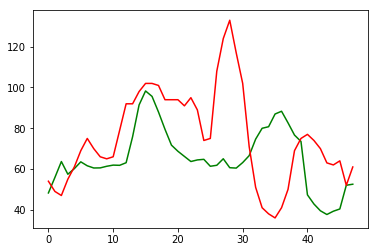

  3%|▎         | 1/34 [00:07<04:17,  7.79s/it]

(432, 11116)
(48, 11116)
[0]	train-gamma-nloglik:124.781	val-gamma-nloglik:129.262	train-sMAPE:1.92496	val-sMAPE:1.96383
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[10]	train-gamma-nloglik:76.4031	val-gamma-nloglik:79.138	train-sMAPE:1.88051	val-sMAPE:1.94114
[20]	train-gamma-nloglik:47.2547	val-gamma-nloglik:48.9308	train-sMAPE:1.81303	val-sMAPE:1.90501
[30]	train-gamma-nloglik:29.7605	val-gamma-nloglik:30.7903	train-sMAPE:1.71777	val-sMAPE:1.84861
[40]	train-gamma-nloglik:19.3195	val-gamma-nloglik:19.9595	train-sMAPE:1.5874	val-sMAPE:1.76326
[50]	train-gamma-nloglik:13.1515	val-gamma-nloglik:13.5562	train-sMAPE:1.41509	val-sMAPE:1.63997
[60]	train-gamma-nloglik:9.55868	val-gamma-nloglik:9.82338	train-sMAPE:1.20732	val-sMAPE:1.47293
[70]	train-gamma-nloglik:7.50294	val-gamma-nloglik:7.68595	train-sMAPE:0.998383	val-sMAPE:1.26412
[80]	train-gamma-nloglik:6.3455	val-gamma-nloglik:6.56367	

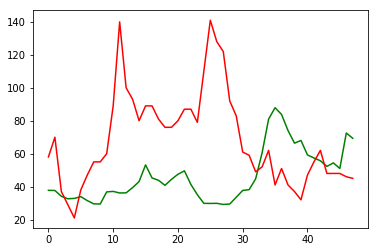

  6%|▌         | 2/34 [00:17<04:47,  8.98s/it]

(432, 11116)
(48, 11116)
[0]	train-gamma-nloglik:117.374	val-gamma-nloglik:126.133	train-sMAPE:1.90954	val-sMAPE:1.96478
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[10]	train-gamma-nloglik:71.9102	val-gamma-nloglik:77.2585	train-sMAPE:1.85639	val-sMAPE:1.94269
[20]	train-gamma-nloglik:44.5279	val-gamma-nloglik:47.8077	train-sMAPE:1.77652	val-sMAPE:1.90748
[30]	train-gamma-nloglik:28.1052	val-gamma-nloglik:30.1275	train-sMAPE:1.6633	val-sMAPE:1.8525
[40]	train-gamma-nloglik:18.3161	val-gamma-nloglik:19.5759	train-sMAPE:1.51172	val-sMAPE:1.76929
[50]	train-gamma-nloglik:12.5348	val-gamma-nloglik:13.3237	train-sMAPE:1.33945	val-sMAPE:1.64856
[60]	train-gamma-nloglik:9.16278	val-gamma-nloglik:9.67328	train-sMAPE:1.15004	val-sMAPE:1.48397
[70]	train-gamma-nloglik:7.22489	val-gamma-nloglik:7.59128	train-sMAPE:0.977335	val-sMAPE:1.28013
[80]	train-gamma-nloglik:6.12953	val-gamma-nloglik:6.54624

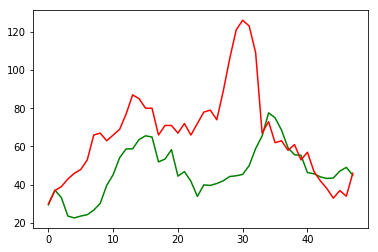

  9%|▉         | 3/34 [00:26<04:33,  8.83s/it]

(432, 11116)
(48, 11116)
[0]	train-gamma-nloglik:112.588	val-gamma-nloglik:159.704	train-sMAPE:1.92541	val-sMAPE:1.97121
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[10]	train-gamma-nloglik:69.0081	val-gamma-nloglik:97.785	train-sMAPE:1.88071	val-sMAPE:1.95312
[20]	train-gamma-nloglik:42.7674	val-gamma-nloglik:60.4222	train-sMAPE:1.81244	val-sMAPE:1.92426
[30]	train-gamma-nloglik:27.0353	val-gamma-nloglik:37.9437	train-sMAPE:1.7122	val-sMAPE:1.8791
[40]	train-gamma-nloglik:17.6672	val-gamma-nloglik:24.4787	train-sMAPE:1.57627	val-sMAPE:1.81051
[50]	train-gamma-nloglik:12.1482	val-gamma-nloglik:16.4711	train-sMAPE:1.40118	val-sMAPE:1.71085
[60]	train-gamma-nloglik:8.94408	val-gamma-nloglik:11.7702	train-sMAPE:1.19361	val-sMAPE:1.57502
[70]	train-gamma-nloglik:7.10949	val-gamma-nloglik:9.02372	train-sMAPE:1.01012	val-sMAPE:1.40591
[80]	train-gamma-nloglik:6.07492	val-gamma-nloglik:7.44933	t

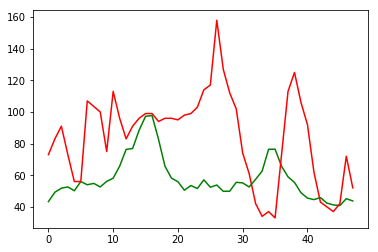

 12%|█▏        | 4/34 [00:35<04:24,  8.81s/it]

(432, 11116)
(48, 11116)
[0]	train-gamma-nloglik:119.936	val-gamma-nloglik:108.9	train-sMAPE:1.90042	val-sMAPE:1.90984
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[10]	train-gamma-nloglik:73.4653	val-gamma-nloglik:66.7278	train-sMAPE:1.84347	val-sMAPE:1.86025
[20]	train-gamma-nloglik:45.4719	val-gamma-nloglik:41.3413	train-sMAPE:1.75965	val-sMAPE:1.78914
[30]	train-gamma-nloglik:28.6782	val-gamma-nloglik:26.1244	train-sMAPE:1.64559	val-sMAPE:1.69179
[40]	train-gamma-nloglik:18.6658	val-gamma-nloglik:17.0679	train-sMAPE:1.4991	val-sMAPE:1.59693
[50]	train-gamma-nloglik:12.752	val-gamma-nloglik:11.737	train-sMAPE:1.33867	val-sMAPE:1.50949
[60]	train-gamma-nloglik:9.29392	val-gamma-nloglik:8.63655	train-sMAPE:1.18345	val-sMAPE:1.3857
[70]	train-gamma-nloglik:7.30296	val-gamma-nloglik:6.91479	train-sMAPE:1.03604	val-sMAPE:1.22916
[80]	train-gamma-nloglik:6.17435	val-gamma-nloglik:6.01236	trai

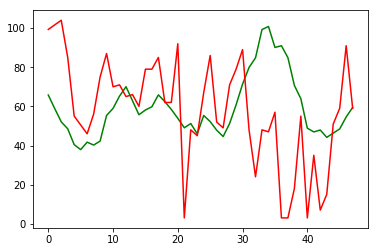

 15%|█▍        | 5/34 [00:46<04:28,  9.27s/it]

(432, 11116)
(48, 11116)
[0]	train-gamma-nloglik:110.803	val-gamma-nloglik:137.597	train-sMAPE:1.89375	val-sMAPE:1.96567
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[10]	train-gamma-nloglik:67.9262	val-gamma-nloglik:84.2929	train-sMAPE:1.83397	val-sMAPE:1.94418
[20]	train-gamma-nloglik:42.1106	val-gamma-nloglik:52.1534	train-sMAPE:1.74693	val-sMAPE:1.91002
[30]	train-gamma-nloglik:26.6347	val-gamma-nloglik:32.8807	train-sMAPE:1.62915	val-sMAPE:1.85692
[40]	train-gamma-nloglik:17.4238	val-gamma-nloglik:21.3219	train-sMAPE:1.4887	val-sMAPE:1.77687
[50]	train-gamma-nloglik:11.9942	val-gamma-nloglik:14.4721	train-sMAPE:1.34749	val-sMAPE:1.6619
[60]	train-gamma-nloglik:8.83773	val-gamma-nloglik:10.4544	train-sMAPE:1.18677	val-sMAPE:1.50718
[70]	train-gamma-nloglik:7.02851	val-gamma-nloglik:8.10632	train-sMAPE:1.02914	val-sMAPE:1.31238
[80]	train-gamma-nloglik:6.0023	val-gamma-nloglik:6.78106	t

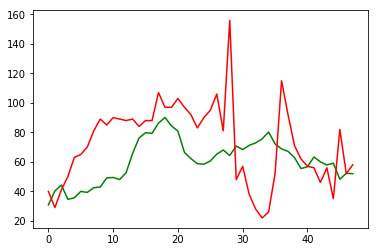

 18%|█▊        | 6/34 [00:55<04:18,  9.23s/it]

(432, 11116)
(48, 11116)
[0]	train-gamma-nloglik:125.923	val-gamma-nloglik:177.757	train-sMAPE:1.91801	val-sMAPE:1.97469
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[10]	train-gamma-nloglik:77.0983	val-gamma-nloglik:108.734	train-sMAPE:1.8705	val-sMAPE:1.95872
[20]	train-gamma-nloglik:47.6772	val-gamma-nloglik:67.0634	train-sMAPE:1.7996	val-sMAPE:1.93313
[30]	train-gamma-nloglik:30.0133	val-gamma-nloglik:41.9616	train-sMAPE:1.70547	val-sMAPE:1.89279
[40]	train-gamma-nloglik:19.4732	val-gamma-nloglik:26.9126	train-sMAPE:1.57538	val-sMAPE:1.83088
[50]	train-gamma-nloglik:13.2402	val-gamma-nloglik:17.9496	train-sMAPE:1.40771	val-sMAPE:1.7396
[60]	train-gamma-nloglik:9.60751	val-gamma-nloglik:12.6505	train-sMAPE:1.22093	val-sMAPE:1.61204
[70]	train-gamma-nloglik:7.52107	val-gamma-nloglik:9.60127	train-sMAPE:1.04061	val-sMAPE:1.45271
[80]	train-gamma-nloglik:6.33858	val-gamma-nloglik:7.88029	t

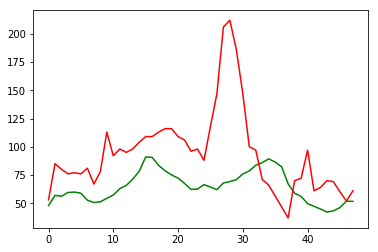

 21%|██        | 7/34 [01:02<04:01,  8.95s/it]

(432, 11116)
(48, 11116)
[0]	train-gamma-nloglik:118.685	val-gamma-nloglik:127.083	train-sMAPE:1.91193	val-sMAPE:1.96469
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[10]	train-gamma-nloglik:72.7081	val-gamma-nloglik:77.8356	train-sMAPE:1.86003	val-sMAPE:1.94254
[20]	train-gamma-nloglik:45.0137	val-gamma-nloglik:48.1577	train-sMAPE:1.78187	val-sMAPE:1.90728
[30]	train-gamma-nloglik:28.3999	val-gamma-nloglik:30.3403	train-sMAPE:1.66961	val-sMAPE:1.85227
[40]	train-gamma-nloglik:18.4976	val-gamma-nloglik:19.7054	train-sMAPE:1.52132	val-sMAPE:1.76909
[50]	train-gamma-nloglik:12.6479	val-gamma-nloglik:13.4097	train-sMAPE:1.34204	val-sMAPE:1.64878
[60]	train-gamma-nloglik:9.23669	val-gamma-nloglik:9.73058	train-sMAPE:1.15743	val-sMAPE:1.48507
[70]	train-gamma-nloglik:7.27603	val-gamma-nloglik:7.61167	train-sMAPE:0.98972	val-sMAPE:1.27777
[80]	train-gamma-nloglik:6.16727	val-gamma-nloglik:6.4783

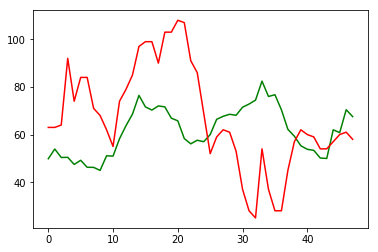

 24%|██▎       | 8/34 [01:10<03:48,  8.80s/it]

(432, 11116)
(48, 11116)
[0]	train-gamma-nloglik:121.911	val-gamma-nloglik:150.061	train-sMAPE:1.91765	val-sMAPE:1.96972
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[10]	train-gamma-nloglik:74.665	val-gamma-nloglik:91.8494	train-sMAPE:1.86915	val-sMAPE:1.95067
[20]	train-gamma-nloglik:46.2013	val-gamma-nloglik:56.7355	train-sMAPE:1.79599	val-sMAPE:1.92023
[30]	train-gamma-nloglik:29.1202	val-gamma-nloglik:35.6178	train-sMAPE:1.69248	val-sMAPE:1.87248
[40]	train-gamma-nloglik:18.9432	val-gamma-nloglik:22.9813	train-sMAPE:1.55417	val-sMAPE:1.79971
[50]	train-gamma-nloglik:12.9232	val-gamma-nloglik:15.4806	train-sMAPE:1.37749	val-sMAPE:1.6935
[60]	train-gamma-nloglik:9.41818	val-gamma-nloglik:11.1063	train-sMAPE:1.18303	val-sMAPE:1.55037
[70]	train-gamma-nloglik:7.40344	val-gamma-nloglik:8.59335	train-sMAPE:1.01242	val-sMAPE:1.37464
[80]	train-gamma-nloglik:6.25634	val-gamma-nloglik:7.17644	

KeyboardInterrupt: 

In [91]:
for i in tqdm(range(34)):
    trainX = np.concatenate((train_data[:,2*i:2*(i+1)],train_data[:,68:10880],train_data[:,10880+288*i:10880+288*(i+1)],train_data[:,-117:-102]),axis = 1)
    valX = np.concatenate((val_data[:,2*i:2*(i+1)],val_data[:,68:10880],val_data[:,10880+288*i:10880+288*(i+1)],val_data[:,-117:-102]),axis = 1)
    trainY = train_data[:, -102+3*i]
    valY = val_data[:, -102+3*i]
#     trainY = beijing_train[:, -105+3*i]
#     valY = beijing_test[:, -105+3*i]
    print(trainX.shape)
    print(valX.shape)

    params={
    'booster':'gbtree',
    'objective': 'reg:gamma', #多分类的问题
    # 'num_class':2, # 类别数，与 multisoftmax 并用
    'gamma':0,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth':2, # 构建树的深度，越大越容易过拟合
    'lambda':100,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'alpha':0,      # 控制模型复杂度的权重值的L1正则化项参数，参数越大，模型越不容易过拟合。
    'subsample':0.9, # 随机采样训练样本
    'colsample_bytree':0.1, # 生成树时进行的列采样
    'min_child_weight':1, 
    # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
    #，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
    #这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
    'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.05, # 如同学习率
    'seed':1000,
    'nthread':-1,# cpu 线程数
#     'eval_metric':['mae','rmse']
    }

    plst = list(params.items())
    num_rounds = 600 # 迭代次数
    xgb_train = xgb.DMatrix(trainX, label= trainY)
    xgb_val = xgb.DMatrix(valX, label= valY)
    watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]
    #训练模型并保存
    # early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
    model_PM10 = xgb.train(plst ,xgb_train, num_rounds, watchlist, early_stopping_rounds=50,verbose_eval=10,feval=sMAPE)
    plt.plot(model_PM10.predict(xgb.DMatrix(valX)),'g')
    plt.plot(valY,'r')
    plt.show()
    model_PM10.save_model('/home/lifuzhen/KDD2018/Mini_train/beijing_drop1/'+ str(i) +'_PM2.5.model') # 用于存储训练出的模型

# PM10

In [17]:
for i in tqdm(range(34)):
    trainX = np.concatenate((train_data[:,2*i:2*(i+1)],train_data[:,68:10880],train_data[:,10880+288*i:10880+288*(i+1)],train_data[:,-117:-102]),axis = 1)
    valX = np.concatenate((val_data[:,2*i:2*(i+1)],val_data[:,68:10880],val_data[:,10880+288*i:10880+288*(i+1)],val_data[:,-117:-102]),axis = 1)
    trainY = train_data[:, -102+3*i+1]
    valY = val_data[:, -102+3*i+1]
#     trainY = beijing_train[:, -105+3*i]
#     valY = beijing_test[:, -105+3*i]
    print(trainX.shape)
    print(valX.shape)

    params={
    'booster':'gbtree',
    'objective': 'reg:gamma', #多分类的问题
    # 'num_class':2, # 类别数，与 multisoftmax 并用
    'gamma':0,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth':2, # 构建树的深度，越大越容易过拟合
    'lambda':100,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'alpha':0,      # 控制模型复杂度的权重值的L1正则化项参数，参数越大，模型越不容易过拟合。
    'subsample':0.9, # 随机采样训练样本
    'colsample_bytree':0.1, # 生成树时进行的列采样
    'min_child_weight':1, 
    # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
    #，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
    #这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
    'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.05, # 如同学习率
    'seed':1000,
    'nthread':-1,# cpu 线程数
#     'eval_metric':['mae','rmse']
    }

    plst = list(params.items())
    num_rounds = 600 # 迭代次数
    xgb_train = xgb.DMatrix(trainX, label= trainY)
    xgb_val = xgb.DMatrix(valX, label= valY)
    watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]
    #训练模型并保存
    # early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
    model_PM10 = xgb.train(plst, xgb_train, num_rounds, watchlist, early_stopping_rounds=50,verbose_eval=100,feval=sMAPE)
    plt.plot(model_PM10.predict(xgb.DMatrix(valX)),'g')
    plt.plot(valY,'r')
    plt.show()
    model_PM10.save_model('/home/lifuzhen/KDD2018/Mini_train/beijing_drop1/'+ str(i) +'_PM10.model') # 用于存储训练出的模型

  0%|          | 0/34 [00:00<?, ?it/s]

(406, 11116)
(48, 11116)
[0]	train-gamma-nloglik:199.812	val-gamma-nloglik:307.133	train-sMAPE:1.95898	val-sMAPE:1.98063
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:6.15709	val-gamma-nloglik:7.59698	train-sMAPE:0.739428	val-sMAPE:1.00831
[200]	train-gamma-nloglik:5.39733	val-gamma-nloglik:6.11684	train-sMAPE:0.228166	val-sMAPE:0.362139
Stopping. Best iteration:
[226]	train-gamma-nloglik:5.38879	val-gamma-nloglik:6.11289	train-sMAPE:0.205071	val-sMAPE:0.353984



  3%|▎         | 1/34 [00:08<04:49,  8.78s/it]

(406, 11116)
(48, 11116)
[0]	train-gamma-nloglik:301.087	val-gamma-nloglik:326.569	train-sMAPE:1.96988	val-sMAPE:1.98219
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:7.04171	val-gamma-nloglik:7.42515	train-sMAPE:0.814353	val-sMAPE:0.978602
[200]	train-gamma-nloglik:5.76741	val-gamma-nloglik:6.1911	train-sMAPE:0.246509	val-sMAPE:0.405329
[300]	train-gamma-nloglik:5.72961	val-gamma-nloglik:6.20791	train-sMAPE:0.190177	val-sMAPE:0.391098
Stopping. Best iteration:
[319]	train-gamma-nloglik:5.72611	val-gamma-nloglik:6.20845	train-sMAPE:0.183335	val-sMAPE:0.389455



  6%|▌         | 2/34 [00:20<05:21, 10.05s/it]

(406, 11116)
(48, 11116)
[0]	train-gamma-nloglik:282.855	val-gamma-nloglik:341.438	train-sMAPE:1.96842	val-sMAPE:1.98329
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:6.87052	val-gamma-nloglik:7.56022	train-sMAPE:0.848432	val-sMAPE:0.951708
[200]	train-gamma-nloglik:5.73047	val-gamma-nloglik:6.16707	train-sMAPE:0.203859	val-sMAPE:0.365255


KeyboardInterrupt: 

# O3

  0%|          | 0/34 [00:00<?, ?it/s]

(432, 11116)
(48, 11116)
[0]	train-gamma-nloglik:164.642	val-gamma-nloglik:164.653	train-sMAPE:1.88565	val-sMAPE:1.9618
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.79174	val-gamma-nloglik:5.95726	train-sMAPE:0.862082	val-sMAPE:0.777695
Stopping. Best iteration:
[138]	train-gamma-nloglik:5.25927	val-gamma-nloglik:5.47049	train-sMAPE:0.514667	val-sMAPE:0.410072



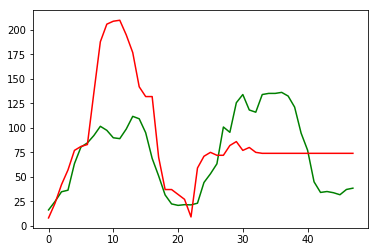

  3%|▎         | 1/34 [00:06<03:30,  6.36s/it]

(432, 11116)
(48, 11116)
[0]	train-gamma-nloglik:143.414	val-gamma-nloglik:155.027	train-sMAPE:1.88992	val-sMAPE:1.94453
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.49788	val-gamma-nloglik:5.98062	train-sMAPE:0.785753	val-sMAPE:0.840745
Stopping. Best iteration:
[147]	train-gamma-nloglik:4.98352	val-gamma-nloglik:5.6955	train-sMAPE:0.451972	val-sMAPE:0.580304



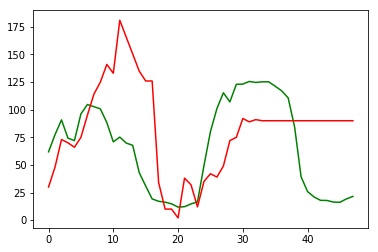

  6%|▌         | 2/34 [00:13<03:28,  6.53s/it]

(432, 11116)
(48, 11116)
[0]	train-gamma-nloglik:141.186	val-gamma-nloglik:136.63	train-sMAPE:1.83077	val-sMAPE:1.93849
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.4218	val-gamma-nloglik:6.49307	train-sMAPE:0.871463	val-sMAPE:0.942336
Stopping. Best iteration:
[130]	train-gamma-nloglik:4.96567	val-gamma-nloglik:6.23942	train-sMAPE:0.608768	val-sMAPE:0.760975



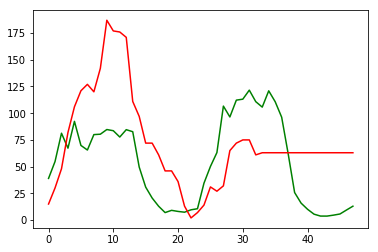

  9%|▉         | 3/34 [00:19<03:18,  6.41s/it]

(432, 11116)
(48, 11116)
[0]	train-gamma-nloglik:172.468	val-gamma-nloglik:159.655	train-sMAPE:1.90908	val-sMAPE:1.94429
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.89595	val-gamma-nloglik:5.82128	train-sMAPE:0.800769	val-sMAPE:0.781048
Stopping. Best iteration:
[143]	train-gamma-nloglik:5.32991	val-gamma-nloglik:5.3711	train-sMAPE:0.475159	val-sMAPE:0.484576



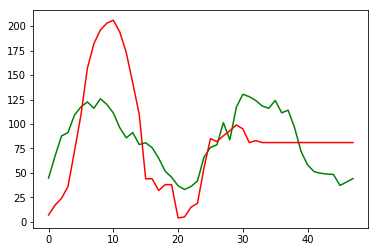

 12%|█▏        | 4/34 [00:25<03:13,  6.45s/it]

(432, 11116)
(48, 11116)
[0]	train-gamma-nloglik:166.209	val-gamma-nloglik:209.415	train-sMAPE:1.97025	val-sMAPE:1.97911
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.91856	val-gamma-nloglik:6.53204	train-sMAPE:0.68794	val-sMAPE:0.926819
[200]	train-gamma-nloglik:5.39162	val-gamma-nloglik:5.78404	train-sMAPE:0.168795	val-sMAPE:0.373741
Stopping. Best iteration:
[205]	train-gamma-nloglik:5.39025	val-gamma-nloglik:5.78393	train-sMAPE:0.16456	val-sMAPE:0.373666



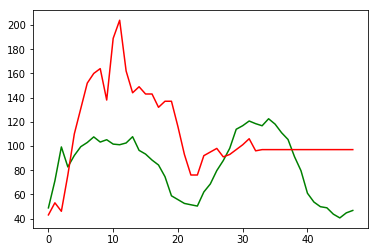

 15%|█▍        | 5/34 [00:33<03:16,  6.78s/it]

(432, 11116)
(48, 11116)
[0]	train-gamma-nloglik:212.333	val-gamma-nloglik:249.362	train-sMAPE:1.97688	val-sMAPE:1.98243
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:6.35363	val-gamma-nloglik:6.80489	train-sMAPE:0.775693	val-sMAPE:0.953915
[200]	train-gamma-nloglik:5.62866	val-gamma-nloglik:5.90159	train-sMAPE:0.145445	val-sMAPE:0.30169
Stopping. Best iteration:
[163]	train-gamma-nloglik:5.65138	val-gamma-nloglik:5.92056	train-sMAPE:0.198616	val-sMAPE:0.294115



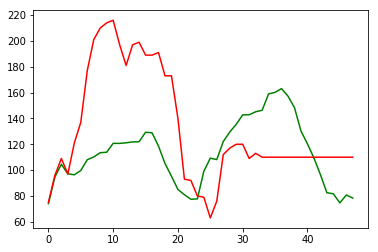

 18%|█▊        | 6/34 [00:40<03:11,  6.83s/it]

(432, 11116)
(48, 11116)
[0]	train-gamma-nloglik:175.506	val-gamma-nloglik:171.766	train-sMAPE:1.93153	val-sMAPE:1.96875
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.


KeyboardInterrupt: 

In [80]:
for i in tqdm(range(34)):
    trainX = np.concatenate((train_data[:,2*i:2*(i+1)],train_data[:,68+6*i+4:68+6*i+5],,train_data[:,-115:-114],train_data[:,-110:-109],train_data[:,-104:-103]),axis = 1)
    valX = np.concatenate((val_data[:,2*i:2*(i+1)],val_data[:,68+6*i+4:68+6*i+5],val_data[:,-115:-114],val_data[:,-110:-109],val_data[:,-104:-103]),axis = 1)
    trainY = train_data[:, -102+3*i+2]
    valY = val_data[:, -102+3*i+2]
#     trainY = beijing_train[:, -105+3*i]
#     valY = beijing_test[:, -105+3*i]
    print(trainX.shape)
    print(valX.shape)

    params={
    'booster':'gbtree',
    'objective': 'reg:gamma', #多分类的问题
    # 'num_class':2, # 类别数，与 multisoftmax 并用
    'gamma':0,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth':2, # 构建树的深度，越大越容易过拟合
    'lambda':100,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'alpha':0,      # 控制模型复杂度的权重值的L1正则化项参数，参数越大，模型越不容易过拟合。
    'subsample':0.9, # 随机采样训练样本
    'colsample_bytree':0.1, # 生成树时进行的列采样
    'min_child_weight':1, 
    # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
    #，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
    #这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
    'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.05, # 如同学习率
    'seed':1000,
    'nthread':-1,# cpu 线程数
#     'eval_metric':['mae','rmse']
    }

    plst = list(params.items())
    num_rounds = 600 # 迭代次数
    xgb_train = xgb.DMatrix(trainX, label= trainY)
    xgb_val = xgb.DMatrix(valX, label= valY)
    watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]
    #训练模型并保存
    # early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
    model_PM10 = xgb.train(plst, xgb_train, num_rounds, watchlist, early_stopping_rounds=50,verbose_eval=100,feval=sMAPE)
    plt.plot(model_PM10.predict(xgb.DMatrix(valX)),'g')
    plt.plot(valY,'r')
    plt.show()
    model_PM10.save_model('/home/lifuzhen/KDD2018/Mini_train/beijing_drop1/'+ str(i) +'_O3.model') # 用于存储训练出的模型

# London

In [ ]:
import xgboost as xgb
from sklearn.cross_validation import train_test_split
train_data, val_data = train_test_split(London_train, test_size = 0.3, random_state = 1)

# PM2.5

In [ ]:
for i in tqdm(range(13)):
    trainX = np.concatenate((train_data[:,2*i:2*(i+1)],train_data[:,26:1985],train_data[:,1985+144*i:1985+144*(i+1)],train_data[:,-34:-26]),axis = 1)
    valX = np.concatenate((val_data[:,2*i:2*(i+1)],val_data[:,26:1985],val_data[:,1985+144*i:1985+144*(i+1)],val_data[:,-34:-26]),axis = 1)
    trainY = train_data[:, -26+2*i]
    valY = val_data[:, -26+2*i]
    trainY[trainY <= 0] = 0.1
    valY[valY <= 0] = 0.1
#     trainY = London_train[:, -26+2*i]
#     valY = London_test[:, -26+2*i]
    print(trainX.shape)
    print(valX.shape)

    params={
    'booster':'gbtree',
    'objective': 'reg:gamma', #多分类的问题
    # 'num_class':2, # 类别数，与 multisoftmax 并用
    'gamma':0,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth':2, # 构建树的深度，越大越容易过拟合
    'lambda':100,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'alpha':0,      # 控制模型复杂度的权重值的L1正则化项参数，参数越大，模型越不容易过拟合。
    'subsample':0.9, # 随机采样训练样本
    'colsample_bytree':0.2, # 生成树时进行的列采样
    'min_child_weight':1, 
    # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
    #，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
    #这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
    'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.05, # 如同学习率
    'seed':1000,
    'nthread':-1,# cpu 线程数
#     'eval_metric':['mae','rmse']
    }

    plst = list(params.items())
    num_rounds = 600 # 迭代次数
    xgb_train = xgb.DMatrix(trainX, label= trainY)
    xgb_val = xgb.DMatrix(valX, label= valY)
    watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]
    #训练模型并保存
    # early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
    model_PM10 = xgb.train(plst, xgb_train, num_rounds, watchlist, early_stopping_rounds=50,verbose_eval = 100,feval=sMAPE)
    model_PM10.save_model('/home/lifuzhen/KDD2018/Mini_train/London_drop1/'+ str(i) +'_PM2.5.model') # 用于存储训练出的模型

# PM10

In [ ]:
for i in tqdm(range(13)):
    trainX = np.concatenate((train_data[:,2*i:2*(i+1)],train_data[:,26:1985],train_data[:,1985+144*i:1985+144*(i+1)],train_data[:,-34:-26]),axis = 1)
    valX = np.concatenate((val_data[:,2*i:2*(i+1)],val_data[:,26:1985],val_data[:,1985+144*i:1985+144*(i+1)],val_data[:,-34:-26]),axis = 1)
    trainY = train_data[:, -26+2*i+1]
    valY = val_data[:, -26+2*i+1]
    trainY[trainY <= 0] = 0.1
    valY[valY <= 0] = 0.1
#     trainY = London_train[:, -26+2*i+1]
#     valY = London_test[:, -26+2*i+1]
    print(trainX.shape)
    print(valX.shape)

    params={
    'booster':'gbtree',
    'objective': 'reg:gamma', #多分类的问题
    # 'num_class':2, # 类别数，与 multisoftmax 并用
    'gamma':0,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth':2, # 构建树的深度，越大越容易过拟合
    'lambda':100,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'alpha':0,      # 控制模型复杂度的权重值的L1正则化项参数，参数越大，模型越不容易过拟合。
    'subsample':0.9, # 随机采样训练样本
    'colsample_bytree':0.2, # 生成树时进行的列采样
    'min_child_weight':1, 
    # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
    #，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
    #这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
    'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.05, # 如同学习率
    'seed':1000,
    'nthread':-1,# cpu 线程数
#     'eval_metric':['mae','rmse']
    }

    plst = list(params.items())
    num_rounds = 600 # 迭代次数
    xgb_train = xgb.DMatrix(trainX, label= trainY)
    xgb_val = xgb.DMatrix(valX, label= valY)
    watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]
    #训练模型并保存
    # early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
    model_PM10 = xgb.train(plst, xgb_train, num_rounds, watchlist, early_stopping_rounds=50,verbose_eval=100,feval=sMAPE)
    model_PM10.save_model('/home/lifuzhen/KDD2018/Mini_train/London_drop1/'+ str(i) +'_PM10.model') # 用于存储训练出的模型

# predict

In [1]:
import requests
for i in range(7,8):
    for j in range(0,24):
        end   = '2018-05-'+str(i).zfill(2)+'-'+str(j)
        url = 'http://kdd.caiyunapp.com/competition/forecast/bj/'+end+'/2k0d1d8'
        respones= requests.get(url)
        with open ('/home/lifuzhen/KDD2018/Mini_train/bj_grid_meteorology_forecast_48_hours'+'_'+end+'.csv','w') as f:
            f.write(respones.text)

for i in range(7,8):
    for j in range(0,24):
        end   = '2018-05-'+str(i).zfill(2)+'-'+str(j)
        url = 'http://kdd.caiyunapp.com/competition/forecast/ld/'+end+'/2k0d1d8'
        respones= requests.get(url)
        with open ('/home/lifuzhen/KDD2018/Mini_train/ld_grid_meteorology_forecast_48_hours'+'_'+end+'.csv','w') as f:
            f.write(respones.text)

In [33]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from datetime import timedelta
from datetime import datetime
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy

def gen_dates(b_date, count):
    hour = timedelta(hours=1)
    for i in range(count+1):
        yield b_date + hour*i


def get_date_list(start=None, end=None):
    """
    获取日期列表
    :param start: 开始日期
    :param end: 结束日期
    :return:
    """
    if start is None:
        start = datetime.strptime("2000-01-01 00:00:00", "%Y-%m-%d %H:%M:%S")
    if end is None:
        end = datetime.now()
    data = []
    for d in gen_dates(start, int((end-start).total_seconds()/3600)):
        data.append(str(d))
    return data


Medium_PM10 = 88
Medium_PM25 = 59
Medium_O3   = 56
Medium_NO2  = 46
Medium_CO   = 1
Medium_SO2  = 9
def to_timedict_bj(start, end):
    "输入时间和表格，返回字典"
    aq = pd.read_csv('/home/lifuzhen/KDD2018/Predict/bj_airquality_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo = pd.read_csv('/home/lifuzhen/KDD2018/Predict/bj_meteorology_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo_grid = pd.read_csv('/home/lifuzhen/KDD2018/Predict/bj_grid_meteorology_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    
    alt_list = get_date_list(Start , End)
    alt_dict = {}
    recons = pd.DataFrame(columns=('stationId','utc_time','PM2.5','PM10','NO2','CO','O3','SO2'))
    
    for i in alt_list:
        alt_dict[i] = []
    alt = np.array(aq[['station_id','time','PM25_Concentration','PM10_Concentration','NO2_Concentration','CO_Concentration','O3_Concentration','SO2_Concentration']]).tolist()
    for i in tqdm(['aotizhongxin', 'badaling', 'beibuxinqu', 'daxing', 'dingling', 'donggaocun', 'dongsi','dongsihuan','fangshan', 'fengtaihuayuan', 'guanyuan', 'gucheng','huairou', 'liulihe', 'mentougou', 'miyun', 'miyunshuiku', 'nansanhuan', 'nongzhanguan', 'pingchang', 'pinggu','qianmen','shunyi','tiantan','tongzhou','wanliu','wanshouxigong','xizhimenbei','yanqin','yizhuang','yongdingmennei','yongledian','yufa','yungang']):
        count = 0
        for j in aq['station_id']:
            if j.split('_')[0] == i:
                recons.loc[count] = alt[count]
            count += 1 
#     print(recons)
    recons.reset_index(drop=True,inplace=True)
#     recons.loc[recons['stationId'] == 'zhiwuyuan_aq',['PM2.5','PM10','NO2','CO','O3','SO2']] = [Medium_PM25,Medium_PM10,Medium_NO2,Medium_CO,Medium_O3,Medium_SO2]

#     print(recons.loc[recons['stationId'] == 'zhiwuyuan_aq'])
    recons.interpolate(inplace = True)
#     print(recons.loc[recons['stationId'] == 'zhiwuyuan_aq'])
    recons['PM2.5'].fillna(Medium_PM25, inplace = True)
    recons['PM10'].fillna(Medium_PM10, inplace = True)
    recons['NO2'].fillna(Medium_NO2, inplace = True)
    recons['CO'].fillna(Medium_CO, inplace = True)
    recons['O3'].fillna(Medium_O3, inplace = True)
    recons['SO2'].fillna(Medium_SO2, inplace = True)
    
    recons['lon'] = 0 ##经度
    recons['lat'] = 0  ##纬度
    recons.loc[recons['stationId']=='dongsi_aq',['lon','lat']] = [116.417,39.929]
    recons.loc[recons['stationId']=='tiantan_aq',['lon','lat']] = [116.407,39.886]
    recons.loc[recons['stationId']=='guanyuan_aq',['lon','lat']] = [116.339,39.929]
    recons.loc[recons['stationId']=='wanshouxigong_aq',['lon','lat']] = [116.352,39.878]
    recons.loc[recons['stationId']=='aotizhongxin_aq',['lon','lat']] = [116.397,39.982]
    recons.loc[recons['stationId']=='nongzhanguan_aq',['lon','lat']] = [116.461,39.937]
    recons.loc[recons['stationId']=='wanliu_aq',['lon','lat']] = [116.287,39.987]
    recons.loc[recons['stationId']=='beibuxinqu_aq',['lon','lat']] = [116.174,40.09]
    recons.loc[recons['stationId']=='zhiwuyuan_aq',['lon','lat']] = [116.207,40.002]
    recons.loc[recons['stationId']=='fengtaihuayuan_aq',['lon','lat']] = [116.279,39.863]
    recons.loc[recons['stationId']=='yungang_aq',['lon','lat']] = [116.146,39.824]
    recons.loc[recons['stationId']=='gucheng_aq',['lon','lat']] = [116.184,39.914]
    recons.loc[recons['stationId']=='fangshan_aq',['lon','lat']] = [116.136,39.742]
    recons.loc[recons['stationId']=='daxing_aq',['lon','lat']] = [116.404,39.718]
    recons.loc[recons['stationId']=='yizhuang_aq',['lon','lat']] = [116.506,39.795]
    recons.loc[recons['stationId']=='tongzhou_aq',['lon','lat']] = [116.663,39.886]
    recons.loc[recons['stationId']=='shunyi_aq',['lon','lat']] = [116.655,40.127]
    recons.loc[recons['stationId']=='pingchang_aq',['lon','lat']] = [116.23,40.217]
    recons.loc[recons['stationId']=='mentougou_aq',['lon','lat']] = [116.106,39.937]
    recons.loc[recons['stationId']=='pinggu_aq',['lon','lat']] = [117.1,40.143]
    recons.loc[recons['stationId']=='hureconsou_aq',['lon','lat']] = [116.628,40.328]
    recons.loc[recons['stationId']=='miyun_aq',['lon','lat']] = [116.832,40.37]
    recons.loc[recons['stationId']=='yanqin_aq',['lon','lat']] = [115.972,40.453]
    recons.loc[recons['stationId']=='dingling_aq',['lon','lat']] = [116.22,40.292]
    recons.loc[recons['stationId']=='badaling_aq',['lon','lat']] = [115.988,40.365]
    recons.loc[recons['stationId']=='miyunshuiku_aq',['lon','lat']] = [116.911,40.499]
    recons.loc[recons['stationId']=='donggaocun_aq',['lon','lat']] = [117.12,40.1]
    recons.loc[recons['stationId']=='yongledian_aq',['lon','lat']] = [116.783,39.712]
    recons.loc[recons['stationId']=='yufa_aq',['lon','lat']] = [116.3,39.52]
    recons.loc[recons['stationId']=='liulihe_aq',['lon','lat']] = [116,39.58]
    recons.loc[recons['stationId']=='qianmen_aq',['lon','lat']] = [116.395,39.899]
    recons.loc[recons['stationId']=='yongdingmennei_aq',['lon','lat']] = [116.394,39.876]
    recons.loc[recons['stationId']=='xizhimenbei_aq',['lon','lat']] = [116.349,39.954]
    recons.loc[recons['stationId']=='nansanhuan_aq',['lon','lat']] = [116.368,39.856]
    recons.loc[recons['stationId']=='dongsihuan_aq',['lon','lat']] = [116.483,39.939]
        
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['lon','lat']]).tolist()
    for i in tqdm(np.array(recons['utc_time']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
    
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['PM2.5','PM10','NO2','CO','O3','SO2']]).tolist()
    for i in tqdm(np.array(recons['utc_time']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
        
    for k,v in alt_dict.items():
        if len(v) == 0:
            if int(k.split(' ')[1].split(':')[0]) != 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
            else:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    for k,v in alt_dict.items():
        if len(v) == 0:
            if int(k.split(' ')[1].split(':')[0]) != 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
            else:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
        if len(v) == 272:
            print(k)
            print(len(v))
    print(max(length))
    print(min(length))
#     print(recons)
    ######################处理缺失时间点完毕#####################shunyi_meo


#     recons_meo = pd.DataFrame(columns=('station_id','time','temperature','pressure','humidity','wind_direction','wind_speed','weather'))

#     alt = np.array(meo[['station_id','time','temperature','pressure','humidity','wind_direction','wind_speed','weather']]).tolist()
#     for i in tqdm(['shunyi_meo','hadian_meo','yanqing_meo','miyun_meo','huairou_meo','shangdianzi_meo','pinggu_meo','tongzhou_meo','chaoyang_meo','pingchang_meo','zhaitang_meo','mentougou_meo','beijing_meo','shijingshan_meo','fengtai_meo','daxing_meo','fangshan_meo','xiayunling_meo']):
#         count = 0
#         for j in meo['station_id']:
#             if j == i:
#                 recons_meo.loc[count] = alt[count]
#             count += 1 
    
#     for i in range(len(recons_meo['wind_speed'])):
#         if recons_meo['wind_speed'][i] == 999017:
#             recons_meo.loc[i,'wind_speed'] = recons_meo.loc[i-1,'wind_speed']
#     recons_meo['longitude'] = 0 ##经度
#     recons_meo['latitude'] = 0  ##纬度
#     recons_meo.loc[recons_meo['station_id']=='shunyi_meo',['longitude','latitude']] = [116.6153,40.12667]
#     recons_meo.loc[recons_meo['station_id']=='haidian_meo',['longitude','latitude']] = [116.2906,39.98694]
#     recons_meo.loc[recons_meo['station_id']=='yanqing_meo',['longitude','latitude']] = [115.9689,40.44944]
#     recons_meo.loc[recons_meo['station_id']=='miyun_meo',['longitude','latitude']] = [116.8642,40.3775]
#     recons_meo.loc[recons_meo['station_id']=='huairou_meo',['longitude','latitude']] = [116.6269,40.35778]
#     recons_meo.loc[recons_meo['station_id']=='shangdianzi_meo',['longitude','latitude']] = [117.1117,40.65889]
#     recons_meo.loc[recons_meo['station_id']=='pinggu_meo',['longitude','latitude']] = [117.1178,40.16944]
#     recons_meo.loc[recons_meo['station_id']=='tongzhou_meo',['longitude','latitude']] = [116.7567,39.8475]
#     recons_meo.loc[recons_meo['station_id']=='chaoyang_meo',['longitude','latitude']] = [116.5008,39.9525]
#     recons_meo.loc[recons_meo['station_id']=='pingchang_meo',['longitude','latitude']] = [116.2117,40.22333]
#     recons_meo.loc[recons_meo['station_id']=='zhaitang_meo',['longitude','latitude']] = [115.6922,39.97389]
#     recons_meo.loc[recons_meo['station_id']=='mentougou_meo',['longitude','latitude']] = [116.1564,39.88778]
#     recons_meo.loc[recons_meo['station_id']=='beijing_meo',['longitude','latitude']] = [116.4694,39.80611]
#     recons_meo.loc[recons_meo['station_id']=='shijingshan_meo',['longitude','latitude']] = [116.2053,39.9425]
#     recons_meo.loc[recons_meo['station_id']=='fengtai_meo',['longitude','latitude']] = [116.2453,39.87028]
#     recons_meo.loc[recons_meo['station_id']=='daxing_meo',['longitude','latitude']] = [116.3544,39.71861]
#     recons_meo.loc[recons_meo['station_id']=='fangshan_meo',['longitude','latitude']] = [116.1942,39.77306]
#     recons_meo.loc[recons_meo['station_id']=='xiayunling_meo',['longitude','latitude']] = [115.7406,39.72861]

#     recons_meo.loc[meo['weather'] == 'Sunny/clear' , 'weather'] = 0
#     recons_meo.loc[meo['weather'] == 'Snow' , 'weather'] = 1
#     recons_meo.loc[meo['weather'] == 'Sleet' , 'weather'] = 2
#     recons_meo.loc[meo['weather'] == 'Sand' , 'weather'] = 3
#     recons_meo.loc[meo['weather'] == 'Rain/Snow with Hail' , 'weather'] = 4
#     recons_meo.loc[meo['weather'] == 'Rain with Hail' , 'weather'] = 5
#     recons_meo.loc[meo['weather'] == 'Rain' , 'weather'] = 6
#     recons_meo.loc[meo['weather'] == 'Haze' , 'weather'] = 7
#     recons_meo.loc[meo['weather'] == 'Fog' , 'weather'] = 8
#     recons_meo.loc[meo['weather'] == 'Dust' , 'weather'] = 9
#     recons_meo.loc[meo['weather'] == 'Hail' , 'weather'] = 4
#     recons_meo.loc[meo['weather'] == 'Cloudy' , 'weather'] = 0
#     recons_meo.loc[meo['weather'] == 'Overcast' , 'weather'] = 0
#     recons_meo.loc[meo['weather'] == 'Thundershower' , 'weather'] = 6
#     def div5(x):
#         return int(x/5)
#     def div15(x):
#         return int(x/15)
#     def div05(x):
#         return int(x/0.5)
#     recons_meo['temperature'] = recons_meo['temperature'].apply(div5)
#     recons_meo['pressure'] = recons_meo['pressure'].apply(div5)
#     recons_meo['humidity'] = recons_meo['humidity'].apply(div5)
#     recons_meo['wind_direction'] = recons_meo['wind_direction'].apply(div15)
#     recons_meo['wind_speed/kph'] = recons_meo['wind_speed'].apply(div05)
#     #############wether量化###############

#     #############处理缺失时间点##########
#     count = 0
#     Idx = 0  ####索引记录####
#     meo_list = np.array(recons_meo[['temperature','pressure','humidity','wind_direction','wind_speed','weather']]).tolist()
    

#     for i in tqdm(np.array(recons_meo['time']).tolist()):
#         if i in alt_dict.keys():
#             alt_dict[i].extend(meo_list[Idx])

#         Idx += 1
        
#     length = []  
    
#     for k,v in alt_dict.items():
#         length.append(len(v))
# #         if len(v) != 416:
# #             print(k)
# #             print(len(v))
#     print(max(length))
#     print(min(length))  
    
#     for i in range(3):
#         for k,v in alt_dict.items():
#             if len(v) < max(length):
#                 if int(k.split(' ')[1].split(':')[0]) != 0:
#                     alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
#                 else:
#                     alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
                
#     length = []
#     for k,v in alt_dict.items():
#         length.append(len(v))
# #         if len(v) != 416:
# #             print(k)
# #             print(len(v))
#     print(max(length))
#     print(min(length))  
#     ######################处理缺失时间点完毕#####################
#     meo_grid['longitude'] = 0 ##经度
#     meo_grid['latitude'] = 0  ##纬度
#     count = 0
#     for i in range(1150,1181,1):
#         for j in range(390,411,1):
#             if (i >= 1156 and i <= 1172) and (j >= 395 and j <= 407):
#                 meo_grid.loc[meo_grid['station_id']=='beijing_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
# #                 print([i,j])
#             count += 1
    
#     meo_grid.drop(meo_grid[meo_grid['longitude'] < 115.6].index.tolist(),inplace= True)
#     meo_grid.drop(meo_grid[meo_grid['longitude'] > 117.2].index.tolist(),inplace= True)
#     meo_grid.drop(meo_grid[meo_grid['latitude']  < 39.5].index.tolist(),inplace= True)
#     meo_grid.drop(meo_grid[meo_grid['latitude']  > 40.7].index.tolist(),inplace= True)
#     meo_grid.drop('id',axis = 1)
#     meo_grid.drop_duplicates(inplace=True)
#     meo_grid.reset_index(drop=True,inplace=True)
# #     print(meo_grid.head(100))
#     def div5(x):
#         return int(x/5)
#     def div15(x):
#         return int(x/15)
#     def div05(x):
#         return int(x/0.5)
#     meo_grid['temperature'] = meo_grid['temperature'].apply(div5)
#     meo_grid['pressure'] = meo_grid['pressure'].apply(div5)
#     meo_grid['humidity'] = meo_grid['humidity'].apply(div5)
#     meo_grid['wind_direction'] = meo_grid['wind_direction'].apply(div15)
#     meo_grid['wind_speed/kph'] = meo_grid['wind_speed'].apply(div05)
    
    
    
    
#     count = 1
#     Idx = 0  ####索引记录####

#     meo_grid_list = np.array(meo_grid[['temperature','pressure','humidity','wind_direction','wind_speed']]).tolist()
#     for i in tqdm(meo_grid['time']):
#         if i in alt_dict.keys():
#             if Idx > 0:
#                 count = int(meo_grid['station_id'][Idx].split('_')[2]) - int(meo_grid['station_id'][Idx-1].split('_')[2])
                
#             if count > 1 and count < 9:
#                 for j in range(count-1):
#                     alt_dict[i].extend(meo_grid_list[Idx-1])
#             if count > 9:
#                 for j in range(count-9):
#                     alt_dict[i].extend(meo_grid_list[Idx+1])
#             alt_dict[i].extend(meo_grid_list[Idx])
#         Idx += 1
        
        
        
        
        
        
        
#     length = []
#     for k,v in alt_dict.items():
#         length.append(len(v))
# #         if len(v) != 1485:
# #             print(k)
# #             print(len(v))
#     print(max(length))
#     print(min(length))
#     for i in range(3):
#         for k,v in alt_dict.items():
#             if len(v) != 1485:
#                 if int(k.split(' ')[1].split(':')[0]) != 0:
#                     alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
#                 else:
#                     alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
                
            
            
        
        
#     length = []
#     for k,v in alt_dict.items():
#         length.append(len(v))
# #         if len(v) != 1963:
# #             print(k)
# #             print(len(v))
#     print(max(length))
#     print(min(length))
    pop_list = []
    for k in tqdm(alt_dict.keys()):
        weather_fore = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/bj_grid_meteorology_forecast_48_hours_'+k.split(' ')[0]+'-'+str(int(k.split(' ')[1].split(':')[0]))+'.csv')
        if np.array(weather_fore).tolist() == []:
            pop_list.append(k)
            continue
        weather_fore['weather'].replace(['CLEAR_DAY','CLEAR_NIGHT','CLOUDY','PARTLY_CLOUDY_DAY','PARTLY_CLOUDY_NIGHT','RAIN','SNOW','WIND','HAZE'],[0,1,2,3,4,5,6,7,8],inplace = True)
        weather_fore['longitude'] = 0 ##经度
        weather_fore['latitude'] = 0  ##纬度
        count = 0
        print(k)
        for i in range(1150,1181,1):
            for j in range(390,411,1):
                if (i >= 1156 and i <= 1172) and (j >= 395 and j <= 407):
                    weather_fore.loc[weather_fore['station_id']=='beijing_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
#                     print([i,j])
                count += 1

        weather_fore.drop(weather_fore[weather_fore['longitude'] < 115.6].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['longitude'] > 117.2].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  < 39.5].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  > 40.7].index.tolist(),inplace= True)
        weather_fore.reset_index(drop=True,inplace=True)
        
        weather_fore_array = np.array(weather_fore['weather'])
        alt_dict[k].extend(weather_fore_array.tolist())
        print(len(alt_dict[k]))
        if len(alt_dict[k]) != 10880:
            pop_list.append(k)
    for i in pop_list:
        alt_dict[i].extend(np.zeros(10880-len(alt_dict[i])).tolist())
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1963:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    alt_frame = pd.DataFrame.from_dict(alt_dict).T
    count = 0
    for i in list(alt_frame.index):
        if i in pop_list:
            alt_frame.iloc[count,list(range(272,10880))] = copy.deepcopy(alt_frame.iloc[count-1,list(range(272,10880))])
            alt_dict[i][272:10880] = copy.deepcopy(alt_frame.iloc[count-1,list(range(272,10880))]).tolist()
        count += 1
    ##########提取aq 48小时滑窗##########
    win = 48
#     win = 72
#     win = 16
#     win = 168
    
    for i in tqdm(range(68,272)):  
        count = 0
        for j in alt_frame[i]:
            if count >= win:
                alt_dict[alt_frame.index[count]].extend(np.array(alt_frame[i][count-win:count]).tolist())
                if i == 271:
                    if date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 3 or date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 4: ###要预测的是周末
                        alt_dict[alt_frame.index[count]].extend([1])
                    else:
                        alt_dict[alt_frame.index[count]].extend([0])
                    if int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [0,1,2,10,11,12]: #####是否为早晚高峰时段（北京转utc时间）
                        alt_dict[alt_frame.index[count]].extend([2])
                    elif int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [16,17,18,19,20]:
                        alt_dict[alt_frame.index[count]].extend([1])
                    else:
                        alt_dict[alt_frame.index[count]].extend([0])
                    alt_dict[alt_frame.index[count]]..append(int(alt_frame.index[count].split(' ')[1].split(':')[0]))
            count += 1
            
    hour_last = ''
    count = 0
    for k in tqdm(list(alt_frame.index)):
        for i in range(0,6):
            SUM = 0
            for j in range(0,34):
                SUM += alt_dict[k][68+j*6+i]
            alt_dict[k].append(SUM)

        if count == 0:
            alt_dict[k].extend([0,0,0,0,0,0])
        else:
            for m,n in zip(alt_dict[k][-6:] ,alt_dict[hour_last][-12:-6]):
                alt_dict[k].append(m-n)

        hour_last = k
        count += 1
#     ##########标签值 PM10 PM2.5 O3##########
#     step = 72  ####预测间隔
#     for i in tqdm(range(272)):  ##训练数据
#         count = 0
#         for j in alt_frame[i]:
#             if count+step < len(alt_frame[i]) and (i%8 == 0 or i%8 == 1 or i%8 == 4):
#                 alt_dict[alt_frame.index[count]].append(np.array(alt_frame[i][count+step]).tolist())
#             count += 1
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) < 4973:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    pop_list = []
    for i in alt_dict.keys():
        if len(alt_dict[i]) <  max(length):
            pop_list.append(i)
    for i in pop_list:
        alt_dict.pop(i)
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 4960:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    return alt_dict

In [34]:
Start = datetime.strptime("2018-05-05 00:00:00", "%Y-%m-%d %H:%M:%S")
End = datetime.strptime("2018-05-08 23:00:00", "%Y-%m-%d %H:%M:%S")

pre_dict_bj = to_timedict_bj(start = Start, end = End)
pre_frame_bj = pd.DataFrame.from_dict(pre_dict_bj).T
pre_list_bj = np.array(pre_frame_bj)

  0%|          | 0/18 [00:00<?, ?it/s]

2018-05-06 12:00:00
272
2018-05-06 19:00:00
272
2018-05-04 01:00:00
272
2018-05-07 02:00:00
272
2018-05-04 16:00:00
272
2018-05-07 19:00:00
272
2018-05-07 04:00:00
272
2018-05-07 03:00:00
272
2018-05-05 19:00:00
272
2018-05-05 15:00:00
272
2018-05-04 11:00:00
272
2018-05-04 21:00:00
272
2018-05-07 07:00:00
272
2018-05-06 20:00:00
272
2018-05-06 15:00:00
272
2018-05-07 15:00:00
272
2018-05-06 06:00:00
272
2018-05-05 08:00:00
272
2018-05-07 16:00:00
272
2018-05-07 08:00:00
272
2018-05-04 19:00:00
272
2018-05-04 09:00:00
272
2018-05-04 10:00:00
272
2018-05-06 04:00:00
272
2018-05-07 23:00:00
272
2018-05-07 09:00:00
272
2018-05-04 00:00:00
272
2018-05-06 22:00:00
272
2018-05-06 13:00:00
272
2018-05-04 20:00:00
272
2018-05-06 14:00:00
272
2018-05-05 01:00:00
272
2018-05-05 18:00:00
272
2018-05-05 17:00:00
272
2018-05-07 01:00:00
272
2018-05-06 17:00:00
272
2018-05-06 21:00:00
272
2018-05-05 04:00:00
272
2018-05-04 23:00:00
272
2018-05-06 18:00:00
272
2018-05-06 00:00:00
272
2018-05-05 09:00

100%|██████████| 1653/1653 [00:00<00:00, 1639050.71it/s]


380
272
380
380


  0%|          | 0/96 [00:00<?, ?it/s]

1485
380
1485
1485
2018-05-06 12:00:00


  1%|          | 1/96 [00:01<01:52,  1.19s/it]

12093
2018-05-06 19:00:00


  2%|▏         | 2/96 [00:02<01:44,  1.11s/it]

12093
2018-05-04 01:00:00


  3%|▎         | 3/96 [00:03<01:41,  1.09s/it]

12093
2018-05-07 02:00:00


  4%|▍         | 4/96 [00:04<01:40,  1.09s/it]

12093
2018-05-04 16:00:00


  5%|▌         | 5/96 [00:05<01:38,  1.08s/it]

12093
2018-05-07 19:00:00


  6%|▋         | 6/96 [00:06<01:37,  1.08s/it]

12093
2018-05-07 04:00:00


  7%|▋         | 7/96 [00:07<01:35,  1.07s/it]

12093
2018-05-07 03:00:00


  8%|▊         | 8/96 [00:08<01:34,  1.07s/it]

12093
2018-05-04 11:00:00


 11%|█▏        | 11/96 [00:09<01:14,  1.14it/s]

12093
2018-05-04 21:00:00


 12%|█▎        | 12/96 [00:10<01:14,  1.12it/s]

12093
2018-05-07 07:00:00


 14%|█▎        | 13/96 [00:11<01:15,  1.10it/s]

12093
2018-05-06 20:00:00


 15%|█▍        | 14/96 [00:12<01:16,  1.08it/s]

12093
2018-05-06 15:00:00


 16%|█▌        | 15/96 [00:14<01:15,  1.07it/s]

12093
2018-05-07 15:00:00


 17%|█▋        | 16/96 [00:15<01:15,  1.05it/s]

12093
2018-05-06 06:00:00


 18%|█▊        | 17/96 [00:16<01:15,  1.05it/s]

12093
2018-05-05 08:00:00


 19%|█▉        | 18/96 [00:17<01:14,  1.04it/s]

12093
2018-05-07 16:00:00


 20%|█▉        | 19/96 [00:18<01:14,  1.03it/s]

12093
2018-05-07 08:00:00


 21%|██        | 20/96 [00:19<01:13,  1.03it/s]

12093
2018-05-04 19:00:00


 22%|██▏       | 21/96 [00:20<01:13,  1.02it/s]

12093
2018-05-04 09:00:00


 23%|██▎       | 22/96 [00:21<01:12,  1.02it/s]

12093
2018-05-04 10:00:00


 24%|██▍       | 23/96 [00:22<01:12,  1.01it/s]

12093
2018-05-06 04:00:00


 25%|██▌       | 24/96 [00:23<01:11,  1.01it/s]

12093
2018-05-07 23:00:00


 26%|██▌       | 25/96 [00:24<01:10,  1.00it/s]

12093
2018-05-04 00:00:00


 28%|██▊       | 27/96 [00:25<01:06,  1.04it/s]

12093
2018-05-06 22:00:00


 29%|██▉       | 28/96 [00:27<01:05,  1.03it/s]

12093
2018-05-06 13:00:00


 30%|███       | 29/96 [00:28<01:05,  1.03it/s]

12093
2018-05-04 20:00:00


 31%|███▏      | 30/96 [00:29<01:04,  1.03it/s]

12093
2018-05-06 14:00:00


 32%|███▏      | 31/96 [00:30<01:03,  1.02it/s]

12093
2018-05-05 01:00:00


 33%|███▎      | 32/96 [00:31<01:02,  1.02it/s]

12093
2018-05-07 01:00:00


 36%|███▋      | 35/96 [00:32<00:56,  1.08it/s]

12093
2018-05-06 17:00:00


 38%|███▊      | 36/96 [00:33<00:55,  1.07it/s]

12093
2018-05-06 21:00:00


 39%|███▊      | 37/96 [00:34<00:55,  1.07it/s]

12093
2018-05-05 04:00:00


 40%|███▉      | 38/96 [00:35<00:54,  1.06it/s]

12093
2018-05-04 23:00:00


 41%|████      | 39/96 [00:36<00:53,  1.06it/s]

12093
2018-05-06 18:00:00


 42%|████▏     | 40/96 [00:37<00:52,  1.06it/s]

12093
2018-05-06 00:00:00


 43%|████▎     | 41/96 [00:38<00:52,  1.06it/s]

12093
2018-05-05 09:00:00


 44%|████▍     | 42/96 [00:39<00:51,  1.05it/s]

12093
2018-05-07 22:00:00


 45%|████▍     | 43/96 [00:40<00:50,  1.05it/s]

12093
2018-05-07 14:00:00


 46%|████▌     | 44/96 [00:42<00:49,  1.05it/s]

12093
2018-05-06 09:00:00


 47%|████▋     | 45/96 [00:43<00:48,  1.04it/s]

12093
2018-05-04 05:00:00


 48%|████▊     | 46/96 [00:44<00:48,  1.04it/s]

12093
2018-05-04 03:00:00


 52%|█████▏    | 50/96 [00:45<00:41,  1.11it/s]

12093
2018-05-05 02:00:00


 53%|█████▎    | 51/96 [00:46<00:40,  1.10it/s]

12093
2018-05-06 01:00:00


 54%|█████▍    | 52/96 [00:47<00:40,  1.10it/s]

12093
2018-05-06 08:00:00


 55%|█████▌    | 53/96 [00:48<00:39,  1.10it/s]

12093
2018-05-06 11:00:00


 56%|█████▋    | 54/96 [00:49<00:38,  1.09it/s]

12093
2018-05-04 08:00:00


 57%|█████▋    | 55/96 [00:50<00:37,  1.09it/s]

12093
2018-05-05 05:00:00


 59%|█████▉    | 57/96 [00:51<00:35,  1.11it/s]

12093
2018-05-04 02:00:00


 60%|██████    | 58/96 [00:52<00:34,  1.10it/s]

12093
2018-05-07 21:00:00


 62%|██████▎   | 60/96 [00:53<00:32,  1.12it/s]

12093
2018-05-05 07:00:00


 64%|██████▎   | 61/96 [00:54<00:31,  1.11it/s]

12093
2018-05-06 10:00:00


 65%|██████▍   | 62/96 [00:55<00:30,  1.11it/s]

12093
2018-05-05 06:00:00


 66%|██████▌   | 63/96 [00:56<00:29,  1.11it/s]

12093
2018-05-07 11:00:00


 67%|██████▋   | 64/96 [00:57<00:28,  1.11it/s]

12093
2018-05-06 03:00:00


 68%|██████▊   | 65/96 [00:59<00:28,  1.10it/s]

12093
2018-05-04 22:00:00


 69%|██████▉   | 66/96 [01:00<00:27,  1.10it/s]

12093
2018-05-07 20:00:00


 70%|██████▉   | 67/96 [01:01<00:26,  1.10it/s]

12093
2018-05-04 15:00:00


 73%|███████▎  | 70/96 [01:02<00:23,  1.13it/s]

12093
2018-05-07 13:00:00


 74%|███████▍  | 71/96 [01:03<00:22,  1.12it/s]

12093
2018-05-07 12:00:00


 75%|███████▌  | 72/96 [01:04<00:21,  1.12it/s]

12093
2018-05-04 17:00:00


 76%|███████▌  | 73/96 [01:05<00:20,  1.12it/s]

12093
2018-05-04 18:00:00


 77%|███████▋  | 74/96 [01:06<00:19,  1.11it/s]

12093
2018-05-05 03:00:00


 78%|███████▊  | 75/96 [01:07<00:18,  1.11it/s]

12093
2018-05-07 00:00:00


 79%|███████▉  | 76/96 [01:08<00:18,  1.11it/s]

12093
2018-05-05 00:00:00


 80%|████████  | 77/96 [01:09<00:17,  1.11it/s]

12093
2018-05-07 10:00:00


 81%|████████▏ | 78/96 [01:10<00:16,  1.10it/s]

12093
2018-05-06 23:00:00


 82%|████████▏ | 79/96 [01:11<00:15,  1.10it/s]

12093
2018-05-04 13:00:00


 84%|████████▍ | 81/96 [01:12<00:13,  1.11it/s]

12093
2018-05-06 02:00:00


 85%|████████▌ | 82/96 [01:13<00:12,  1.11it/s]

12093
2018-05-06 16:00:00


 86%|████████▋ | 83/96 [01:14<00:11,  1.11it/s]

12093
2018-05-04 07:00:00


 88%|████████▊ | 84/96 [01:15<00:10,  1.11it/s]

12093
2018-05-04 12:00:00


 89%|████████▊ | 85/96 [01:17<00:09,  1.10it/s]

12093
2018-05-06 05:00:00


 90%|████████▉ | 86/96 [01:18<00:09,  1.10it/s]

12093
2018-05-07 18:00:00


 93%|█████████▎| 89/96 [01:19<00:06,  1.12it/s]

12093
2018-05-04 04:00:00


 94%|█████████▍| 90/96 [01:20<00:05,  1.12it/s]

12093
2018-05-04 06:00:00


 95%|█████████▍| 91/96 [01:21<00:04,  1.12it/s]

12093
2018-05-07 06:00:00


 96%|█████████▌| 92/96 [01:22<00:03,  1.12it/s]

12093
2018-05-04 14:00:00


 97%|█████████▋| 93/96 [01:23<00:02,  1.11it/s]

12093
2018-05-07 17:00:00


 98%|█████████▊| 94/96 [01:24<00:01,  1.11it/s]

12093
2018-05-07 05:00:00


 99%|█████████▉| 95/96 [01:25<00:00,  1.11it/s]

12093
2018-05-06 07:00:00


  0%|          | 0/204 [00:00<?, ?it/s]

12093
12093
1485


100%|██████████| 96/96 [00:00<00:00, 32027.77it/s]


21899
12105
21899
21899


In [4]:
pre_list_bj.shape

(48, 21899)

# LondonPre

In [35]:
Medium_PM10 = 13.437369
Medium_PM25 = 20.921357
Medium_O3   = 43.428245

def to_timedict_ld(start, end):
    "输入时间和表格，返回字典"
    aq = pd.read_csv('/home/lifuzhen/KDD2018/Predict/ld_airquality_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo_grid = pd.read_csv('/home/lifuzhen/KDD2018/Predict/ld_grid_meteorology_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo_grid.drop('id',axis=1, inplace = True)
    meo_grid.drop_duplicates(inplace = True)
    meo_grid.reset_index(drop = True, inplace =True)
    alt_list = get_date_list(Start , End)
    alt_dict = {}
    recons = pd.DataFrame(columns=('station_id','MeasurementDateGMT','PM2.5 (ug/m3)','PM10 (ug/m3)','NO2 (ug/m3)'))
    
    for i in alt_list:
        alt_dict[i] = []
    alt = np.array(aq[['station_id','time','PM25_Concentration','PM10_Concentration','NO2_Concentration']]).tolist()
    for i in tqdm(['CD1','BL0','GR4','MY7','HV1','GN3','GR9','LW2','GN0','KF1','CD9','ST5','TH4']):
        count = 0
        for j in aq['station_id']:
            if j.split('_')[0] == i:
                recons.loc[count] = alt[count]
            count += 1 
#     print(recons)
    recons.drop_duplicates(inplace = True)
    recons.reset_index(drop=True,inplace=True)
    recons.interpolate(inplace = True)
#     print(recons.loc[recons['station_id'] == 'TH4' , 'NO2 (ug/m3)'])
    recons['PM2.5 (ug/m3)'].fillna(Medium_PM25, inplace = True)
    recons['PM10 (ug/m3)'].fillna(Medium_PM10, inplace = True)
    recons['NO2 (ug/m3)'].fillna(Medium_NO2, inplace = True)

    recons['lon'] = 0 ##经度
    recons['lat'] = 0  ##纬度
    recons.loc[recons['station_id']=='BL0',['lon','lat']] = [-0.125848,51.522287]
    recons.loc[recons['station_id']=='CD9',['lon','lat']] = [-0.129053205,51.52770662]
    recons.loc[recons['station_id']=='CD1',['lon','lat']] = [-0.175284,51.544219]
    recons.loc[recons['station_id']=='GN0',['lon','lat']] = [0.074003,51.490532]
    recons.loc[recons['station_id']=='GR4',['lon','lat']] = [0.070766,51.45258]
    recons.loc[recons['station_id']=='GN3',['lon','lat']] = [0.095111,51.486957]
    recons.loc[recons['station_id']=='GR9',['lon','lat']] = [0.040725,51.456357]
    recons.loc[recons['station_id']=='HV1',['lon','lat']] = [0.205460706,51.52078746]
    recons.loc[recons['station_id']=='KF1',['lon','lat']] = [-0.21349214,51.52104675]
    recons.loc[recons['station_id']=='LW2',['lon','lat']] = [-0.039641,51.474954]
    recons.loc[recons['station_id']=='ST5',['lon','lat']] = [-0.141661525,51.3892869]
    recons.loc[recons['station_id']=='TH4',['lon','lat']] = [-0.008418493,51.51504617]
    recons.loc[recons['station_id']=='MY7',['lon','lat']] = [-0.125848,51.522287]
    recons.loc[recons['station_id']=='BL0',['lon','lat']] = [-0.15459,51.52254]
        
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['lon','lat']]).tolist()
    for i in tqdm(np.array(recons['MeasurementDateGMT']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
    
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['PM2.5 (ug/m3)','PM10 (ug/m3)','NO2 (ug/m3)']]).tolist()
    for i in tqdm(np.array(recons['MeasurementDateGMT']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) <65:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))

    for k,v in alt_dict.items():
        if len(v) < max(length):
            if int(k.split(' ')[1].split(':')[0])!= 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                if len(alt_dict[k]) < max(length):
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
            if int(k.split(' ')[1].split(':')[0]) == 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    for k,v in alt_dict.items():
        if len(v) < max(length):
            if int(k.split(' ')[1].split(':')[0])!= 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                if len(alt_dict[k]) < max(length):
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
            if int(k.split(' ')[1].split(':')[0]) == 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) <65:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
#     print(recons)
    
#     meo_grid['longitude'] = 0 ##经度
#     meo_grid['latitude'] = 0  ##纬度
#     count = 0
#     for i in range(-20,21,1):
#         for j in range(505,526,1):
#             if (i >= -4 and i <=3) and (j >= 513 and j <= 517):
#                 meo_grid.loc[meo_grid['station_id']=='london_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
#             count += 1
#     print(meo_grid)
#     meo_grid.drop(meo_grid[meo_grid['longitude'] < -0.4].index.tolist(),inplace= True)
#     meo_grid.drop(meo_grid[meo_grid['longitude'] >  0.3].index.tolist(),inplace= True)
#     meo_grid.drop(meo_grid[meo_grid['latitude']  < 51.3].index.tolist(),inplace= True)
#     meo_grid.drop(meo_grid[meo_grid['latitude']  > 51.7].index.tolist(),inplace= True)
#     meo_grid.reset_index(drop = True,inplace = True)
#     def div5(x):
#         return int(x/5)
#     def div15(x):
#         return int(x/15)
#     def div05(x):
#         return int(x/0.5)
#     meo_grid['temperature'] = meo_grid['temperature'].apply(div5)
#     meo_grid['pressure'] = meo_grid['pressure'].apply(div5)
#     meo_grid['humidity'] = meo_grid['humidity'].apply(div5)
#     meo_grid['wind_direction'] = meo_grid['wind_direction'].apply(div15)
#     meo_grid['wind_speed/kph'] = meo_grid['wind_speed'].apply(div05)
#     print(meo_grid)
#     count = 1
#     Idx = 0  ####索引记录####
# #     print(meo_grid['station_id'][15561])
#     meo_grid_list = np.array(meo_grid[['temperature','pressure','humidity','wind_direction','wind_speed']]).tolist()
#     for i in tqdm(meo_grid['time']):
#         if i in alt_dict.keys():
            
#             if Idx > 0:
#                 count = int(meo_grid['station_id'][Idx].split('_')[2]) - int(meo_grid['station_id'][Idx-1].split('_')[2])
                
#             if count > 1 and count < 17:
#                 for j in range(count-1):
#                     alt_dict[i].extend(meo_grid_list[Idx-1]) 
#             if count > 17:
#                 for j in range(count-17):
#                     alt_dict[i].extend(meo_grid_list[Idx+1]) 
#             alt_dict[i].extend(meo_grid_list[Idx])
#         Idx += 1
        
#     length = []
#     for k,v in alt_dict.items():
#         length.append(len(v))
# #         if len(v) == 2217:
# #             print(k)
# #             print(len(v))
#     print(max(length))
#     print(min(length))
#     for i in range(3):
#         for k,v in alt_dict.items():
#             if len(v) < max(length):
#                 if int(k.split(' ')[1].split(':')[0])!= 0:
#                     alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
#                 else:
#                     alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    
    pop_list = []
    for k in tqdm(alt_dict.keys()):
        weather_fore = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/ld_grid_meteorology_forecast_48_hours_'+k.split(' ')[0]+'-'+str(int(k.split(' ')[1].split(':')[0]))+'.csv')
        if np.array(weather_fore).tolist() == []:
            pop_list.append(k)
            continue
        weather_fore['weather'].replace(['CLEAR_DAY','CLEAR_NIGHT','CLOUDY','PARTLY_CLOUDY_DAY','PARTLY_CLOUDY_NIGHT','RAIN','SNOW','WIND','HAZE'],[0,1,2,3,4,5,6,7,8],inplace = True)
        weather_fore['longitude'] = 0 ##经度
        weather_fore['latitude'] = 0  ##纬度
        count = 0
        print(k)
        for i in range(-20,21,1):
            for j in range(505,526,1):
                if (i >= -4 and i <= 3) and (j >= 513 and j <= 517):
                    weather_fore.loc[weather_fore['station_id']=='london_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
#                     print([i,j])
                count += 1

        weather_fore.drop(weather_fore[weather_fore['longitude'] < -0.4].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['longitude'] > 0.3].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  < 51.3].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  > 51.7].index.tolist(),inplace= True)
        weather_fore.reset_index(drop=True,inplace=True)
        
        weather_fore_array = np.array(weather_fore['weather'])
        alt_dict[k].extend(weather_fore_array.tolist())
        print(len(alt_dict[k]))
        if len(alt_dict[k]) != 1985:
            pop_list.append(k)
    for i in pop_list:
        alt_dict[i].extend(np.zeros(1985-len(alt_dict[i])).tolist())
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1963:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    alt_frame = pd.DataFrame.from_dict(alt_dict).T
    count = 0
    for i in list(alt_frame.index):
        if i in pop_list:
            alt_frame.iloc[count,list(range(65,1985))] = copy.deepcopy(alt_frame.iloc[count-1,list(range(65,1985))])
            alt_dict[i][65:1985] = copy.deepcopy(alt_frame.iloc[count-1,list(range(65,1985))]).tolist()
        count += 1
#     print(alt_frame[62])
    ##########提取aq 48小时滑窗##########
    win = 48
#     win = 72
#     win = 168

    for i in tqdm(range(26,65)):  
        count = 0
        for j in alt_frame[i]:
            if count >= win:
                alt_dict[alt_frame.index[count]].extend(np.array(alt_frame[i][count-win:count]).tolist())
                if i == 64:
                    if date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 3 or date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 4: ###要预测的是周末
                        alt_dict[alt_frame.index[count]].extend([1])
                    else:
                        alt_dict[alt_frame.index[count]].extend([0])
                    if int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [8,9,10,18,19,20]: #####是否为早晚高峰时段（北京转utc时间）
                        alt_dict[alt_frame.index[count]].extend([2])
                    elif int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [0,1,2,3,4,5]:
                        alt_dict[alt_frame.index[count]].extend([1])
                    else:
                        alt_dict[alt_frame.index[count]].extend([0])
                    alt_dict[alt_frame.index[count]].append(int(alt_frame.index[count].split(' ')[1].split(':')[0]))
            count += 1
            
    hour_last = ''
    count = 0
    for k in tqdm(list(alt_frame.index)):
        for i in range(0,3):
            SUM = 0
            for j in range(0,13):
                SUM += alt_dict[k][26+j*3+i]
            alt_dict[k].append(SUM)

        if count == 0:
            alt_dict[k].extend([0,0,0])
        else:
            for m,n in zip(alt_dict[k][-3:] ,alt_dict[hour_last][-6:-3]):
                alt_dict[k].append(m-n)
        hour_last = k
        count += 1
#     ##########标签值 PM10 PM2.5 O3##########
#     step = 72
#     for i in tqdm(range(65)):  ##训练数据
#         count = 0
#         for j in alt_frame[i]:
#             if count+step < len(alt_frame[i]) and (i%5 == 0 or i%5 == 1):
#                 alt_dict[alt_frame.index[count]].append(np.array(alt_frame[i][count+step]).tolist())
#             count += 1
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) < 6092:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
            
    pop_list = []
    for i in alt_dict.keys():
        if len(alt_dict[i])<max(length):
            pop_list.append(i)
    for i in pop_list:
        alt_dict.pop(i)
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 4960:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    return alt_dict

In [36]:
pre_dict_ld = to_timedict_ld(start = Start, end = End)
pre_frame_ld = pd.DataFrame.from_dict(pre_dict_ld).T
pre_list_ld = np.array(pre_frame_ld)

100%|██████████| 1248/1248 [00:00<00:00, 1718480.43it/s]


65
65
65
65


  0%|          | 0/96 [00:00<?, ?it/s]

            station_id                 time    weather  temperature  \
0      london_grid_000  2018-05-04 00:00:00     CLOUDY        10.92   
1      london_grid_001  2018-05-04 00:00:00     CLOUDY        10.08   
2      london_grid_002  2018-05-04 00:00:00     CLOUDY         9.24   
3      london_grid_003  2018-05-04 00:00:00     CLOUDY         8.36   
4      london_grid_004  2018-05-04 00:00:00     CLOUDY         7.44   
5      london_grid_005  2018-05-04 00:00:00     CLOUDY         6.52   
6      london_grid_006  2018-05-04 00:00:00     CLOUDY         6.36   
7      london_grid_007  2018-05-04 00:00:00     CLOUDY         6.20   
8      london_grid_008  2018-05-04 00:00:00     CLOUDY         6.14   
9      london_grid_009  2018-05-04 00:00:00     CLOUDY         6.18   
10     london_grid_010  2018-05-04 00:00:00     CLOUDY         6.22   
11     london_grid_011  2018-05-04 00:00:00     CLOUDY         5.98   
12     london_grid_012  2018-05-04 00:00:00     CLOUDY         5.74   
13    

2018-05-06 12:00:00


  1%|          | 1/96 [00:00<00:33,  2.80it/s]

2185
2018-05-06 19:00:00


  2%|▏         | 2/96 [00:00<00:31,  3.03it/s]

2185
2018-05-04 01:00:00


  3%|▎         | 3/96 [00:01<00:31,  2.96it/s]

2185
2018-05-07 02:00:00


  4%|▍         | 4/96 [00:01<00:31,  2.88it/s]

2185
2018-05-04 16:00:00


  5%|▌         | 5/96 [00:01<00:32,  2.84it/s]

2185
2018-05-07 19:00:00


  6%|▋         | 6/96 [00:02<00:31,  2.89it/s]

2185
2018-05-07 04:00:00


  7%|▋         | 7/96 [00:02<00:30,  2.88it/s]

2185
2018-05-07 03:00:00


  8%|▊         | 8/96 [00:02<00:30,  2.93it/s]

2185
2018-05-04 11:00:00


 11%|█▏        | 11/96 [00:03<00:23,  3.62it/s]

2185
2018-05-04 21:00:00


 12%|█▎        | 12/96 [00:03<00:23,  3.53it/s]

2185
2018-05-07 07:00:00


 14%|█▎        | 13/96 [00:03<00:23,  3.51it/s]

2185
2018-05-06 20:00:00


 15%|█▍        | 14/96 [00:04<00:24,  3.41it/s]

2185
2018-05-06 15:00:00


 16%|█▌        | 15/96 [00:04<00:24,  3.36it/s]

2185
2018-05-07 15:00:00


 17%|█▋        | 16/96 [00:04<00:24,  3.32it/s]

2185
2018-05-06 06:00:00


 18%|█▊        | 17/96 [00:05<00:23,  3.32it/s]

2185
2018-05-05 08:00:00


 19%|█▉        | 18/96 [00:05<00:23,  3.29it/s]

2185
2018-05-07 16:00:00


 20%|█▉        | 19/96 [00:05<00:23,  3.29it/s]

2185
2018-05-07 08:00:00


 21%|██        | 20/96 [00:06<00:23,  3.26it/s]

2185
2018-05-04 19:00:00


 22%|██▏       | 21/96 [00:06<00:22,  3.27it/s]

2185
2018-05-04 09:00:00


 23%|██▎       | 22/96 [00:06<00:22,  3.27it/s]

2185
2018-05-04 10:00:00


 24%|██▍       | 23/96 [00:07<00:22,  3.25it/s]

2185
2018-05-06 04:00:00


 25%|██▌       | 24/96 [00:07<00:22,  3.26it/s]

2185
2018-05-07 23:00:00


 26%|██▌       | 25/96 [00:07<00:21,  3.24it/s]

2185
2018-05-04 00:00:00


 28%|██▊       | 27/96 [00:08<00:20,  3.37it/s]

2185
2018-05-06 22:00:00


 29%|██▉       | 28/96 [00:08<00:20,  3.35it/s]

2185
2018-05-06 13:00:00


 30%|███       | 29/96 [00:08<00:20,  3.34it/s]

2185
2018-05-04 20:00:00


 31%|███▏      | 30/96 [00:09<00:19,  3.32it/s]

2185
2018-05-06 14:00:00


 32%|███▏      | 31/96 [00:09<00:19,  3.32it/s]

2185
2018-05-05 01:00:00


 33%|███▎      | 32/96 [00:09<00:19,  3.32it/s]

2185
2018-05-07 01:00:00


 36%|███▋      | 35/96 [00:09<00:17,  3.50it/s]

2185
2018-05-06 17:00:00


 38%|███▊      | 36/96 [00:10<00:17,  3.50it/s]

2185
2018-05-06 21:00:00


 39%|███▊      | 37/96 [00:10<00:16,  3.48it/s]

2185
2018-05-05 04:00:00


 40%|███▉      | 38/96 [00:10<00:16,  3.47it/s]

2185
2018-05-04 23:00:00


 41%|████      | 39/96 [00:11<00:16,  3.45it/s]

2185
2018-05-06 18:00:00


 42%|████▏     | 40/96 [00:11<00:16,  3.45it/s]

2185
2018-05-06 00:00:00


 43%|████▎     | 41/96 [00:11<00:16,  3.43it/s]

2185
2018-05-05 09:00:00


 44%|████▍     | 42/96 [00:12<00:15,  3.43it/s]

2185
2018-05-07 22:00:00


 45%|████▍     | 43/96 [00:12<00:15,  3.42it/s]

2185
2018-05-07 14:00:00


 46%|████▌     | 44/96 [00:12<00:15,  3.41it/s]

2185
2018-05-06 09:00:00


 47%|████▋     | 45/96 [00:13<00:14,  3.41it/s]

2185
2018-05-04 05:00:00


 48%|████▊     | 46/96 [00:13<00:14,  3.39it/s]

2185
2018-05-04 03:00:00


 52%|█████▏    | 50/96 [00:13<00:12,  3.61it/s]

2185
2018-05-05 02:00:00


 53%|█████▎    | 51/96 [00:14<00:12,  3.57it/s]

2185
2018-05-06 01:00:00


 54%|█████▍    | 52/96 [00:14<00:12,  3.56it/s]

2185
2018-05-06 08:00:00


 55%|█████▌    | 53/96 [00:14<00:12,  3.54it/s]

2185
2018-05-06 11:00:00


 56%|█████▋    | 54/96 [00:15<00:11,  3.53it/s]

2185
2018-05-04 08:00:00


 57%|█████▋    | 55/96 [00:15<00:11,  3.49it/s]

2185
2018-05-05 05:00:00


 59%|█████▉    | 57/96 [00:16<00:10,  3.55it/s]

2185
2018-05-04 02:00:00


 60%|██████    | 58/96 [00:16<00:10,  3.54it/s]

2185
2018-05-07 21:00:00


 62%|██████▎   | 60/96 [00:16<00:10,  3.59it/s]

2185
2018-05-05 07:00:00


 64%|██████▎   | 61/96 [00:17<00:09,  3.58it/s]

2185
2018-05-06 10:00:00


 65%|██████▍   | 62/96 [00:17<00:09,  3.57it/s]

2185
2018-05-05 06:00:00


 66%|██████▌   | 63/96 [00:17<00:09,  3.57it/s]

2185
2018-05-07 11:00:00


 67%|██████▋   | 64/96 [00:18<00:09,  3.55it/s]

2185
2018-05-06 03:00:00


 68%|██████▊   | 65/96 [00:18<00:08,  3.55it/s]

2185
2018-05-04 22:00:00


 69%|██████▉   | 66/96 [00:18<00:08,  3.54it/s]

2185
2018-05-07 20:00:00


 70%|██████▉   | 67/96 [00:18<00:08,  3.53it/s]

2185
2018-05-04 15:00:00


 73%|███████▎  | 70/96 [00:19<00:07,  3.63it/s]

2185
2018-05-07 13:00:00


 74%|███████▍  | 71/96 [00:19<00:06,  3.62it/s]

2185
2018-05-07 12:00:00


 75%|███████▌  | 72/96 [00:19<00:06,  3.62it/s]

2185
2018-05-04 17:00:00


 76%|███████▌  | 73/96 [00:20<00:06,  3.60it/s]

2185
2018-05-04 18:00:00


 77%|███████▋  | 74/96 [00:20<00:06,  3.60it/s]

2185
2018-05-05 03:00:00


 78%|███████▊  | 75/96 [00:20<00:05,  3.59it/s]

2185
2018-05-07 00:00:00


 79%|███████▉  | 76/96 [00:21<00:05,  3.59it/s]

2185
2018-05-05 00:00:00


 80%|████████  | 77/96 [00:21<00:05,  3.57it/s]

2185
2018-05-07 10:00:00


 81%|████████▏ | 78/96 [00:21<00:05,  3.57it/s]

2185
2018-05-06 23:00:00


 82%|████████▏ | 79/96 [00:22<00:04,  3.56it/s]

2185
2018-05-05 10:00:00


 83%|████████▎ | 80/96 [00:22<00:04,  3.56it/s]

2185
2018-05-04 13:00:00


 84%|████████▍ | 81/96 [00:22<00:04,  3.55it/s]

2185
2018-05-06 02:00:00


 85%|████████▌ | 82/96 [00:23<00:03,  3.55it/s]

2185
2018-05-06 16:00:00


 86%|████████▋ | 83/96 [00:23<00:03,  3.54it/s]

2185
2018-05-04 07:00:00


 88%|████████▊ | 84/96 [00:23<00:03,  3.53it/s]

2185
2018-05-04 12:00:00


 89%|████████▊ | 85/96 [00:24<00:03,  3.53it/s]

2185
2018-05-06 05:00:00


 90%|████████▉ | 86/96 [00:24<00:02,  3.52it/s]

2185
2018-05-07 18:00:00


 93%|█████████▎| 89/96 [00:24<00:01,  3.60it/s]

2185
2018-05-04 04:00:00


 94%|█████████▍| 90/96 [00:25<00:01,  3.59it/s]

2185
2018-05-04 06:00:00


 95%|█████████▍| 91/96 [00:25<00:01,  3.59it/s]

2185
2018-05-07 06:00:00


 96%|█████████▌| 92/96 [00:25<00:01,  3.58it/s]

2185
2018-05-04 14:00:00


 97%|█████████▋| 93/96 [00:26<00:00,  3.57it/s]

2185
2018-05-07 17:00:00


 98%|█████████▊| 94/96 [00:26<00:00,  3.57it/s]

2185
2018-05-07 05:00:00


 99%|█████████▉| 95/96 [00:26<00:00,  3.56it/s]

2185
2018-05-06 07:00:00


100%|██████████| 96/96 [00:00<00:00, 37032.39it/s]

2185
2185
2185
4065


2191
4065
4065


In [37]:
pre_list_ld.shape

(48, 4065)

In [39]:
import xgboost as xgb

date_submit = '2018-5-8_2'
submit = pd.read_csv('/home/lifuzhen/KDD2018/sample_submissioin.csv')
##########北京##############
count = 0
for i in tqdm(['aotizhongx', 'badaling', 'beibuxinqu', 'daxing', 'dingling', 'donggaocun', 'dongsi','dongsihuan','fangshan', 'fengtaihua', 'guanyuan', 'gucheng','huairou', 'liulihe', 'mentougou', 'miyun', 'miyunshuik', 'nansanhuan', 'nongzhangu', 'pingchang', 'pinggu','qianmen','shunyi','tiantan','tongzhou','wanliu','wanshouxig','xizhimenbe','yanqin','yizhuang','yongdingme','yongledian','yufa','yungang']):
    for j in ['PM2.5','PM10','O3']:
        model = xgb.Booster(model_file='/home/lifuzhen/KDD2018/Mini_train/beijing_drop1/'+str(count)+'_'+j+'.model')
        for k in range(48):
            alt = model.predict(xgb.DMatrix(np.concatenate((pre_list_bj[:,2*count:2*(count+1)],pre_list_bj[:,68:10880],pre_list_bj[:,10880+count*288:10880+(count+1)*288],pre_list_bj[:,-15:]),axis = 1)))
            submit.loc[submit['test_id'] == i + '_aq#' + str(k) , j] = alt[k]
    count += 1
###########伦敦################
count = 0
for i in tqdm(['CD1','BL0','GR4','MY7','HV1','GN3','GR9','LW2','GN0','KF1','CD9','ST5','TH4']):
    for j in ['PM2.5','PM10']:
        model = xgb.Booster(model_file='/home/lifuzhen/KDD2018/Mini_train/London_drop1/'+str(count)+'_'+j+'.model')
        for k in range(48):
            alt = model.predict(xgb.DMatrix(np.concatenate((pre_list_ld[:,2*count:2*(count+1)],pre_list_ld[:,26:1985],pre_list_ld[:,1985+count*144:1985+(count+1)*144],pre_list_ld[:,-8:]),axis = 1)))
            submit.loc[submit['test_id'] == i + '#' + str(k) , j] = alt[k]
    count += 1
submit.to_csv('/home/lifuzhen/KDD2018/Result/result_Mini_drop1_'+date_submit+'.csv',index=False)


 15%|█▍        | 5/34 [00:08<00:49,  1.70s/it]
Exception in thread Thread-79:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/lifuzhen/virtual_pytorch_py3.5/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/lifuzhen/virtual_pytorch_py3.5/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

100%|██████████| 13/13 [00:06<00:00,  1.98it/s]
